In [1]:
#Importing what we need
#remember to run this cell twice

%matplotlib notebook
import matplotlib.pyplot as plt

import mygrad as mg
import numpy as np
import os
import cv2
import glob


In [2]:
#load database
path_to_train = "fruits-360/Training"
path_to_test = "fruits-360/Test"
Classes = []
for file in os.listdir(path_to_train):
    Classes.append(file)
# print(Classes)
print(len(Classes))

132


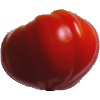

In [27]:
from PIL import Image

im = Image.open("fruits-360/Training/Tomato 3/193_100.jpg") # Can be many different formats.
im
# pix = np.array(im.getdata()).reshape(im.size[0], im.size[1], 3)
# pix

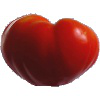

In [31]:
test_im = Image.open("fruits-360/Test/Tomato 3/23_100.jpg")
test_im

In [4]:
for files in os.scandir(path_to_train):
    print(files)

<DirEntry 'Tomato 4'>
<DirEntry 'Apple Red Delicious'>
<DirEntry 'Tomato 3'>
<DirEntry 'Huckleberry'>
<DirEntry 'Blueberry'>
<DirEntry 'Pear Red'>
<DirEntry 'Banana Lady Finger'>
<DirEntry 'Melon Piel de Sapo'>
<DirEntry 'Pear'>
<DirEntry 'Strawberry'>
<DirEntry 'Nut Forest'>
<DirEntry 'Avocado'>
<DirEntry 'Tomato 2'>
<DirEntry 'Pomegranate'>
<DirEntry 'Dates'>
<DirEntry 'Carambula'>
<DirEntry 'Apple Red'>
<DirEntry 'Potato Red Washed'>
<DirEntry '.DS_Store'>
<DirEntry 'Granadilla'>
<DirEntry 'Kohlrabi'>
<DirEntry 'Tamarillo'>
<DirEntry 'Pepper Red'>
<DirEntry 'Fig'>
<DirEntry 'Ginger Root'>
<DirEntry 'Kiwi'>
<DirEntry 'Cherry Wax Yellow'>
<DirEntry 'Lemon'>
<DirEntry 'Guava'>
<DirEntry 'Apple Golden 2'>
<DirEntry 'Pear Stone'>
<DirEntry 'Cauliflower'>
<DirEntry 'Mandarine'>
<DirEntry 'Quince'>
<DirEntry 'Strawberry Wedge'>
<DirEntry 'Pear Monster'>
<DirEntry 'Raspberry'>
<DirEntry 'Pitahaya Red'>
<DirEntry 'Nut Pecan'>
<DirEntry 'Apple Golden 3'>
<DirEntry 'Redcurrant'>
<DirEntry 'Pep

In [5]:
len("fruits-360/Training/")

20

In [7]:
fruit_images = []
labels = [] 
# for fruit_dir_path in glob.glob(path_to_train):
for fruit_dir_path in glob.glob("fruits-360/Training/*"):
    fruit_label = fruit_dir_path.split("/")[-1]
    print(fruit_label)
    for image_path in glob.glob(os.path.join(fruit_dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        
        image = cv2.resize(image, (45, 45))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        fruit_images.append(image)
        labels.append(fruit_label)
fruit_images = np.array(fruit_images)
labels = np.array(labels)

Tomato 4
Apple Red Delicious
Tomato 3
Huckleberry
Blueberry
Pear Red
Banana Lady Finger
Melon Piel de Sapo
Pear
Strawberry
Nut Forest
Avocado
Tomato 2
Pomegranate
Dates
Carambula
Apple Red
Potato Red Washed
Granadilla
Kohlrabi
Tamarillo
Pepper Red
Fig
Ginger Root
Kiwi
Cherry Wax Yellow
Lemon
Guava
Apple Golden 2
Pear Stone
Cauliflower
Mandarine
Quince
Strawberry Wedge
Pear Monster
Raspberry
Pitahaya Red
Nut Pecan
Apple Golden 3
Redcurrant
Pepper Yellow
Grape Pink
Apple Golden
Banana Red
Cucumber Ripe 2
Physalis
Cherry Rainier
Maracuja
Chestnut
Plum
Potato Sweet
Cherry
Cucumber Ripe
Hazelnut
Nectarine
Cherry Wax Black
Cantaloupe 2
Lychee
Pepper Orange
Clementine
Watermelon
Pear Kaiser
Cantaloupe
Mangostan
Cherry 2
Pineapple Mini
Rambutan
Grape White
Tomato Yellow
Apple Braeburn
Tomato Maroon
Onion White
Onion Red Peeled
Mango
Potato White
Apple Crimson Snow
Potato Red
Corn Husk
Cocos
Mulberry
Avocado ripe
Passion Fruit
Apple Granny Smith
Beetroot
Kumquats
Grape White 2
Apricot
Eggplant


In [ ]:
print(fruit_images)

In [8]:
label_to_id_dict = {v:i for i,v in enumerate(np.unique(labels))}
id_to_label_dict = {v: k for k, v in label_to_id_dict.items()}

In [9]:
label_ids = np.array([label_to_id_dict[x] for x in labels])
print(label_ids)
fruit_images.shape, label_ids.shape, labels.shape

[123 123 123 ...  82  82  82]


((67692, 45, 45, 3), (67692,), (67692,))

In [10]:
test_fruit_images = []
test_labels = [] 
for fruit_dir_path in glob.glob("fruits-360/Test/*"):
    fruit_label = fruit_dir_path.split("/")[-1]
    print(fruit_label)
    for image_path in glob.glob(os.path.join(fruit_dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        
        image = cv2.resize(image, (45, 45))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        test_fruit_images.append(image)
        test_labels.append(fruit_label)
test_fruit_images = np.array(test_fruit_images)
test_labels = np.array(test_labels)

Tomato 4
Apple Red Delicious
Tomato 3
Huckleberry
Blueberry
Pear Red
Banana Lady Finger
Melon Piel de Sapo
Pear
Strawberry
Nut Forest
Avocado
Tomato 2
Pomegranate
Dates
Carambula
Apple Red
Potato Red Washed
Granadilla
Kohlrabi
Tamarillo
Pepper Red
Fig
Ginger Root
Kiwi
Cherry Wax Yellow
Lemon
Guava
Apple Golden 2
Pear Stone
Cauliflower
Mandarine
Quince
Strawberry Wedge
Pear Monster
Raspberry
Pitahaya Red
Nut Pecan
Apple Golden 3
Redcurrant
Pepper Yellow
Grape Pink
Apple Golden
Banana Red
Cucumber Ripe 2
Physalis
Cherry Rainier
Maracuja
Chestnut
Plum
Potato Sweet
Cherry
Cucumber Ripe
Hazelnut
Nectarine
Cherry Wax Black
Cantaloupe 2
Lychee
Pepper Orange
Clementine
Watermelon
Pear Kaiser
Cantaloupe
Mangostan
Cherry 2
Pineapple Mini
Rambutan
Grape White
Tomato Yellow
Apple Braeburn
Tomato Maroon
Onion White
Onion Red Peeled
Mango
Potato White
Apple Crimson Snow
Potato Red
Corn Husk
Cocos
Mulberry
Avocado ripe
Passion Fruit
Apple Granny Smith
Beetroot
Kumquats
Grape White 2
Apricot
Eggplant


In [11]:
test_label_ids = np.array([label_to_id_dict[x] for x in test_labels])
test_fruit_images.shape, test_label_ids.shape


((22688, 45, 45, 3), (22688,))

In [12]:

fruit_images = fruit_images.reshape((67692, 6075))
test_fruit_images = test_fruit_images.reshape((22688, 6075))


In [13]:
fruit_images = fruit_images.astype(float)
test_fruit_images = test_fruit_images.astype(float)
fruit_images /= 255.0
test_fruit_images /= 255.0

In [14]:
from mynn.optimizers.adam import Adam
from mynn.initializers.he_normal import he_normal
from mynn.activations.relu import relu
from mynn.losses.cross_entropy import softmax_cross_entropy
from mynn.layers.dense import dense
from mynn.layers.dropout import dropout


# Define your MyNN-`Model` class here. It should have:
# - an `__init__` method that initializes all of your layers
# - a `__call__` method that defines the model's "forward pass"
# - a `parameters` property that returns a tuple of all of your
#   model's learnable parameters (refer to the Tendrils-MyNN)
#   notebook for the syntax of defining a class-property)


class Model:
    def __init__(self, n1, n2, num_classes):
        """
        Initializes a model with two hidden layers of size `n1` and `n2`
        respectively.
        
        Parameters
        ----------
        n1 : int
            The number of neurons in the first hidden layer

        n2 : int
            The number of neurons in the second hidden layer
        
        num_classes : int
            The number of classes predicted by the model"""
        # STUDENT CODE HERE
        self.dense1 = dense(6075, n1, weight_initializer = he_normal)
        self.dropout2 = dropout(prob_dropout=0.1)
        self.dense3 = dense(n1, n2, weight_initializer = he_normal)
        self.dropout4 = dropout(prob_dropout=0.1)
        self.dense5 = dense(n2, num_classes, weight_initializer = he_normal)
        
    def __call__(self, x):
        '''Passes data as input to our model, performing a "forward-pass".
        
        This allows us to conveniently initialize a model `m` and then send data through it
        to be classified by calling `m(x)`.
        
        Parameters
        ----------
        x : Union[numpy.ndarray, mygrad.Tensor], shape=(M, 2)
            A batch of data consisting of M pieces of data,
            each with a dimentionality of 2.
            
        Returns
        -------
        mygrad.Tensor, shape=(M, num_out)
            The model's prediction for each of the M pieces of data.
        '''
        
        # We pass our data through a dense layer, use the activation 
        # function relu and then pass it through our second dense layer,
        # then use the activation function relu and then pass it through
        # our third dense layer.
        # We don't have a second activation function because it happens
        # to be included in our loss function: softmax-crossentropy
#         return self.dense5(self.dropout4(relu(self.dense3(self.dropout2(relu(self.dense1(x)))))))
        return self.dense5(relu(self.dense3(relu(self.dense1(x)))))
        
    @property
    def parameters(self):
        """ A convenience function for getting all the parameters of our model.
        
        This can be accessed as an attribute, via `model.parameters` 
        
        Returns
        -------
        Tuple[Tensor, ...]
            A tuple containing all of the learnable parameters for our model"""
        return self.dense1.parameters + self.dropout2.parameters + self.dense3.parameters + self.dropout4.parameters + self.dense5.parameters

In [15]:
label_ids = label_ids.astype(int)
test_label_ids = test_label_ids.astype(int)

In [69]:
# STUDENT CODE HERE
# learning_rate = 0.001
weight_decay = 5e-4
n1 = 512
n2 = 256
# n3 = 128
model = Model(n1, n2, 132)
optim = Adam(model.parameters)

<IPython.core.display.Javascript object>


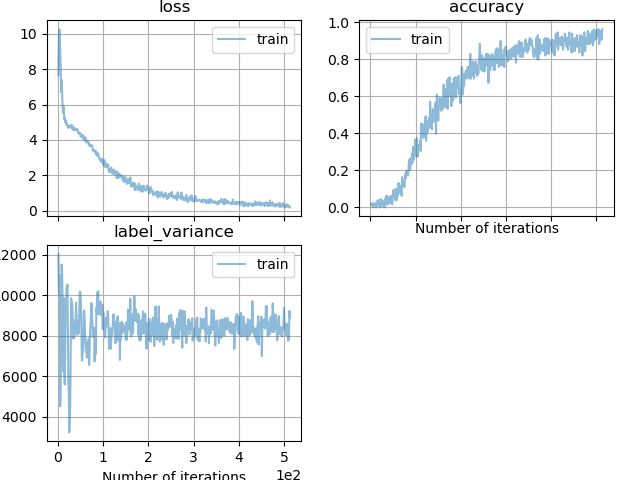

In [70]:
# Create a noggin plot, that keeps track of the metrics: "loss" and "accuracy"
# STUDENT CODE HERE
from noggin import create_plot
plotter, fig, ax = create_plot(metrics=["loss", "accuracy", "label_variance"], ncols = 2)



In [73]:
# Set `batch_size = 100`: the number of predictions that we will make in each training step

# STUDENT CODE HERE
batch_size = 128
# We will train for 10 epochs; you can change this if you'd like.
# You will likely want to train for much longer than this
for epoch_cnt in range(1000):
    
    # Create the indices to index into each image of your training data
    # e.g. `array([0, 1, ..., 9999])`, and then shuffle those indices.
    # We will use this to draw random batches of data
    # STUDENT CODE HERE
    indices = np.arange(0, len(fruit_images))
    np.random.shuffle(indices) 
    for batch_cnt in range(0, len(fruit_images) // batch_size):
        # Index into `x_train` to get your batch of M images.
        # Make sure that this is a randomly-sampled batch
        # STUDENT CODE HERE
        
        batch = fruit_images[indices[batch_cnt * batch_size : (batch_cnt + 1) * batch_size]]
        
        # compute the predictions for this batch by calling on model
        # STUDENT CODE HERE
        
        prediction = model(batch)

        # compute the true (a.k.a desired) values for this batch: 
        # STUDENT CODE HERE
        
        truth = label_ids[indices[batch_cnt * batch_size : (batch_cnt + 1) * batch_size]]
        
#         print("prediction")
#         print(np.argmax(prediction, axis=1))
#         print("truth")
#         print(truth)

        # compute the loss associated with our predictions(use softmax_cross_entropy)
        # STUDENT CODE HERE
        
        loss = softmax_cross_entropy(prediction, truth)
#         print("loss")
#         print(loss)
        
        # compute the accuracy between the prediction and the truth 
        # STUDENT CODE HERE
        
        if isinstance(prediction, mg.Tensor):
            prediction = prediction.data
            
        predicted_class = np.argmax(prediction, axis=1)
        
        
        acc = np.mean(predicted_class == truth)

        # back-propagate through your computational graph through your loss
        # STUDENT CODE HERE
        
        loss.backward()
        
        # execute gradient-descent by calling step() of optim
        # STUDENT CODE HERE
        
        optim.step()
        
        # null your gradients
        # STUDENT CODE HERE
        
        loss.null_gradients()

        plotter.set_train_batch({"loss" : loss.item(),
                                 "accuracy" : acc, 
                                 "label_variance" : predicted_class.sum()},
                                 batch_size=batch_size)
    
    # After each epoch we will evaluate how well our model is performing
    # on data from cifar10 *that it has never "seen" before*. This is our
    # "test" data. The measured accuracy of our model here is our best 
    # estimate for how our model will perform in the real world 
    # (on 32x32 RGB images of things in this class)
    test_idxs = np.arange(len(test_fruit_images))
    
    for batch_cnt in range(0, len(test_fruit_images)//batch_size):
        batch_indices = test_idxs[batch_cnt*batch_size : (batch_cnt + 1)*batch_size]
        
        batch = test_fruit_images[batch_indices]
        truth = test_label_ids[batch_indices]
        
        # Get your model's predictions for this test-batch
        # and measure the test-accuracy for this test-batch
        # STUDENT CODE HERE
        
        prediction = model(batch)
        if isinstance(prediction, mg.Tensor):
            prediction = prediction.data
        acc = np.mean(np.argmax(prediction, axis=1) == truth)
        
        # pass your test-accuracy here; we used the name `test_accuracy`
        plotter.set_test_batch({"accuracy" : acc}, batch_size=batch_size)
    plotter.set_train_epoch()
    plotter.set_test_epoch()

KeyboardInterrupt: 

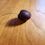

In [74]:
newimg = Image.open("test_cherry.jpg")
newimg

Corn


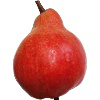

In [75]:
image_path = "test_cherry.jpg"
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

image = cv2.resize(image, (45, 45))
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

test_cherry_image = image
test_cherry_image = np.array(test_cherry_image)
test_cherry_image = test_cherry_image.reshape(1,6075)
prediction = model(test_cherry_image)
print(id_to_label_dict[np.argmax(prediction)])
im = Image.open("fruits-360/Training/Pear Red/0_100.jpg")
im

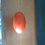

In [76]:
newimg = Image.open("test_tomato.jpg")
newimg

Cantaloupe 2


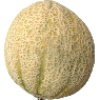

In [86]:
image_path = "test_tomato.jpg"
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

image = cv2.resize(image, (45, 45))
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

test_tomato_image = image
test_tomato_image = np.array(test_tomato_image)
test_tomato_image = test_tomato_image.reshape(1,6075)
prediction = model(test_tomato_image)
print(id_to_label_dict[np.argmax(prediction)])
im = Image.open("fruits-360/Training/Cantaloupe 2/1_100.jpg")
im

In [98]:
image_path = "test_tomato.jpg"
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

image = cv2.resize(image, (45, 45))
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

test_tomato_image = image
test_tomato_image = np.array(test_tomato_image)
test_tomato_image.shape

(45, 45, 3)

In [78]:
from mynn.optimizers.adam import Adam
from mynn.initializers.he_normal import he_normal
from mynn.activations.relu import relu
from mynn.losses.cross_entropy import softmax_cross_entropy
from mynn.layers.dense import dense
from mynn.layers.dropout import dropout


# Define your MyNN-`Model` class here. It should have:
# - an `__init__` method that initializes all of your layers
# - a `__call__` method that defines the model's "forward pass"
# - a `parameters` property that returns a tuple of all of your
#   model's learnable parameters (refer to the Tendrils-MyNN)
#   notebook for the syntax of defining a class-property)


class TrivialModel:
    def __init__(self, num_classes):
        """
        Initializes a model with two hidden layers of size `n1` and `n2`
        respectively.
        
        Parameters
        ----------
        n1 : int
            The number of neurons in the first hidden layer

        n2 : int
            The number of neurons in the second hidden layer
        
        num_classes : int
            The number of classes predicted by the model"""
        # STUDENT CODE HERE
        self.dense = dense(6075, num_classes, weight_initializer = he_normal)
        
    def __call__(self, x):
        '''Passes data as input to our model, performing a "forward-pass".
        
        This allows us to conveniently initialize a model `m` and then send data through it
        to be classified by calling `m(x)`.
        
        Parameters
        ----------
        x : Union[numpy.ndarray, mygrad.Tensor], shape=(M, 2)
            A batch of data consisting of M pieces of data,
            each with a dimentionality of 2.
            
        Returns
        -------
        mygrad.Tensor, shape=(M, num_out)
            The model's prediction for each of the M pieces of data.
        '''
        
        # We pass our data through a dense layer, use the activation 
        # function relu and then pass it through our second dense layer,
        # then use the activation function relu and then pass it through
        # our third dense layer.
        # We don't have a second activation function because it happens
        # to be included in our loss function: softmax-crossentropy
#         return self.dense5(self.dropout4(relu(self.dense3(self.dropout2(relu(self.dense1(x)))))))
        return self.dense(x)
        
    @property
    def parameters(self):
        """ A convenience function for getting all the parameters of our model.
        
        This can be accessed as an attribute, via `model.parameters` 
        
        Returns
        -------
        Tuple[Tensor, ...]
            A tuple containing all of the learnable parameters for our model"""
        return self.dense.parameters

In [87]:
# STUDENT CODE HERE
# learning_rate = 0.001
weight_decay = 5e-4
# n3 = 128
trivialmodel = TrivialModel(132)
optim = Adam(trivialmodel.parameters)

<IPython.core.display.Javascript object>


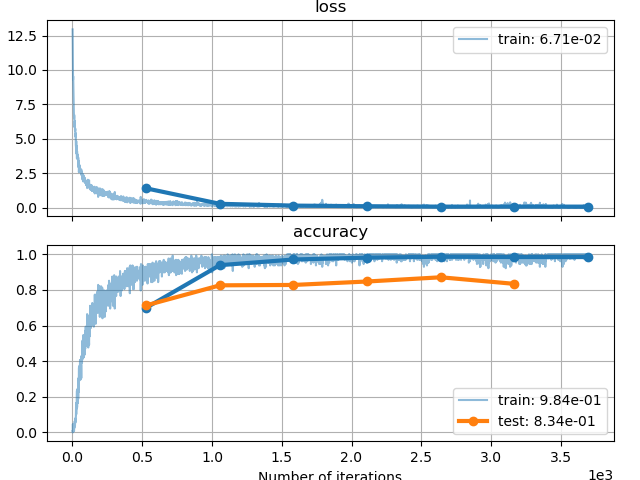

In [88]:
# Create a noggin plot, that keeps track of the metrics: "loss" and "accuracy"
# STUDENT CODE HERE
from noggin import create_plot
plotter, fig, ax = create_plot(metrics=["loss", "accuracy"])

In [89]:
# Set `batch_size = 100`: the number of predictions that we will make in each training step

# STUDENT CODE HERE
batch_size = 128
# We will train for 10 epochs; you can change this if you'd like.
# You will likely want to train for much longer than this
for epoch_cnt in range(100):
    
    # Create the indices to index into each image of your training data
    # e.g. `array([0, 1, ..., 9999])`, and then shuffle those indices.
    # We will use this to draw random batches of data
    # STUDENT CODE HERE
    indices = np.arange(0, len(fruit_images))
    np.random.shuffle(indices) 
    for batch_cnt in range(0, len(fruit_images) // batch_size):
        # Index into `x_train` to get your batch of M images.
        # Make sure that this is a randomly-sampled batch
        # STUDENT CODE HERE
        
        batch = fruit_images[indices[batch_cnt * batch_size : (batch_cnt + 1) * batch_size]]
        
        # compute the predictions for this batch by calling on model
        # STUDENT CODE HERE
        
        prediction = trivialmodel(batch)

        # compute the true (a.k.a desired) values for this batch: 
        # STUDENT CODE HERE
        
        truth = label_ids[indices[batch_cnt * batch_size : (batch_cnt + 1) * batch_size]]
        
#         print("prediction")
#         print(np.argmax(prediction, axis=1))
#         print("truth")
#         print(truth)

        # compute the loss associated with our predictions(use softmax_cross_entropy)
        # STUDENT CODE HERE
        
        loss = softmax_cross_entropy(prediction, truth)
#         print("loss")
#         print(loss)
        
        # compute the accuracy between the prediction and the truth 
        # STUDENT CODE HERE
        
        if isinstance(prediction, mg.Tensor):
            prediction = prediction.data
            
        predicted_class = np.argmax(prediction, axis=1)
        print(predicted_class)
        
        acc = np.mean(predicted_class == truth)

        # back-propagate through your computational graph through your loss
        # STUDENT CODE HERE
        
        loss.backward()
        
        # execute gradient-descent by calling step() of optim
        # STUDENT CODE HERE
        
        optim.step()
        
        # null your gradients
        # STUDENT CODE HERE
        
        loss.null_gradients()

        plotter.set_train_batch({"loss" : loss.item(),
                                 "accuracy" : acc}, batch_size=batch_size)
    
    # After each epoch we will evaluate how well our model is performing
    # on data from cifar10 *that it has never "seen" before*. This is our
    # "test" data. The measured accuracy of our model here is our best 
    # estimate for how our model will perform in the real world 
    # (on 32x32 RGB images of things in this class)
    test_idxs = np.arange(len(test_fruit_images))
    
    for batch_cnt in range(0, len(test_fruit_images)//batch_size):
        batch_indices = test_idxs[batch_cnt*batch_size : (batch_cnt + 1)*batch_size]
        
        batch = test_fruit_images[batch_indices]
        truth = test_label_ids[batch_indices]
        
        # Get your model's predictions for this test-batch
        # and measure the test-accuracy for this test-batch
        # STUDENT CODE HERE
        
        prediction = trivialmodel(batch)
        if isinstance(prediction, mg.Tensor):
            prediction = prediction.data
        acc = np.mean(np.argmax(prediction, axis=1) == truth)
        # pass your test-accuracy here; we used the name `test_accuracy`
        plotter.set_test_batch({"accuracy" : acc}, batch_size=batch_size)
    plotter.set_train_epoch()
    plotter.set_test_epoch()

[  0   0   0   3  58   0   0   0   0   0   0  58   0   3   0   0   0   0
  58   0   0  58   3  28   3 124 124   0   0   0   0   0  58   0   0   0
   0   0   0   0  58   0  21   0   0   0   3   0   0   3   0   0   0   0
   3   3  97   0   3   0   0   0   0   0   0   0  97   0   0   0  58  58
   0   0   3   0  58   0  58   0   0  58   0  58   3  58   0   3   0   0
   0   0   0   0   0   0   0  97   0   0   0   0   0   0   3   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0  58   0   0   3 124   0
   0  58]
[ 84 128  82   0  82 105 105  82   0 128  82 105  84 128   0  87   0   6
  91   0  91  29 105   6 105  84 117 105   6  91   6 128 128  82  95  82
 128 128 128   6  76  29 128 128 105 105 105 128  82 105  82  91 105  84
 105  76 105   6 105 128  82  91 128  82  91 105   6  29 117  84   0 128
  76 105   0  76   0  82 128   0   6 128 105 105   0  91  91  91 128  29
  82  51  29  82  87   6  29  76 128   6  91 105  91   6  91 128 105   0
  76 128  84 128  29 128  29  82   6   0 

[ 78  41  78  41  69  42 108  69  17  96  49  48  21  28  28  70   8  82
  59  49  41   8  28  28  28  42  17  17  82 101  17  48  42  95  78  28
  34  69  39  17  78   9  82   9 101  78 101  22   8  34  17  82  78  17
  78  78  78  41  17  28 111  34 101 101 108   8  78  49  50   7  28  28
 111  41  34 108  82  69  30  81  28   8  90 112  17 101  28  34  78  78
   7   8  60  82  90   2  17  28   9 101   7  17  17  96  49  96  17  17
  90  78  17  45  96  17  70  30  28  41  17  34  49  17  17  28  90  17
  70   8]
[ 34  81  90  59  60  81  34  65 101  41  81  81  26 101   9  83 101  82
  59  81  82  82  82 111  78  81   9  82  81  59  81  60  81  59  78  95
  59  49 101  50   4  17  70  78  34  96  34  49  82  59 113  60  69  70
  59  41  48   9  94  81 108 117  90  78  82  59  34  78  59  59 101  90
  34  78  95 101  41  81  78  78  81  72 117  81  78  82  81 108  21  78
  49  82  82  81  82  82  82  78  28  28  78  34  82  41  82  82  48  30
  82 111 101  96  82  78   9  78  59  49 

[ 36  71 103 120  12  54  12 126 112 123 122 109  24  12  21  96  40 105
  36 118  50  36  20 126  96  68 119 117  96  21  71  12   4  50  60  30
 122  19  89   2  68 120  36  75  72  14  81  36  75  36  20 105  19  12
 129  36  36  12  36  30  10   1 109   2   4  28 126  86  89   4 105 120
   4  12  50 109 117 120 105  75  82  93   4  64 120  49  36 105  49 105
  36  36 119  36 109 129 105  36   1   2  89  52 117   2  99  95 109  30
   9 112  36  70 117 103  12   2 123  36  36  36  54 129  26  21  98 129
  75  12]
[ 45  13  25   4 105  50  50   2  92  62  50  71 102 105  50  79  48  88
 123  89  36   4  71 117  76  19  71   4 105  95  89 126 107  89  93  62
  50 126  60  81   4  36  71  15  50  82  28  36  71  72 105  89  71   2
 122  89  88 123  36  36  19  19 126   9  30  48 105  72 123  20   9  25
  36  13 105  36  98  62 107 117  25  15 129 112 117   2  88 117  89  93
  50 129 122  54  75 120  90 110  36 117  76  12 117 112 129 104  20  53
 115  72  20 120  36  70 117  50 129  50 

[  4 104 111  23  81  59  71  79 115  26 102 112  94  50 112  70  30  70
  26  27  70 100  54  29  90 125  60  79  94  81  55  71  83  62  83 115
  70  26 115  88  34  96  70  95  94 123  23 104  59  71  71  71  44 123
  71  70 113 122  13  36  36  44  69  13 115  62  69  88  13  40 110 117
  52  71  82  36  95  71  70  78  26  81  13 115  72  72  13  59  29  95
  44  26   4  59  72  26  83  83 116  23  18  78  59  58  70  79  23  50
  97  64  78  36  83  82  44  54 129  31 122  29  62  79  82  45   4  78
 103  26]
[ 97  54  79 115 107  48  41  27  54  36  79  71 127  29  81 120  27 130
  95  55  25  83  70  48  34   4  70  51  16 107  44 104  69  36  83   4
 121  83 115  81 107  36  62  83   4  89  21  59 107  15 123  62  10  33
 121  15  26  71  71  59 116 130  15  51   1 123  26  52  54  20  83  88
  90 113   4  28  50  78  36 115  58  52  18 100  83  44 115   4 103 107
  16  25  98 123 112  37  59  26 123  92  81 115  62  89  26  26  27 109
  71  62  36  83 117  83  71  60 118   4 

[ 27  23  31  68  13 121  76   2  65  27  82 101  83  40  60  23  59  90
  49 130  78  27  24 120  65 114  34  75  98 117  90 105 129  40  17 114
  93 125 116 104  13  43  90 105  20  83  93  23   5  60  73  41  69  68
  60  81  26  76  65  98  52  44  90  60   8  90  99  78  65  25  49 121
  60  85  21  60   4  68  60  60 120   9  99 106  68  55  98  55  68 101
  90  59  68 123  80  98  94  13 110 123   7 106  95  68  16 123  90 106
 125 123  54  72  33  81  49  68  27 101 129  54  68   2 101  59  98 130
 119 106]
[  6  23  29  57 116 120  23  55  99 117  97  85  29  81  30   9  27  94
 100  17  30  22  81  12 117  58  90  15  18  85  52  86  27  95  44  69
  38  71   2  48  41 120  13  90  34  49  81  49 104 126  96  68  23  75
  29 100  60  90  44  13 117  60  90 126   2  85  95  23  72  33 126  31
  16  19  23  80  33  60   2   9  20  94  80  17  20 130  60  68  19  28
 100  27  68  80 100   4 119  71  57  60   9  90  90 105 114 119  68  15
   7  99  85  80  68  71  76 103 104  22 

[ 71 130  65  34  86  74 107 107  34 130  57  77   2  33   4   5  87  46
 130 111 123  33  93  15  81 130  44  74  21  45  22  69   0 126 120 118
  83 111  93  91  95   4  58 108  45  72 120  58   0  11  74 111 130  28
 128  42 130  74  41  44  49  46  27   9  27 103 117 118  93 113  33  30
  45  65 117 117  40  40  40  12  33  27  99  45 130  94  72  68  74  11
   0  91  90  45  92  74  74  93  39  33 117  39  94 117  18  91 107  74
   0 126  94 100  49  81 130  81 127  14 130 121 107 123   9  55  99  77
  91  76]
[130  78  26  49  40  92  49  74 123 127  92  20  93  54  54 111  92  93
   2  29  91  45  45 121 103  93  51  21  76 117  11  44  90  22  18  25
  93 130  90   0 127  92  78  78  72   0  22  91 126 111  42   0  65  40
 127  91  92 130  19 114  18  57  12  30 107  11  45  45  11  26  27  45
  48  26  11 117  33   0 113  30 117 130  81  57  40  35 123   9 118  70
 130 130 117  85  19   0  83 110 106 126  46  25  26  91 111  12  69  15
 110  65  45  26 111 129  92 123  15  33 

[103  51  52  45  76  46 123 101  34  69  58  26  64   8  22  75 125  16
  40  64  70  36 116 116 115  94  16  16 129  64  29  29   6 127 129 111
  36 106 105  32 124 130   3 120  14 116  96  64   8  54  34   3  15  51
  81  30 107   3 115  91  33 116  52  34  72  32  11  61 126 127 125 113
  55 118  64   4 122 116  74 120 101  75 115  22  83 107 107  73 127 127
 125 107  90  25 129  49  20  94 127  71  96  96  15  88  64  74 122  61
  88  51  54 115  76  27   3  77  44 104   4 118   4  29 129 108   6 100
 120 113]
[122  37 109 110  67  78 125  67  57 102  43  55 105 118   6  67   8  76
  31 116  63 114  88 116  13   7  57  64  14  56  10 125  62  34  96  30
 115  61  27 116  18  76  67  36  57 100   5  54  95  29  16  31  68  72
  33 115  36  33 127 127 100  53  73   8 103  71  49  33  16 110  61 107
 103  27  26  88  88  30   6  98  32  11  64  61 103  96 107  49  15 122
  26 125 109  46   2   3  90  61  77  31  23  63  39  38 110  54  27  61
 126 110  25  39  95  61 125 120 122  32 

[ 53  83  99 100 101  74 102 116   2 126  21  95   2   2 111 129 116 123
 111 116  96   2 124  98  68  95  68 101 130 108  70  83  95  13 130  35
  79  46  95  36  95  36  26  41  38 106 100  21 100 117  48  18  21 100
  52 130  23 100  93  47 120 100  23 117  38  98 100  16  54  50  38  40
 100  26 122 102 100  47  72  25  70  44  66   5 127  67  19  26  53  58
 124 120   9  21  95  10  95 120  27  35  35 130   2  68  34  98  94  16
 112  22  53  21  70 114 130 127  47  13  39  25  98  21 118  10 120 100
 100 100]
[ 69   3 101  20  13  41  62  26  44 130  67 117  41  66  68  54 129  77
 107  94 118  60 123   6  54  30 127  21   2  96  51 117 127  95   2  44
  50  35  12  67  96  12  96  12  20  96  58 120  58  14  34 123  23  89
  95  19 125  67  18  89 113  98  12 109  58  69  79  71  70 106 117  69
 127  30  81  41  51  95  79  96  16 109  44 117 130  62   2  47  11   2
   8  38  20  68  95 117   3 128 100  21  54  34   2   5  81  72 113  17
  50   8 107 117  96  47 117  98  84  45 

[ 68  30 103  86  59  12  88 101 120  45  22  18 114  91  36  70  68  96
  88 107  47  12   3   8  88  96 124  40  41  70  89  35 108  87  72  81
  16  84  35  68  67   0  55  28  58  47  26  71  95   8  59 126  74  12
  19  70   8  12   1  97  12  81  51  84 120  14  72  54  43 122  84  28
  64 128  58  28  31  33  25 105  11  44  94  30  59  45  84  28  65  44
  39  16  95  26  25 103 114  35  68  44   7  50  40  46 100  44  39  31
  76  23  89 117  87  44  76  93  81  70 116  70 105  12  60 100  84  71
  92  65]
[  8  58  64  20  33  16  68  44  47   5 125  72  69 123  48  84 100  44
 106  70  70  29  64  88  68  25  25  48 124 121  35  98 126 104  95  68
 100  15  98  33  86   8  86  28  35  89  98  28  21  98  84  52 128  28
  62  76  35 128 115  68 129 109  33 128  70  84 113  23  70 120  68  70
  89 123 120  41 125  28  86  96  10  40  84  10  70  54  55 102 112  95
  86 101  28  68  45  78 126  28 102   8  19  48 113  78   3  99 111 115
 104  39  49  35  65  68  81  68 101 111 

[ 44  86  92 112 114  83  86  93 128  88 112 123  27  54  80  25  52 104
 118  68   7  30  64  78 123  96 112 122 111  19   7  85  52  31 116 123
  59  45  85 109  16  62  63  20   6 101  25  19 112   7 112  73  20  26
  27  61  89  72  90 103  64  85  27  64  18  29  90  83  41  11  86  26
   9  85   4  73  99 114  99  75  82 109  99  97  25  62  88  39 129  77
 122  81  59  94 117  77  95  30  18  14  92  75  11  50 128  40  90  52
  50  73  72 113  53  89  16  27  50   6 124   7  19   9 129  59  61   5
  36  48]
[ 77  51  34  53 124 111  83  61  90  27 122  33  26 110  53  67  26  52
 117  92  93 105  48  86  12  61 128  44 120  85  94  33  64  36 119  40
  72  61  58  22 112  58  13  81  79  68  42  48   4  90 128 120 112  66
  19  90 122  58  59  25  44  64  61  98 118  50  18 128  22 102  94  59
  40   7  72  93 111 112  40  68 113  90 104  65  81  29  44   4  68  11
 122  92  95  94  38  28  93  95  55  50  90  39  53 124  99  48  65  53
 112  27  48  85  61  86  86 117   7  66 

[127  60   4  98  85  51  60  67   6  18  96  79  55 122  44  44  97 101
  44 130 122 127 107 101 122 127  30  41  59  18  32  18  70  25   7   7
  44 114  28  64  70  78 117  71  75  58  41  69 113  98 127  91 129 127
  78  25  34  28  49  58  22 122 112   7 116 104  91 118  79  88  40  28
  30  12  28  21  75   7   1  28  75  92  71   4  57  44  46   6  44  86
  94  75  77  25  47 100  18  25 121  44  99 118  61  49  38 118  22 129
  56  81 122  69  40  38 129  80  57 101  11  75 119 126  47  43  44  92
 129   7]
[ 85  67 107  32  98  96  69  36 125  33  89 123 104 124  99  97  21  75
  86   5  22 119 127  25 121  49  45   7 129   7  80 112  80  31  80  77
  18  95  38  45  92  25 100 100   4  92  47  47  75  50  49  18  21 114
 120  69  70  19  70  19 104  10  75 109  50 118  36  33 128 119  80  64
  73  98  32  11  92  48  90 122  47 107  75  75  92 112  15   4  86  16
  35 117   6  22   7  85  75  44  73  77  48 117   5 125   9  38  66  87
   1  69 125 100  29 111  47  44  18 120 

[ 18  32   2  63 107  80   6  86   1   4  92  57  96 129  50 107  11 129
  20   6  20   7  98  31 107 129  93  71 107  51  26  60  59  52 129  59
 107 129  59 107  51  36  70 114  33 121 119 104 129 121 115 129  35 127
 117 129  36 107  61   4  10  12  86   7  46  68  48  86  50  60 122  69
 129  80  98  89   4   7  46  23  13 124  23  18   0  59 129  89 103  57
  36   4  73 123  66  81  75 107  55  99 119  21   4  64   6 100  15  60
  36  96  44  45  84  68 129  44 104  97  72 124  41  15  73  36 107 124
  21 106]
[ 52  41 126  60   6  93  81  48 130  31  68  51 112 100  79  77 107  51
 103  44  43   7  44 125  96  15  25  75  46  44 121  40  12 101  68  59
  49 115   7 102  27 117  40  80  83  99  60  14  89 125  84 115 102 123
  84 125  11  55  57 120   0   2  88  40  71 118  11  15  68  98 100  30
 113  30  57  11 117  68 112   5  92  13 107 116   7 100  73  53  98  59
  96   4  77  19  20   0  31 106  57  41 121 112 130  68 127 129  73 118
  46  32  10  59 102   6 101  50   4  99 

[ 35  46  14  10  10  97  22  27  19  27  43   8  56  56  68   6  94  55
  30  60   6 116   8  27 124  63  60  67 129  93 101  48 112  38  90  11
  30  20  93 129   7   4   8   8  85  56  46  27 111  78  59  72  35  44
  35  38  24  35  73 123  19  66  13  91 103 113   3  61  56  45 128 116
 110  18  53  72 120  56 115  90  46  57 112  13  89  50  19  38  44   8
  22   6  84  26  25  84  44 103   4  94 104  68  56 108  76  32  61  56
  46  68  27 115  14  84   4 123 121  69  48  50 104 124  24  76  38 124
  35  86]
[ 89  94  23 102  54 103  17  63 120  64  87  43  76  89   9   1  91  43
  33  49  49 105  56  74  26 104  67  78   1 106  70  39  63  17  99  76
 118 118 129  93  53  59  46  68  96 102  26 118  82  80  34 123 105   1
 106 126 124  90  13  96  18  16 120  48  94 105 103  18  56  54  46 103
  14  81  19  52  94   8  13 112  23  55   9  81  84  68  43 103  87 102
  33  54  93 125  78 105   1  46 104  65   7  13  74  25  78 123  39 112
  26  26   1  65  91  31  34   9  45  68 

[ 72   8  43  60  62 120  37  91  41  45  49 116   5 105  95  22 114  97
  96  69  73 108 124  48  74  14 125  40  33  78  81  57 126 101   5  45
  70 124  36 101   8 112  98   5  19  71 122   4  32  50  49  79  92  29
  34  45 114  68  45  76   8  88 101 113  79  82  27 125   8  30  44  74
  93  34  91  44 110  84 120   7   8  22 114   8 118 127  53  79  92  35
 101  61  48  29  84  85 119  76  95  48  35  91  12  54  79   9  18  90
  82 124 112  31  96  77  69 102 121 118  69 119  12  96  85  33  90  86
 105  22]
[ 35  34  40 123   2  86 129  44  12 112 115  72 115  72 120  37 130  69
  33 112  91 114 119 126  82   8  41  91 114  75  32  42  10  50  86 104
  82  84  44   2  81  73  84  41  67 105  78 121 110 118  41  57 100 122
  60  35 112  82  79  89  84  91  34  34  55  90  89  79  98  29 101  22
  92  54 126  74  55  54  45  90  10 104  26  71 125  40  91 111   7  67
  17  67  18  31  62  75  67  41  61  81  30  84   9  84  84   3  45  74
  50 104  84  76  15 115 114  57  91  87 

[ 41 100  89  15  34 103  59  44   6 125   5  58 114  81   8 130  37  33
  44  27  43 116  71  75  10 112 123  25  25  46   9   2  49 125  10  54
 101  33 108  72  79 111  94  32  41 120  57  58  77 119  12  29  25  73
  38  18  15 123  98 104  34  26  35  31   5 112 117 104  22 127 129  96
 110 115  14  33  93  36  34  68  12  77 127   2 121   2  75  38  34 115
  43  41   8  52  94 123  68 124  94  21  75   1   9  36  87 105   1  86
 120  90   5  30  11  61 112   2 112   2  55 129  44  11  19  59   1 115
  36   5]
[ 14 115  59  19  54  68  23  91  47  58 130  98  96  41  18  11   2 128
  66  25   7  55  44  72   2  57  10  44  32  57  36  95 127  29 115 116
  11  81  87  49 108  64 113  27  20  93  39 129  45  86  46  33  49  73
 104   2 125  61 125  69  46  41  89  59  91 101 129  84  29  87  41 108
   7 116   2  32  96 124  95  90   2  18  41 122  58  15  44 102  58   7
  64   0 101 128 127  10  39  84  14  96 108 124  84  46  83  51 122  72
   7  46   2  54  72  89   7 104 114  89 

[ 99  72  96  70   8  77  34 120  80 129  52  74  38   2 120  89   2  46
  57 125  45 103  40 101  55 105 119 100 120  44 126  39  63 120  43  48
 115  91  31  87  72 104  98   2  21  34  30  46  47  29  89   5 114  24
   2 122  47 120  93  15   7   0  70  51  27  83 107  63  81 129  85  84
  81  69  27  98  25  31  99   8 107   9  89  83  36 126  56  68 129  11
  69  15 113   0  26  18  37  25  41 120 114  44 122 122 124  59 105  24
  98  41  61  59  66 119  41 101   2  13  70  72  50  39  34  18  83   0
  72  25]
[ 26  90  51 125  55   2 122  40 103  18  52  94  61 127 106 127  86  24
  50  98  50  20   2  35 107  57   7  82  33  34  45 109  44   5  16  90
 127  55   0  22  59 121  13  60  44  86  22 115 129  59  60  26  91  66
 115  54 109  33 101  44 109 103  31  26  57 115 107 107  23 127  81 122
  15  95 103  86  20   2 107   2  32 109 101   2 127  66  52  70  15  84
  51  61  37  10  23  63  58  12  19   6 109  98  53   2 102  74 107  72
  86  52  37  53  35  60   4 114  15 109 

[ 65 104  67  76  24 111  84  47 126  36 106 108  28  12  84  78  68  28
  20  17  18  84   9 130 122 125  14  94  55   2  46  32 111  10  36  76
  67  87  23 123  47 129  46  94  19   4   0  43  19  48  48  48  94  59
  59  44  20  74  76  41  94 129  44 129 127  23 118  66  76  75  84 106
  98 113 124  86 100  94  83  95 123  83  88  72  44  45 129  59  23  49
 129  50  83  73 129  81  31 121  44  48  10  61  47  12  17  52 122   8
  47 111  65 121  67  18  23 125  41 119  46  10 114  32  54  81 128  49
  98  81]
[ 28  74  44  77  97  42  51  42 127  60  93  25  93 108  17  57 113  94
  24  99  17 117 125 117  67  81 128   6  54   5  64  26  50  18  15  83
 125  84  29  41  28  15  30  99  71 124  26  28  26  56 114 103  57  46
  85  68  32  11  14  64 117  80  10  15  24 116  75  60  30  51 124  95
  89  21  14  43  64  81   7  57  46  29  17 130  47  51  85 117 117  28
  49 117 104  55 129  95  30 121  72  34  40 117  28 117  81  25 129   7
  77  77  84  52  13  24 127 125 102 117 

[  5  79  43  64  94 117  86  67  80  63  96 125  73  50 118  21  94  71
  70  84  94  70  29 126  64  86  60  81  22  68  72 104  44   7  52  21
  97  83 117   4  31  12   3  56 120  92  71  81  72  15 119 120  22  27
  95  35 100  27  63  75 125  55 129  18  63 117   7 113  34  84  20 112
  53  50  58 117  80 104 127 106  97  56 120  51   9  97  19  99   9  40
  15  67  92  19  94  94  72 119 120  26  41  57 105  92  34 122  36   9
  70  71 115   9 114  73  72 104  15 125 130 129 127 102  71   3 108  57
 121  31]
[ 27  81 110  56  13   9 121  92   3  22  93  69  50  57  40  62   0   5
  98  47  14 130 104  12 117 129  25  12  36 110   1 120  62  72  73  65
 102  72  69  89  44 124 116 117 107  28 127 108  79  90 111   9  60   3
  10  88  40  52  96 109  94  80   0  57  63  93 107 100  84  44  26  81
  94  19  81  40 128  25   5  86  83 130  70  81 125  35  50  62  61  36
  41  92 118  71  94  43  90  13  83  47 117  27 100 130  51 109   4  51
  54  22  67  40  59  96  34 103 100 100 

[ 76  22  31  29  17  85  72  74  14 117  39 117 117 129  72  61  43  28
  44  79  88  68 122 104  95   8  38  65  86 100  34  87  73  26  67  17
   5  26 106 101  77  12 130   9  38 105 128 129 112  95  68   4  97  84
  60  22  90  27 111  65  56   1  20  86  57  23  88  21  26  24 105  63
  88  66 102 123 122 125 116  63  97  66  44  80  22  83  61 104  93 112
  28  68  92  93 120  87  14  59 129  14  70  59  21  92  60 103 114  38
 120  41 127 111 122  56 129 129  73  61 119 130  96  94  98  23  90  30
  41  98]
[ 28 122 122   5 111  98  12  14 129  81 114  50  56 112  41 127  40 123
  96  44  68  48  99  47 125  52   1  18  43 103   7 105  53 120 112  84
 127  67  95  22  10 121  11  20  81  26  68 129   4 102  79 107  31 112
  92  30 125  73  92 105  35  46  21  78 129  74  90  80  77  76   3  31
  17   6 119   4  24 104 122  64  45  53  28  41  38   4 109  48 118 122
  15  45  92 108  22  15  84 120  90 121 112  12 121  66 102 112  73  46
  41  27   0  87  46 129  96  81  33 106 

[ 29  72  44  67  15  98  97  27  33 111  92  70  87  70 113  33  65  72
  27 118  41  48 130  50   3  36  91  75 114  91  78  43  88  23  17 111
  22  66  71  56 120   6  32 111  73  33  45  92  21 113  19  68   7 100
  82  64  44  28  17   3  70  40  68  32 104  94  98  12  26  81  17  26
  76  61 129  55  11  48  70 121  59  44 118  48 120  26  81  69  67  45
  81  10  77 101 114  70  82  70 111   5 103   6 111  41  60 120  99  39
   4 107  96  67 115  21  48 126  17  75  65 100 104  70  74  55  12  76
 104  40]
[ 36  51   1 123  29  41  83   1 126 101 105  11  91  62 104  84   0  36
  92  11 116  94 116  62  27 129  24  59  69   5  35   9  44  33  89 121
 121 130 112 121  82  65  13  13  39  13  34  70  52  27 105  78   3  59
 111  14 124  65 129  25  96  75  36   0  90  30  39 102 117  22  78 113
  25 125  67  25  93 103   7   5  23  43 100  96  31  49  32  85  55   5
  75  10  92 122  31  99  43 123 103  55  27   7  51  30  44  77  62  70
  30  52  70   5  48   4 128  56  76  77 

[ 40 120  39  67  51  69  92   4  73  60  50  20 120  13 111  70  73  63
  35  50  31  94  58  81  92 109  45  70  71 104 129  73 102   7  24  48
  40   0  93 114  21 120  37  50   5  45  92  21  29  72 122  39  22  28
  76 106  26  72 127  24  77  40  72  94 127 114  11  21  20  35  34  32
  10  60  27  10  30  95  20  96  45 124   4 101 129  73  83  73 112 121
 107  74  20 116  70  11  21  89 112  80 129 122  84  11  41  30  92  49
 116 120  39 106  36  58  96 111  30  92   0 120  44 130  79  20   1  65
  22 106]
[ 97  90  44  79  25  99  92 120   5  66  10  44  72  78  27  63  56 107
 123 116 125  79  33  81  34  50  44  14  90 102  17  12 101 129  28 107
  17 108  44  57  92  12 116  94 125 103 120  67  22  92  98  60 106   2
  44  12 125  11  76  32  82 104 127  85 104 125  87 111 113 122  73   4
  92  65  92 103  44  57  22  19  59  92  40 130 121   1  48 100  46 102
  52  43  39  15  53   1  67  11  66 122  78  12  43  20  25  39  78  76
  12  59   4 102  50  70 118  27 120  98 

[  5 129  46  44 106 117  86  79  54  71  73  27  46 129  80 102  32  73
 125  80  73  14 121  28 121  90 114  55  10  23  50  46  52  72  83 130
  21  85  95  89  58 119  99  50  36  64  99   1  15   4  69  50  99   4
 105  21  59 111  78  72  96  35  72 106  58  21   3 117  76 119 125  35
  46 114  20  78  62  61  33  85  64  61  61 122  57 105 115  28  82  41
  57   5  85  57  29  31 121  29  26   2  25  99  47  54  82  12  34  55
  71  32  44 120 129  70 110 128 103  81  48  51 112  25   9   6  95  99
  31 123]
[ 28  78  52  73  29 101  44 123  39 122  47  52  30  75  38  21 119  70
  83  96 101  95  12  77 103 121   5  32 121  20  16   2  55  84  94 121
  14  60 102 112   4 118  41  44  35  25 105  75  36  14 118  71  17 119
  91  69   9  15  46  95  95  61 103  11  87  46  86  32   9  69 120  84
  45   0  84  54  82  24  81  62  16 118  55  96 106  73  85   5  99  49
 127  54  38 125  59  60  99  92  34  59  84 129  67  36  34  56  30  69
  88  49  75  55   9 106  57  89  95 111 

[ 95  27  38  75  72   4  59  22  77  70  97 118  48  73  73 112  70  77
 123 115  64  92 105 112 122  14 104 124  75  70  75  79 122  77   1  90
  90  17 129  62  61  70 104  59  35  10 121  38  96  10  52  12  44  27
  59  36  61 123  70  27  26  45  71  28 122  33 121  27  97   8  72 112
  61  83   7  84  36 105   7  53  52 120  44 116 130  40  98  34 102 128
  64 117  77  81   2  90 116 125 112 112  40  46  44  62  12  94  71  33
  74  44  40  38  67   2  12 120  48  80  74  49  84 129  27  78  30  88
 102  98]
[129  88  43  28  95  68  32  46  74  76  48 100 112   5  60  62  18  30
 107  34  85  97  20 113 119  20  40 100  98  70  27  96  83  67 125  77
 103  81  76  85 121  31 109  79  73  84  16  55  49 120  40   7  70  15
  21  97  47  89  67  57  54 128  82  68 121 126  89  80   9  93  30  24
  69  46  96 113  36  64 117  78  25  12  12 104 100   6  22  83 117  52
   6  97  29 124  78  51 106  90  32 108 112  74 113 121  68 118  57  33
  77  12  71 123  39  93  49 116  45  33 

[116 116  52   9  72  80   1  30  94  18 124   1  38  96  86  88  68  32
  16  84  31  89  42  96  57  20  12 110  16 104   2  71  97  23 116 103
 110  11 110  45 124  12 122  34  68   9  48  65  95  43  44  98  46  14
  22  31  87  75 114 116   2   9 123  72  44  66  69  14  55  12 104  25
  36   0 115 118  81  87 130 114  97  12  96  60  13  77  28   1  68  81
  40  89  29  26 129   9 129  60 121  34  50 104   4  46 118 107 122 114
  90 118  94  49  89  28   9 100 125  46  59  45  25  86  18  12 119   9
  24  39]
[ 12   2  88  34 129  33 122 122  67  88  17  83  84 129   6  67  15  81
 124 127   7 114   8  84   2 129  71  16 130 111  28 104  87   7   9  93
  68  21 104  89   2   7  88  29 104 118  48   7  81  29  14  15 106 101
  70  83 120  28  88  83  32  44  95  49 101  83  54  90  76  54  78  80
   5  51  95  43  11  27 116   2  72   7  90  57  80  14   7  57  70  24
  16   0  80  18  88  57  84 104  81  70   7  68 129  77  83  52 123   7
  18 103 118  99  93  75  75   9  57  35 

[ 43  93  97 129  84  14 122  74 103 104  25 126  53 118  86  14  22 120
  36  74 111  60  27  39  12 108  31  11  97  44  58   0 113  78  77  81
  25  97 119  92  73 112  69  30   2  89  12   0  60  84  35 116  33  63
  78   7  72  25  80  95  84 102  14  93  93 110  59  99  23  48  30  21
 101 122  50  83  74  74  98  85   4  70 114  77  53  27  79 111  52  50
 129  63  63  51  68  13  95 114 106  38  75 105 118  69  63 105  84  17
  85  92 121  10 122  48  59  36 100  98 122  63   8  84  97  49 103 104
 104  39]
[ 84  39 114  73 116  25  27  98  67   7  80  80 119  95  49  78 102  96
  16  82   9  61 107  46  54  44  40  12 122  76 114  28   0 106  68  35
  80  51 112  78  95 123 124  33  85  30 127  95 111  90  54 106 104  39
  91  39  34  79  50 105  12  91  27  40 115  77 128  74  55  96 114  12
  75  32  16  14 122  11  53  10   3  65  33  97 108  16  24  67  33 127
  59  41 124   8  29  77  35 130  66  96  42 116   7  24  78  28   4  50
   4 106  16  12  24  73  96  84 126 120 

[ 23  42 104  56  72  47 106  77 105   0  84 118  23 125 118  25  12  71
  53  97   6  84  31 128  57  13 121  70  16 110  94  53 106  63 126  79
  65 121  34   5 104 121  23  46  80 122  23  53  51  51  20  15  44 123
  92  88 123 104 130  31  73  59  44  44 116  53  53  15  80  41  89  13
  89  29  60  42 117  24  76  20 120  73  89  78  91  69  75  75  60  73
  12  23 129 118  68  90  33 104  12   9 120  45  28  41 101  29  28 103
  30  35  91  29  93  52   0   5  73   5  23  91  22  73  22   0 119  86
 103 115]
[ 43  35  30 129  10  39  45  94  83  10  48  47  86 111 121 119  89  46
  73   7  73  77  30  21  11  28 122  43  76  19  30  81  48  68  23 103
  29  68  95  95 130  30 100  41  31 104 101  73 114 125  55   2 108 129
  75  51  36  15   5  56 112   6  92   6  87  95  59  69  34 105 102  46
  92  10  73  89  60  79  43  32  40 125  76 104   9 114  11  44 122  80
 129  44  75 114  27  78  28 128  99  24  21  97  23  71   6 120  82  78
  22  12  25 125  48  57 127  60  59  50 

[129 106  72   5  99  89  16 128 119   8  12 104  40  20 121   0 104  25
  93  45  44 117  96  33  51  84  16   2  28  77  15   4  54  71  43 127
  35  73  53 113  42  63  98  90  24  27 116  97  30  26 122   9  72 117
  84  78  72 114 106  18   4  41 101  11  91   6 114  41  32 125  48 118
  89   3  86  58  10  97  28  97  89  41  50  27  28  14  37  86  38  28
  31  18  18 120  38  44  42  30   6  87  70   0  17  90 121  30  64  34
  48  28  84  97  69  91  62  53  79 121  60 117  25  15 114  50  91  77
  73 117]
[ 56 106 123  84  72  47  28 105  18  54  37  79  42   4  37  50 119  71
 120  89   5  37  44  59  70 117  32  53  75  80  14  27 123  52 122  16
 116  90  61  49 110  26 122 110  20  38  31  36  21  87  71  12  74 122
 130  93   9  58  32  49  79  20 100 100  91  87 119  16  95  94  48 115
  81 119  28 109  60   3  86 110 125  50  70  16  90   2  22  88  81  46
 127  21  21  86  71  94  64  77  92  92  15  58  98  64 101 125 108   8
  42  44  34  34 121  75  68 114  13  36 

[ 22 125   4 114  27 106  36  73   9  12  97  17  91 126  25  44  35  38
  61  93 117  47  53 116 106  90  62  38 128   6  72 106 108  90  31  90
  27  11  62 130  33 124  49 116 117  80   8   1 117 127 124  33   1 130
  69  44 124  55 119  16  77 116  33  14  96  62  32  21  94  99  33 113
   2   8  99  26  78   9  98  47  83  27 118   8  28  77 116  27  53 103
  54  91 106  46  15 114  57  57  12  61  50  70 120   2  76  68  25  95
  68  86  93  77  47  18  69  49   6  47  54 129  67  16  99  99  57 123
  70  49]
[ 48  32  60 120  18  84  48  57  19 125 121  68  69  84  83  65  78  43
 117  98  40  65  49  67  36  86  17  92  66 100   4  75  30  12  62  12
 121   3 128  89  47  61  30 129  57  81  38  32  94   7  31  77   6   2
 116  14  98 127  62  98  25  89  43  18  91  41  79 104  34 116  81  29
  62   2  91  41 117 103  25 112  94  31  96 111  32  30  45  45 122 108
  85  99  18  10  37  80 127  53  26 122  81  38   2  73  15  71  31  92
  98  22  93 117  98  67  50  92 115 108 

[123  92  96 106  10 118  54 117  51  84  26  24  90 121  50 102  68 100
  18 119  73 111  54  93  94  19  50  31 105  66 128 115   1  13  33  86
  13  71 125  50 116  68  76  41  12  63  84  81  76  99 117 120 117  64
  65  90 117 105  34 121  94  70 102   8  62 123  77 104 122  31  69   8
  12  52 126  60  34  49  22  17  28  20 108  31  96 124  22  40   2  36
 125   8  76  42  42 104  59 117   6  79  73  59 123  29  98  90  80 100
  54  99 121  89 128  50  94   1  68  11  75  84  44  69  52  94  27  68
 103   7]
[ 58  94 112  97  15  23  86  59  94 124 104  69  40 130  38 104   6  62
   2 125  42  49  62  76  65   1  47  50  97 108  84  71   4  64  47  27
 106  95  88  70  28  88 121  98 104  68 100  70  31  44 103  24 108  20
 124   1  67 120 104  49  24  26  83  68   6  90  69  42  67  68  84  98
   7  75  14 103  21 115 104 106 113  43  66 123 120  43  25  46 102  84
 119 117  96  52 104  15  26  38  27  12  47 108  21   8  79  73  63  44
 109  10 100 114 127  76 111  78  40   1 

[128  48  20  91  64  41  51 119  85  32  36  47  32 128 126  63  38 104
   0  59  94  16  92  34 122 117  25  38  87  96  99  54  61  96 103  30
 100  94 119  43  53 127  85  32 128  10  84  52  14  81  12  12 123  44
   7  32  86 119 101  95   8  92  57  85  25  32 111  47 128  96  73  94
  65  33   5  25 117  46  35  12  90   1  91  12  14  81 120  91  95  72
  95  90  55  73  58  22 111  95  13  99  81   7 129  19 128 110  91 130
  83  16 122  47  95  76  76  62  54  50   9  33 103  91  21  25  65  26
  90  94]
[ 59  21  94  39  20 100  24  97  73 115  73  53  12 126   6 102  64  14
   0  62  92  76  37 106  15  48  16  57   8  43 108  14  73  33   8  10
  32  23   9  71 129  47  54  98  98  51 106  89 112 118  48 102 120 109
  34 102  10  88 105 120  10  22 113  57 104  60  82  82   8  81  40  95
   5 127  16  43  97  94   5  44  27  73  32  16 120 105  86 109  84  84
  53  49  18  16  94  77  44  31  29  57  83  63  57   6 120  98  88 126
  72  55 106  91  13  54  17  87   2  80 

[  1  95  51 102 112  16  82  68   3  79 108 109  98 117 118 120 119 124
  54   1  94 102   2 127 125 124  49 117  81  41  80  46 123  28   0 112
   3 104  55 111  85  29  86  30  34  38  73  86  87  11  21  53  92  63
  28  26  99  51  33  79  55  54 129  76  95 113  63  34   8   1 104  30
 119  61  20  64 117  77  72  71 130  45  46  73  87  28  93  26 106  27
  91  81  86  75   1  87 112  34 123  81  30  11 102  41  83  51  63  24
  44  68  76  99  43  38  86   4  39  50 104  83  93  25  37  72 116  34
  56 101]
[ 18 119  74  48  33 110  95  22  95 129  20 106  23  50  52  86 119  65
  94  14 128  47  10   8 125  71  39  26   7 116 109 104  61   0  35  38
 117  71  22 119  22 104 125  12 120  13  90  55  39  70  84   9  13  84
  84  50  10  94  13  24  47  86 127  46 116  63  35  43  29  45   2 104
 129 121  45  69 115  35  17 108  80  41   5  29  81  97 100  27  61  91
  25  68 122  16 113  41  47  44  46  38 103  41  23  40  53  73  24  13
  73  73  14   2  53 106  73  28  30  84 

[ 25  89  95  70  28 106  31  27  44  23 124  37  96 114  12  26  54  93
 111  65 101 127  44 104  58  10 129 116  51  81  75 121 125   2  81  12
 118  91   0 111  24  97  90  39 129 117  91  90 127  86  35  40  55  10
  37  28 118  37  16 109  88 124  88  64  21 101 125   1  11 107  16  77
  96  72 117  81 118  60  44   9  26 114  72  37  25 111  77  54  47  97
  13  39  41  68  98  53   9  92 126 128 114 108  84  33 130  72  43  75
  22   9  75  92 104 110  71  54  54  37  45  13  12  25  20  95  84  33
   2  77]
[  6 126  76  33 129  44  43  68  14  95  62  57  85 122  37  57  14  12
  72  13  29  23  66 112  66  10 129  37  93 110  86 102 113  78  51  85
   6  89  35  93  31 121   0  81  16  37  44  93  61  29 130  29  66 100
 121 113 117 121  26  29  37 105  54   1 121  84  26 114 130  26 102  39
  33  34  43  43 111  33 121  40 101  62  14  41 105  92  24 112  39 117
 116  47  45 101  80  81 107 111  38  21  46  91  91  80  41   7  56   7
  25 119  22 111 100  87   7   0  71  76 

[ 75 106  68 129  23 129  30 120  51 128   8   0   8 109  98  19  38  48
  70  91 114  33 100  18  73  64  88  30 101 126  38  94  67  25  16 103
 112  56  61  79  34 128   5  74  40  66   0  30  98 119  16  91 125  46
  44  23 128  22  36 126  88  93   3  21  17  10  45  67  83  11  47   0
  99  25 124  74  81  30 122 116  22 120 108  78 128  61  54 118  22   3
  78   0  99  48 120  88  61 100  55 125  64  27  92  64  80  81  99  25
  35  93 128  46  75 120 118  76  93 101   6  80  40  77  38  26  36  66
  35  91]
[  5  76  99 128  64  83 113  47 114  33  25  44  79  41  28 123 101  89
  11  31  57 112  48  91  62  29  88  44 100   0 106  62  51 108  96 111
  79  27  90  15  91  21  71  77 121  91  38 112  15  85  31  79 128  36
  86  55  13 117 104  55  15 104  86  55  76 104  53  30  94  19   8  33
  27 101  52 101 113 121 120  91  73 122 129 119  85 119  79 120   2  19
  79  65 129  45  97  62  75 110  55  55  12  49 129   9 110  66  87 101
  47  47 101  85  31 126  90  64  66  51 

[ 57  10  92  34  92 100  40  78  85  88 115  56   8  25  71  43 125 101
  20   8  81 125   3  67  74  51  98  19  84   4 100  94  95 104  68   8
  11   3 121  88  29 128  98  43  27 116  17   3  29  10  24  37  12   5
 126  19  45   6  11  44  98   3  31  58   8 117  23  19 120 130 118 105
 120  90   4  46  44 102  53  27  41  34 112 108  87   8 120  79 104 122
 108 104  90  49  44  28  24 106  12  38  97  29  86  14  54  74  86  44
  78  70  95 106  30 101  73 105 105  91 114  10 122 108  48  82 104  84
  86  91]
[ 59  96  23  24  46  79 105 117  82  17  43  98 122  96  60  75  68  89
  90  79   3   8  47  99  48 113  38  71 114 110 122  83  59  64  35 125
  55  86  27  17  60  80  73  46  96  46  19  71  79  72 104  85  27  26
  44  99   5  61 121 128  90  68  61  88 124  60  41  48 123  68  38   9
 116 110  90  71 100  82  27  90  87  65  33  60  81 102  36  94  60 123
 129  48  44  75  82  14 129  32 125 112 129 122   6 123 100  84 102   5
  11   3  82  14  27  13 130  19  90  25 

[ 20 113  27  55   3 120  96   0  33 126  76  20  47  81  11 109 100 114
  95 114  67  77 101  95  18 100  30  94  71 105  91 120   1  20  28  73
  71 121 108 123  36 122  15 118 129   6  12  98  11 100  46  85  68  36
  90  54  41  53 115   0  39  52  77  43  61  44  56  28  63 126  41  19
  30  60  85  75  90  72  73  96 102 108  12  19   6  87 105  77  73  30
  19  54 130  49   4 122 116  38 123  85  76  25   3  26  99  83   3  97
 108 123 121  27  73  35  38   0  70  10  26 119 122  73  32  26  29  33
  37  25]
[124  69  16   0 125 108 109  76  44 121 109 125  94 108  14 102   1  70
  44  45  32 109  84   0  16 112  84  10  24  16  55   0 116  73  89  84
  45   5  64 104  65  86  56  56 127 114  11  28  93  71  65  46  55  27
   2  15  93  73 125   3  43  74  45  56  86  25  64 105  16  99  38  28
 119  90  52  52  72 104  15  28  75  12 113 122 130  53  93   2  25  31
 125 103  24  76  16  68  66  67 118 120 108  63 125   2  60  46  45 106
  82  83  27  97   2  20  70  56  28  33 

[ 18   1  84  59  41  55 109  79  40  22 116  40  30  72 108 120  70  86
  74  13  90  80  90  72  46  33  14  31  13  90  80   2  28  64  51  53
  44  44  32 112  25   2 126 109  37  74  28  48  39  76  95 104  66  21
  92  25 128 117 122  70  25 101 117 101   0  46  57  93 129 123  90 123
 102  44  78 121  26  94  63  39  60   8 118  23  86   3  25   0  31  80
 123 104  65  24 117  27  44   2 122  94   1 104  46  28  66 116 113  57
  83 128 112   4 111 104  89  27  22   2 116  74  74  39  80  10  88  80
  68  21]
[ 39   8  35 117   9  26  72   9  84   2  93  79 129  22  98  30 130  22
  98  95  61  44 123  25  72  26   8  16   6  32  92 103  10  26  78  41
  84  49  38  18  68   2  18  41  82  95  31 113  95  94  56  15  38  95
   4 125  72  47 126  45 121  54  11  94 117  24  40  94 101  79 100 110
  56   4 130 116   2  38 121  64  56  48 108  32  22 119  56   4  82  30
  83  72 129 130 114  93  90 117  52  61  43  47  20 122  92  34  98  27
  23  11  27  30  38  99  71  69  26  57 

[ 88 120  91  79  85  63  89  10  70 128  27 129 115  54  41 118 111  10
 100 117  52  91  49  51   1  49  23  74 117  65  51  97  82  36 117  97
  53  91 110 109   8  36  39 109  65  38 111   1  61  93 100 122  75  91
   8  76   2   2 128 101  70  67  23 122  13  89  94  84  30  37 130  86
  49 117 112  25  54  60 116 125  45  32  50 113  44  67   4  33  45  98
  83  85  97  44  39 100   7  96  96 100  73  58   7  87 121  85  36  90
 115  33  24  81  44  81  99   0  82 118  85  63  41  27 122 104  83  30
 114  87]
[116  32  94 111 116  78  76  50  95 124 123  26  37  85  94 129  81  75
   5  39   9 129 120  93 101  41 116   1  45  71  74  11  26 105  40 103
  49  47  39 117  89  54 115  63 129  94 109  49  67  32  49 105  78   3
  35  70 125  52 101  46   4  31  40  40 112  87  80  83 130  48  72  16
  63 118 121  69  48  48  59  90  98  22 120 113  70  36  80  44 123  29
  91 109  91 117 128  45  74   9  33  41   8  73 130  92  91  49 128  32
  90  11   6  83  51 130  85   4   9 123 

[ 13 103 112  30 130 116 102  36 110   4  61 122  93  63  24  11 128  58
  47 130 105 121  40   4  47  51  55  59 112  11  48  27  58 105   6  94
 125 103  85  97  55  34  81  39  15   1  35  82  22  75  77  30  84 129
  23  10  20  73  54  45  84 118 108  93  88  82   8  80   0  53 106 129
  71 129  32  24  73 122  90  46 130  14 125  88 123  35  55 114  17  14
  99  52  74  92  41  33   2  46   5   3   2  93  92  44  90  79  77  76
  89  96  68  97 118   7 112  11   7  10  45   3 123   4 117  70  80  19
  50  67]
[ 15 122  19   3  75 124 116  84 127  10   4  70  36  97  89 101 114 117
  94  60  48   3  35  24  25  77 125  32  29  77  63 121  87  50  77  71
  85  70  46 129  95  54  64  86  24  12  54  44  53  82 118  26  25  72
  85  32  98 105  81  66  41 117  25 100   7   6 117  73 113  39 118  51
  27  37  70 106 117  25  83   9 114  79  99 128 117  28  68  62  71  12
  13 112 113  73 107  97 123 110  28  55 102 103  75  40  81  13  54  10
  63  43 119  68  17 117  62  23  36  48 

[ 52 116  39  68  67  50  77  27  81  15  90  13 116   3  18  51 101  30
 127   4  23  21 123 100 111  12  12  73  26  76 117  42   0   7  57 107
 122  24 104  66 122  15  39  32  72 103  97 129   8  35 130  70   3 120
  58  89  89 107  61  89  58   7   9  51  66  85   4  41  90  98  58  97
   7 110  24  41  55  82  39 118   1 113  90  12  27  34  72  44  25  71
 127 127  47  29   7   9  50  69  32 109 125  28  96 129  46 106 115  17
  89  28  73  70  99  23  53  18  64  14 106  18 127  22  43  84 130 116
   5  89]
[ 50  82  66  15  23  13  98  52 106  27   6  79 107 121  63 113  67  38
  96  38  65  34 120  49  35   1 123  70  15  20 113  85 107  27  19  98
  61  90 122  70  34  76 118  94  94  28  47 120  30  55  12  34 125 106
  22  73   3  28 129 110  18   6 107  62  78  12  27  15  10  46 107   7
  76  67 125  40   0  47 107  15   6  73 128  95  76 125  87 115 113  64
 106  58 122 109  48  60   5  62  49  59 120  68  48  93  29  39  90 120
 104   3  83 102 104 103  71  46  27  24 

[ 32  16  19  29 100  12  91  25  41  21  11  33  14  67  12   4  34 113
  77 110 107 120  49  68   7 115  25  62  62  44   8  55  88  91  49 116
  73  46  74  38 104  94   2 106  88  52  88  91   1  59  65  81  62 117
 116  82 128  34  73  93  74 102  56  72  14  45  41 117  44  72   7 101
 106  83  94  23  28  16  59  79   2  73 126  84  87  67  69  86  33  62
  69  88  83 119  81  14  61  26  53  15 108  70  22   4  31 117 104  78
  48  16  94 118  90 121 107 110  34  88  77  82  18  38  10  86  52  84
 123  84]
[ 48  80  64  55  16  66  59  57 102  81  61  53  80  25  43  95 101  26
  88  25 108  63 122 113  82  61  25  53 128 108  79  91  72  28  32  16
  49  95  77 106 106  70 100  39  51  62  75   8 121  73  35  54  38  32
  91  61   4  97  55  41  98  78  22  26  77  65  37  64  28  85 101 124
 100   7  38  38 107  87  92  21  16  23  76  69   1 125  96  63 119  43
 120 104  79  83  50  14  25 106  94  76 110   2 117  76  80  55  21  58
  53  94  10 121  24  84  99 111  25  29 

[ 25  23  76  44  67   6 126 125  10 130   3  55  48  91  74  18 126  25
  25 114  51 122 111  97  86  94  28  29 120  60 109  96   6  49 125  56
  93  74 117  71  76  18  71  80  60  93  88 106  21 127   1 127  44   4
  47 108   9  57   7   5   7  82   5  45 117  35 111 100  86  39  26  27
  48 101 127   1  55  90  79   4  96  14  43  61   0 118  38  40  63  87
 129  20  94  50  74  80  95  92 109 121  42   5  30  58  97   6  60  90
   9   0 101   8  31  94 107 102  44   9  79  41   5  66  23 122  65  21
  88 119]
[120  84   0  98  92 104 124  76  25   9  12  34  49 126 117  59  17  58
  96   0 114 122  87  83  30  11  43  22   5  64  85 104  63   2 116 111
 120  50  67   8  44  61  52 104  28  79 100  64  13 125   3  50  30  52
  67  18   7 121  93   2  28  35 105 118 115  50   0 127 109  17  89  15
  52  12  53  73 112  78 123   7  27  76 129 129  91  28  54  81   2 103
 104  78 111 104 109   6  29  92  92   1  21  62 100  23 117  94   8  71
  92  22  36 120  67  25 114  13  26   3 

[ 66  10  20  99 104  77  72  46  14  27 125  70  19  62  74 119  36 120
 121  79  21  28  48 103  28 114  47  28  40  20  51  51  44  81  63  12
  43  15  71  56 105  78  57  32  72   8 116  80 119  32  87  62   1  20
 129  90   8  15 120  15   8  47  71 120  97  91 130  63 107 115  12 102
  55  59  41  77  36  72 117 114  27  56  17  68 123  70 114  44  24 121
  84  10 122 105  52 124  21  12  54  47 124  57  59  34  48  31 108 112
  26  76 119  29  44  47  21  97 119  45 108  33  91 121  99 124  93  85
  21  15]
[ 12  91   0 123 123  18 118 125  39  92  51 123  47  94 102  86  52   9
  66  74  68  17 106  57   3  82  39  27  12  21   2  87  44  28  19  49
  60  23  42 103  33  59 129 124  41  52  12 120 104  94  24  41  29   2
 107 114 119  74   4  18  50 123  81  38  64 119  94  63  80   8  75 102
  86 100  41 129   0  87  26  72 104  26  75  35 125   2 122  31  96 117
  74 130  46  97  61 123  24  44   3 130  54 100 104  18   8 108 114 114
  95  57  56  71   8  27 127 123  86 104 

[ 69  97  44  99  20  58  28  71  79   0  71  50   3  90   5   6  89 128
 102  43   6  71  10  22  17  77  58  28  60 129 122 129 119 126   8  20
  28  73  84   9  77   2   1  73  26  77   5  51  82  18 129 118  54  54
 117  32  53 122 116  41  62 107  88  39  77  44  72  41  74  14  28  12
  63  25  53  60  24   5  47  89 102  46 115  89  11  27 109  96 128  77
 108  68 127  59  35  31  44  95  41  31 122 102  89  18  21  47  12 128
  25  41   9  23 128  34  73  81  13  27  33  65  48  72  40  41  64 122
 105 104]
[ 10  21  95  49  96  22  68  99 125   6  81 105  62  90  52  18  20   5
  44  14  28  18  72  19  44  95  63   6 129 109 130   5  13  67  36 129
  99 115  96  67  67  37  23  79  68  73  15  79  72  73 109 121  33 117
  74  12 106   1  95  29  35  99  32  25  47 104  22 125  51  34  89  24
  11   8  44 123 112  38   8  15  73  99 119  62  90  66  20  53  72 116
 129  65  88  50   4 120  30  10  49  63  82  27 102  11  24  50  80 119
  90 122  77 103 128 120 112  80 123  58 

[ 95  91  15  12  43 106  41  31  71  33  51 118  88  82   0 104  20  21
 129 110  61  45  84 103  81  21  20  95  13  96 117  18  94  56  86 123
  25  13 116  60  38  46  86 122  27 110  75  52  90  36  19   5  83 102
  44 121  78 116  28 117  15  45 122 104  76  80  45  13  57  90  70 110
  29  96  54  27  93  39  69  60  95  38 107 101  68  76 127  26  50  67
 109  90 104  83  38 106  75  28  62  17   0 114  25  23  54  33  73 100
  22  44   8  27   5  13  63  14  43  32   5  95  62 101  64  51 105  19
  23  59]
[ 14   4  31 129  35  89 120 107  31 119  65  64 104  95   8 104  91  25
  21 107   0  21  16   1 127  97  41  64  66   2  19  94 126 107 127  31
 125  50  64  17 119  22 110  96  28  13  82  31  55   1  48  73  68  12
  90 122 122  51  70  31  76  77  86  36 106  27 122 111   7 112  88 122
  47 109  43 109  15  94 119  73  81   5  67  79  90   9  48 105 100 120
 114  96  46  35 111  69  24  86 104 107  24  67 118 129  18  41  15   5
  30  95  28 112 117  41  85  51 104 120 

[106 124 130  94  46  74 128   3  11 110   0  52   8  25  25  55  85 122
 130  99 123  10  53 112  10   8  83   9  71  27  37 101  37 112 123 105
  98  74  50 127  68  13  19  32 114  29 106  16  66  74   6 129  36  76
  54 104  18  66 125 123  95 128 128  45  29  18  85  50 105   1  62  45
  56  90  89   4 115  46  76  75  31 109   5 123  74 112  93  84 104  72
  33  28  15  85  99  33 106  29 109  56  56  18  58  76  44  68  72  69
  98 121  92  22  97  99  40 109  57  29  59  93  78  22  12  55  89  40
 100 110]
[129  48   5 114  80  77  78  85  96  29  12 123  36  91  56  58  51  57
  68  74 123  53  91 111  30   2  44  72 117   5  49 122  44  62  37 104
  96  76  33  25  12  98  92  89  23   4   3  57 109  88  69  47  62   9
 106  76  90  94  94  85  12 113 105  98 105  22  33  22  13  72  29  41
   9  36  29  89  80  97  91  24  14   2  73  72  71 111  55 124  40 120
  77 109  67  46   3   9  35 124  40  90  86 109  79 114  61  91  74  94
  81 102  15  96 109  84  78  81 124 103 

[100 118 109  44  19  99  50  83   3  37  62   4  12   0 110  72 118 101
  91  76  12  85  85 112  81  93  81 123  89  66  95  25  62 109 105  12
 114  78  24  68  58  43  36   4  53  69  43 117  39  27  94  51 109  43
 124  76  70  79 120  30  75 121  94  60  59  35  33  36  75 120  24 102
   5  97   1  97 104  51  68 125 125  43 118  36 127  38  43  16 100  80
  38 117  30 109  33  35  98  85  24 120  91  81   1 121  39  46 127  99
  29  40  88  17 123 123  30  18 129  98 108  95  27 117  29  93   0  95
  30  16]
[ 59  60  74  73  50  10  48  63  86  85 119  97  97  18  18  74  66  12
  22  79 117  94  19  76  15 111  71  33 104  27  13 107 120  47  62  83
  56 113  86  48  30 100   1 129 120  77  27  89  41  80  58  86 104  40
 123 112  90  84  55 104  45  30  97 101 116  55  41 125  35  59  85  78
  69  19  18 103  90 118  82 122  24  34   4  76  16  87  10  89  96  44
  46 122 113 114  90  56  34  27  17 125  27  87   5  63 109  52 113  16
 109  93  98 104  96 122  36  15 119 130 

[ 34  79  95 129  94 122 101  22 120  78  29  72  90  51  19  55  47   4
   7   6  44 119  94  11 119  68  86  95  60  32  97  17  20 112  29 104
  99 117  87  44  32  98 125  75  86 122  80  13  18  94  89  47  87 120
  26   1  76 125   2 130 123   1  59 122  58 125  23  96   9  15  36  28
 121  61 120  36  70 111  61  91 123 104  68  78  24  48  25  13 123  26
  48  11  94  15  18  12   6  59 129  68  44  11   7  55  98 107  48  56
  98  37  27  28   1 106  28  37 122  65  81   2  20  91  68  41  37  52
  72  32]
[  1  33  70 104 110  86   7  24 122  62 117  77  76   2  11  30 126  97
  91 106 110 105 126   2  44  87  47  78 113  57 111  11  22  20  27 115
  18  29  64 104 118 125  51  92  72 120  20   8  24   9  72  26 121 113
  31  95  90  27  79 128 107  47  98 104 124  59  93  58 104 102  16  51
   5  55  96  87   4  72  71  86  98 129   8  50 119 122 123 114 106  94
  44   0  71 120 104  25 130  24   5 102  50  92  45  40  28 126  85 106
  89  12   2  43   4 119  31  44  22 122 

[ 86  67  89  29  73  40 123  65  58   8  50  81  27   9  23  34  40  43
 122  68  14 124 125  24  83 107 125 116  72 114  48 107 107 113  89  21
 115  69  48 128  91  18 130  88 125  54  34   6  56  46  95 117  85  83
  11  78  38  26  28 102  25 128 113  52  75  43  74  56 119  72  56   4
 117  89  63   0  93  43  44  90 122  95 117  94 122  52 101   1  36   2
 107 127 121 130 123  67 121  94  29  28  65  23  12 122  85  88  89  14
  51  86 103 117  26  71 129  28  84   4  20 126  77  57  61  74 103  44
  38  99]
[ 18  93   2 117  40  56  88  55  18  23   2 129  93  57  11 120 105 113
  29  53  73  50  60  86 109  98   3  88  78  43 124  65 114 127  15  20
  85  65 125 111 101  85  50  51  44   3 129  17  74  72  22  87  92 107
  53  26  59  69  64 101  49 117  77 117  80  51  85  79  99  62  76   3
 107  56  70  84 117  13  67 116  22   7  33  50 107  78  27  95 129  21
 102 114 130  72  99  66 120  96  50  78  60 117 121 111  40 107 110 112
  54  27 101  88   7  55  86   4  87  30 

[114 116  31  77   4  55  92  93   4 104  99  75  11  41  28  29 129  36
 124  30  39 116  30  33  71  95  82  61  23  97  65 127  35  21  72  99
   9  93 108  60  35  96   0 118  55  50  32 129  29  29  56  63   6  91
  46  19  92  33  70  89  87  84 104  11  60  32  84  72 119  87  84   4
  85  32 101  59  80  62  86  49  65  34  12 112   8  34 123 103   6  44
 122   3  61  44  18 124  99 124  18  87  35 112  31 113 126  83 104 110
  79  16  74 123  27  77  67 104  30  74 102 123  19 114 103  96  72  60
  79 129]
[ 44 125 123 102  35  26  83  52  48  44 113  88  78  55  17  94 116  42
  15 113  52  81  32  19  43  91  54  41  13 100 120 120  89  74 120 122
  27 122   7  32   0  69 129 119  31  31 120 109  62 104   7  73 114 122
  57  32  50  84  66  50  88 123  46  16   0   8 120  23  40  51 105 126
   1 100  41 122  98   8  92  83  74  62  75  87  50  45  95 118  77  74
  91  56 123 110 122 103  98  99  25 124 127 119  94  49  44  28  45  12
  57 113  18  53  11  34  98 111  91 102 

[129  56  11  61  76 103  16  58 104 117  38  51  51  96  82  81  86  33
 112 111  54  33 126  28  47   8  92  19   5 124   1  59  94 122 129  58
  88  45   5  62 125 120  33  14  28  80 108  65  41   0  88  90   5  52
  94  84  16 126  10  64 109  17 108  18  76 117   5  81  75  75 126 122
  90  97  28 125 108 126  28  95  57  17  33  79 106 109  21  41 104  45
  99  63  79 128  21 113 100  93 109  83  71  33  63  13  56   9  90 104
  89  86  70 112   2  86  63  77  46  40 125  91  24  67  46  17  61  59
  36  68]
[ 47  55  80  33  16 117 129  35  64  79 118  71  44  28  36   5  32 130
 119  23  85  61 115  67  26  49  85  11   0  33  44  84  57  49  93  24
   2 120  84  77  52 105  45  82 102  39 124  93  72  82  23 114  96  87
 108 118  89 120  68  37  25  68  56  57  24  85  45 127 112  35 119  68
  53 124  83 104  88  83 129 117 123  31  82  52  88  11  84 122  84  45
 123  48  53  41  12  65 130  81  95  28  77  91  38 114  53  27  80  43
  84 100  60  83  86  76  57  44  44  63 

[119   1 109  11  16  69 126 101  88 112  16  51  82   9  27  23 109  60
 105 109 110  68 112  89  67  22  99  71 101  22  22 108   1  20  88  30
 100  38  62  48 103   0 106  48  16   9  14 111  44 122  56  90  22   6
 114   6  76  98  24  25  23  51  84  38  50  96   1  35  24  40 119  18
  70   9  92  90   8  81  24 128  67 121  55  90  38  81  67  98  51  93
  46  46 124   5  69  71 114 108   2  71  56  27  65  12 130  94 103   2
 125  78   2  65  78 126  47  78 113  83  34  65  44  19  92  50  19 113
  15  50]
[ 72  13  38  64  45 118  75  10 112 129  75  27  27 128  67  32   9 113
  98  15 103   8  80  50  68  16 104  81  92 114  91 101  79  65  91  59
 124  63   0  30  99 106  61  51 121 104  15  30  35  50  71  27 102  68
  84  31   5 111 125  13  64  25  14  62  78  12  35  68  90  90  17  64
 111  46  27  25  35  41  32  33   3  10  81  23 118  46  86 101  87  59
  98  71 101  72 114  39  90   6  89  96  96  61  15 129  83  95   9  36
  68  90 116  84   2  51  76  35 120 129 

 125 118]
[ 78  26 117  63 105 115 100  96   4  83 104  16 128  78  68  72  84 101
  46   3 114  96 101   7  91  39  81  17 130  52  77 106  62  97  74 121
  54  31  81 128 106 128  64   0  81  33  61  12 130  24 122 116 104   0
 116 111  63  53  38  40  28  81 129  95 123  37  63 100  53 108  35  21
 106  78 107 114  45 102  88 118 117  28   4  38 108 121 125 104  16  67
  57 121  53   0  59  11  83  44  55 113 108 130  28  28  43  54  22  96
  58  35  36  78  49  79  72 117 107 104  85 122  47  61 113 120  22  55
 125  35]
[ 19  13 122  75   9   8 129 113 125  95  15   7  16 114  80  31  33  48
  52  94  42  80  37  93 120 117 122  39  50  33  80  47   8  51  74   2
  76  36  19  40  73   7  71  19  34  99  96  33 116  12  50 103  51 110
   6 108  84  56  41  45 113   9   6  27 103  99 101 102  54  54  80  30
  95  82   8  61  95  88  96 111  44   7 124  15  44 117  25  64   8  92
  40 116  44 115  14  47  69  21   7  68  34 111  87 130  13 127  77 117
 125  80   8 117  25  80 108  2

[ 44  90  80  51  47  10 121  94 100  40  28 109  96 116   4  24  91  71
  10 118  84 110  69  16  89  80 125  55 126  94  65 128   3  57  69 128
  25 114  13  58  12  66 124  46  59  41  52  22 122 123  99   1   9  35
  45 116  54  95   6  81  56  95 105 107 102 128   2  49 110 112  35  91
  59   2  95  77  33  82 113  85  88  70  58  80 123 114  95 115 104  41
  94  25  66  89 114 115  76  90 112   0  19  58 106 105  99  76  26  38
  63  84 103   3  57  27 122  92  35  81  23  43  84  90   7  36  31   0
 129 128]
[126  44  70  54 129  97 117  44  69  91  12 109  25  60  14   4  13 130
  80  66  86  13  35  43   1  84  21  82 104 128  68   9  77  75   8  71
  57  88  16  29   8 128 105  16   6  51  49   4 109  54  70  80 115  68
  61  32  69  44  31   8 109   3 122  90 114  25   0  35  17  26 113  69
  44  12  33  61  89 102 128  83  71 112  19 122  78 108  59  28 104  29
  86   2  79  75  85  34  52  11  25 112  41 120  40  60   7  52 111  26
  48  47  69  52  11  75  38 104  97  86 

[ 10 120  29  30 104  11  25 115  60  43  55  57  14  81 128  79  79  38
  21  73  45  88  61  78 124  22 120  29 102  11 126  70  16  53  33  41
  81 107   8   5  90  81   2   6  11 110  36  89  92 104  38 113  44  83
  79 127  27 122  19  22 120  13  75   1 106   0  87  87 111 129  30 118
   4  63 119 129  43  32  53  79  86  44  52 120  54  30   0 124  27  57
  26 115  95  92 112  25 122  35 114 104  95 115 118  61  77  72  68 107
  75  28 106  12  74 116  20  43  67  97   8 119  34  45  16  69  85 128
  97  21]
[ 39 115   3  61  30 129  45  90  43  83 103  81  48  35   2  27  99  98
  72   0  52  65  36  59  95  15  83  26 110  30 126  94 117 103  79  83
 103 107 111  29 111  52  48  85  41 120 125  63 104  43  10  84 129  31
  27  32  84  28  82  21  82  20  36  50  95  90  26 101 122  67  90 108
  32 129 129  32  20  33   1 110  41  89  63   5  23  85  31  79  28 101
  72  25 125  56  41  26 104 128  74  14 118 111  67  86   5  61 128  89
  37  95 108  64  82  29  95 128  40  22 

[ 84 126   4 107  43  17  95  23  82  38  26  87  84   4  47  65  72  32
  21  91  39  90  70  74  21 130 100  41  76 118  62 107  12  73  83  11
 129  74  46 105 102 127  88  21   9  32  51  44  94   5  59  57  44   4
  91   3  55 102  29   8   4 126  89  28  36  68  93  15  90  84  54  74
  73  81 121  83 117  84  18  89 123  25   2  99  25  48  99  11  97  96
  94  10 122  85 115  72  31  56  90  85  75  20  61  40  90  94   0  11
  11  21  26 130  59  23 125  45  97  24  97  49  26 121   1  19   6  33
  91  36]
[ 59  64 115  83  12 113 119  69  78  70 118  84  86   9  31 121  62  84
  60   0  85  67 124  53  87  32 102  72   4  13  98  24  25  67 107  87
  90  81  99  37  18  51  86  39  85 116  90  29  11  18 116  90  67  79
  51  49  72 129  64  50  33 124  29  55 105  29  30 113  91  95  28 125
  52 121 123  54  13  56 107  93   0 117  96   8 100 120 129  72  63   0
  50  44  20   6  43 115  15  62  74  88  68  27  89 129   5  68 124 104
 121  29  86  39  23   4  34 119  85  11 

[ 67  43  49  54 118  73  64  80  90  80  91  79 116 108   2  68  70  38
  41  22  28  94  31 129  73   1  33  97 106  41  24  66  58   2  58   6
  23   8  91  41  28  60  93  29  88  61  15  25  44  28  52  66  78  97
  72  10  36 118  59  96  38 121  90 103  99  89 118 108  68   6  70 103
 109 120  83  92  27  92  18  10  15  57  18  52  70  54  32  27  44   7
  25  36  63  86 129 128  34 120  74  12  30  20 119  74  96  25  47  19
  26  10  83  25 117  82 102 104  93  36  10 122  88 125 100  61 111  95
 126 115]
[ 56  68 102  97 120 106  13  27 104  96  52   9  23 117  20  45  94  86
  99 125  71 107   0  50 130  29   9 120  46  36  86 103  72  38  13 105
  29 118  99 111  83  43  19  25 112 125  24 108  39  63  21  83  27  31
  12  70  22  38  71  12   0   0 125  39   2  37  25  72  61  95  98 117
  97  71  22 115  83   6 121 128 102  94  37  99  64  96  85  91  16  47
 118  89  12  48  58 108  79 108  78  33  28  94  84 110  77 126  79  81
 109 124  74  43  40 101   1  40  89 101 

[109  85  89 103  43 119  63  15  16  86  43  78  38 120  51  84  41  14
 125  31  92 127  20  97  89  70  22  76 117   4  81  17   2  62  85  18
  22 125  48 125  24  71  80  97 118  13  35 127 125  17 130  68  90  36
  50   3  73 115  67 126   5  47  30  70  43  74 101 122  10  30  27  85
  12  82  94 127  44 112  68  82  13  44 111  92  47  74 106  27  76  87
  51  95  11  25 119 125  63  38   7  89  81 117  65 128  90  26  28  55
  86  78  81  27  94  82  46  93   4  11  85  32  62  20  72  27 128  25
  84  72]
[ 93  30  12  33  90  74   2  70 109  96  17 101  46 104 103  71 104  45
  20  91 114  73  63 101  60   2 112  93 114  95  31  31  17  80  90  38
  47  85  52 106  67  64  58  52 113  60  93   5  24 100  93  58  67 124
  47   1  95  48  68  78  20 127  96  94  88  22  92  52  16  23 108  14
  57  81 126  81  50  46  52 119  32  95  15  48  48  46  12  67 122 103
 116  73  57  26  70  98  83  99  51 117   4  42  40  33 129 108  83  44
  12  48  68 129  83  25  97  39 111  27 

[102 113   1  32  18  87  57 117  59  83 103  26  44  21  75  71  44   6
 121  37  68 113  10  50  58  35 126  26 125  10  36  41   5 127  27  31
 128  21  46   0  84 104  76  89  49 120  24  17 124 104  66  32 129 104
 124  37 124  29  46  41 111  65 109 111 118 108 111  29  51 113  14   9
  89  44  25  28  47   3 102 105  83  49  44  66  28  14  27  88  39  80
  78 106  92  81  14  27  67 117   6  50  79  10  89  56 118  41  64  81
  55 106 118  88  44  13  50  89  62  68  76  33  93   6  47 127  71  44
  73 120]
[116   2  34  28  78 130  79  66  75  31  72  88  85  81  25  68  10 103
  89  62  96  96  79  84 118  58  15  70  99  54  57  39 119  43  49  19
  42  96 125  25  45  43  53 120  56 105  44  18  27  30  90  31  86  21
 129  74 121  47  75  54  55  68  60  63  54 116  30  84 104  58 107  87
 111  60  29  84  44  63 102  84 120   8   4  94  77  15 129  28  90  64
  11  86  96  10  98  65  26  40  84 116  98  53  48  58 111  76  97   6
  21  78   1  12  55 112  59 126 118  15 

[ 81 102  65  68  86  86  68  70  19  61  15  50  82  34 122  60  14  28
  56  59 112   4  14  64 114  63   0  62  96  65  74 100  89  68  25  10
  94  50   7  73  74  83 111  69  38  41 100  49  27 113  59 110 126   5
 113  88  62  13  59  95 121  38 124   4 101  22  37 100  93  41 129  51
 103  25  63 129  19 113  60  24  66 101  24 116   6  88  54  20  63  16
 117  85  71  44 125  73  90   2 129  99  73 117  31 126  56  29  62  98
  95  76  12  24  34 118 126  59  48  38  55  72 119  54 116 108  41  62
  90  73]
[ 78 129   4  88  96  22  86  94  93  44  88 130  16  25 111 115  13  77
  36  30  66  49  22  77  59 104  81  95 119  13  40  82  60  88 124  74
  82 118  48 102  22 125  81  60  70 122   2  24  97  20  30  80   3  81
 106  70  60 126  81  77 110  35   9  60  18 120 110  63  98  15  10  81
  15  82  35 105  83 129  80  42   8  95  43  52 121  98  92 104 125  74
   6  36  43  76 124  65  61  47  97  83  23 127  98  28 112  11  94  58
  16 122   4 117  83  82  16 111 111  58 

  54 121]
[124  39  44 111  17  59 123  13   6 118  43 122 122 114  99  44 128  48
 105  27 104 122  86  17  48  28  56 104   3  72  44  65  72  96 125  45
  32 119 100  92 117  79  59  91  12  59  84  23  61  36  60  54  27  75
  86  49   0   2   6  55  81  48  82  48  36  78  11 106  43  61  44  44
  32  19 130  20 104  52  29   0  22   2  77 114  15  95 109  47  47 120
  41 111   8  44  60  92  19 122  55   9 110 121  25 109  13  19  30  45
 122  54  78  99   5 123  68  46   8 122  98 128  60  91 129  10 125 109
 116 125]
[ 47 120  90   9  54 127  39   0  96  60 129  79  97  24 103  69  54  21
  94 121  90   6 127  32  93 123  77  69  35 123  47  54  41  20  68 125
  95  90  52   8  71  30  31  50  26 120  86  57  97  47 111  92 111  32
  97 128  32  96  74  27  40  39  75  41  68  48  92  66  48  74 118 125
  95 117 105 109  75 117  26  45  57  66  87  52 127  71 130 121 128  68
  57  98  16  29  15  50  93  73  25  84  68  91  19  16  34 112  69 123
  87  12  18  42  20  66  38 10

[122  79  24  10   7  48  28  84  59 119  46   4 120 110 108  26  94  80
  68 101  24 129  39 122  22 109  60  95  89  53 128  12  71  17  47  11
  19   3  58  52  17 127  37 114   0  81  44  30  40  71  17  49  86 117
  55  78 105  91  84 114  44   6 123  23  33  27  97  27 109 107 117 129
 113  81  84  90   2  47  84  57 121 104  69  49  68  80 110  84 129  27
  36 111 117 104 106   2  59  86  89  79   7  27  53 116  70  90  28  68
  57  22  53  49 110 104  80 110  70 102  83  64  26  50   9 127  43  12
  65  29]
[ 43  44  20  81 115 112 125  13  90 115  69  62  97  31  30 100  41 127
 112   6  46 125 116  18  25  18  94  44 126   2  20  72  39  98   2  27
  25  74  23  89  49  41  18  26 105  27  43 122 116  68  28  96  45   9
  21  41 110  70  33  90  98  21  53  75  69  86  81   8  99  58  36  80
  24  74  78  32  90  73 117  95  32  24 111  14  14  90 104  84   3  79
 107  74  74  45  52  82 111  95  15  92 117  23  61 105 114  79  39  44
  19  43  10  90 111  19   9  41 104   6 

[ 45  33  82  59  20  68  71  56 108 101  15  19  50 130 108  35  10  96
  90  14  86  40  27 122  57 101  43  63  93   5 124  15  49   1   7 113
  78   0  46  98  10 107 122  91 122  62  90 118 126  53 123   2  22  79
  89  51 112   5  78  31 111   0  41 104 108 112  97   1  73  95  90 120
  52  28 115  29  76  16  58  51  84  98  61 124 107 125  74  30  72 129
  46  41  90  59  26 128  12  26  12  16  19  28  59  79  60  10 112  71
 128   4  74  50 127  63  79 112  51 109  52 116  83  52 125 117  84  85
 115  24]
[ 37  43  72   0 128  45  21  65  11  60  86 114 106 116  74  25  85  19
  16   8 117  61 115  57  17  98 121  93 120  71  41 121  34  12   6  71
  37  58  71  16  47  71  81  94  98  32  52 119  43  45  21  96  19  24
 103 121  57  48  49  90  39  35  73 119 111  84  12   9 121  20  52 111
  92  10  60  71  20  30  71  94  86 130  61  67  40 126   1 106  91  39
   8  29 127 123   5  43  12  47  36   0  14  14  51  14  80  99  65 109
   4 112   6  62  39  72  69  29 129 120 

[ 31  54 124  25   6  33  91 104  54  95  53  68  60 104  12  41  98  90
  14  76  13  57  92 106  30  33  28  10  98   4  89  70 122  15 129 110
  12 107  37  80  27 107 113  77  38  72   8  92  96 105  54  29  81  72
  11  97  80 124  40  50  58  12  76  83  54 123 123 121 122  84  18  59
  85  62 102  82  46 128  94  34 130  50  44 113  90  19  54 127   2  61
  55 118 113  60 122  61  92   5 115   2  99  23  11  84  92   4  41  32
  95  65   7 126  90 100 111 111  27  53  53  41  44   2  12  55 101  87
  93  23]
[ 27 126 116 117  82  70  48 104  11  96  14  24  37  59  64  25  53  95
  16  72   8  74  85  53 105  82   0  64  86  88   2  55  84   5  36  41
  62   0  85  72 102  36  72  77  28  53  65  44  81  85 125 127  85 120
  47  30 123  15  73  93  76  31  83  69  41  95  63  49  41  49  49 111
   0 104  51  86  63  68  56  26  16  20  44  14  39  76  58  59  55 117
  93 104  76  82  84  77  76  57  73  49  74   2 129  73  73 128  63 100
  29  21  60  52 112  79  18  77  95 104 

[ 51  86  85  18 120  20  90 112  68  31  78  17   2  12  81   0  82  63
  60 101   7  55  25 129  60 122  98   3  47 103  50  41  12 125  24  87
  22  89  51  22  99 111  25  29  93  44  83  32  36  25 104  74  15  62
  23 105 124  81   5  43  72  29  74 116  46  76  64  47   6  62  72  94
  36  13  44 110  92 116  47  28  89  17 118   0 127 110  68 130 104  11
 122 113  13  25  15  68  17 127  35  62  74  30  28   3  88  61 126  44
  43  38  30  33   5  45  43  54  64 110  15   3 112   7  72 120   1 100
  23  14]
[104 117   5  92 101  64  86  96  20 120  54   7  84 108   0 125  23  72
  68  56  32 111 123  33  65  21 126 104 123  45  78  24  72 114  73   1
  71 121 116 121  49  87 114   8 111  89  86  28 123  49   7  98 110  18
 106 115  66  12  44  98  24  99  68  67  86  99   6  78  46  99  19  17
  59  89  21 103  50  39  97  86  47  83 113  98  84  31  33  94  11  24
  72  19  44  31 104  58  49  49  47  12   8  29  25  99  48  93  66 101
  70 110  20 117 105  72  93  59  71 129 

[102   1  30 100  10   4  42  62  52  41  62  73  69  77 105 110   4 119
  12  86 117  16  67  81  41  18  12  39  81  31 100 128 107 112  52 121
  78  37  28  23  26  93 112  86  82  69  94  73  82 121  45  95  68 117
  28  39 130  73  68  71  82  49 118  32  24  79 110  30  34  22  54  54
  97  22 111 100 110  52 118  53  84 129  48  49  68 126  13  43  10  77
  41  54  64  54  84  62  20   8  82  31  32  22  61  73 127  67  64 129
  12  16  81  96 106  98  40  84 110  27 102  68  58 125   7  15 121 127
   6  89]
[122 120  87  99  32  47 128 110 127 106   2  67  58  79  84  81  27  34
  58 116  95  97  93  10  71  90  46  60  46  47 107  42 116 122  67 126
  83 122  46  54  60  12  73   4  80 120  81 105  93  68  13 104  98  10
 119  72  20 107  51 103   8  31  98  64   8  88  52  34 108  96   0 123
 117  83  70  11  71  97  66  88  82  13 106 113  31  20   2  43  18  54
  32  24 129 126  84  53  42  43 125  40  48  71 129   7  94  21 123  47
  88 112  85  94  72  72  55 119 109  49 

[118  32 124  67  67 124  56  23 129  74  73 125 114  72  69  96  35 118
  73 130  52 122  82  49  79  65  11  29 120  65  75  52  72  54 118  98
  29  61  69  99  16 113 111  45  43  76  12  70  27  94  78  95 106 114
  77  67 130 106  56 121 123  94   3  20  44  98  39  45  64  73  41  81
 118  71 122  79  93  61  74  45 121  55  76  68 100 126  94  55  95 112
  35  27  94  97   0  62  29  61  70  82  48  35 123 103 114   6  72  23
  21  20  74 105 128  81  44  89  14 129 121  54 103 126  85  39  41 116
  48 130]
[ 41  35  94  23  81  24  62 104  36   6  70 130  68 127  67 101  65  64
  79 120   4  94 112  73  60  74  98  28 127 104 108   7  70  60  25  36
  65  14  44  31  40 102 125  85  99  48  97  23  80  38  32  49  41  57
  11 127  33  78  67  42  44  74 108  22  60 103  28  36  31  37  61  30
  54 108 110  44  74  78  66 121  64  86  17  31  85  12   1  67  28  32
 120 129  69  49  62  34  15 127  11  72  32  85  97  44 109  94  27 121
 123 123  71 106  26  13  69 110  79  81 

[ 77  70 112  72  89 104  27  17  28   1  11  78  83  45   9   0   6  60
  45 111  14  64   8  79 112  54   1  90  88 110  52  43 125  24  68   4
 123  67  16  11  15  80  68  13  93   5  34  13 106  89 107  95  62 130
   4 107  90  72  26 101  96  85 118 120  11 112  99   2  94  49 119  85
   0 100  27  82  81  23 121  73 129  31  92  82  22  93 102  30  20 107
  33  18  99  60  83  33 129  23  84 106  90  23  44  81 117  92  43  66
  66 113  41  72  40  76  43  76  46  47 107 111  49 117  71 120 111  61
  40  41]
[ 63  15   0  45  30  68  38  74  79 111  15  64 117  52  74 122  80 112
  82 119  74  41 104  85  64  12  73 114  58  74 104 110 124  82  25  55
  41   3  72  27  56  54  81  13  79 124 123 122  69 110   5  70  89  74
  53  86  97  24  74 103  44 108 104 127  80  98  22  68  43  20 106 105
  28  57  44   6   7  13  81  63  15 121  78  43  58  29  24 120 125  64
   4  35  25  61  19  34  89  26 118 129  74  74  30   5 122  86  49 128
  30  96 100  98 118 129 104  24 125  34 

[ 73  54  19  93  85  91 125 113  89  33  94 121  35  42   5  34 118  10
  64  62  41   6  67  49  79  93  42  11  15  91  25  70  86  16  82  41
  54 105 129  29  63  63  11  85  97 118  80 102  12  85  85 122  75 125
   7  14  32 124  99 103  26  38  90  25  19  35  51  65  55 105  35   6
  78  71 108  98  25 120 105  52  92 108  20 121  53  82  44  36  95  68
  67 119  78  11  27  83 108 117  78  44  61  70  64  95  70  32  80  41
  52  44 107  40  83  20 105  30  31 104  97  58 125  74  77  26  76   0
 125 116]
[ 32  77 120 123  43 124 103  99  46  27 129 106  77  98  81  99 104 125
  10  76  68  32 102  45  74  15  40  13  13  64  94   8  88  27 101  55
  79 102  63  53  20  28 104   6  59 122  89 109  45  27 124  56  56  50
  12   7 128  45  31  41 128  18  29  42  64  31  32  36  88  44  47  57
  86   5  56  25 125  28 121  40  36  44 128  84  80  38 125  15  82  77
 106  30  62  66  40  54  78  63  43 109  31 128  89  50 121  63  33 105
 127  98 130  84   5  68 108  16  25 109 

[112  11 126 104  80  31   2  52   6 100 124  83  16  89 102 117  21  51
  44  22  94  21  27 120  74  12 109  88  47  74  17 105 121 117  56 104
  69  69  98  29 103 101  20  73  20 113   0  87  15  86  83  88  35 104
  89 116  34 124  29 100 123  30  45  85 118   6  21  73  73  43  96  93
  35  86  59  10  87  66  52  78 104  35  91  41  13  78  86 127  22 109
  97  30  41  83 110  34  86  12  63  79 122  17  29  73 114  18 127  95
  72  68   5  52  50 117  98  77  96  32  82 106   8  63  12  96  92  94
  43 120]
[ 86  32 117  47  17   9  39  14  35  72  28  89  76 116 111  41  74 113
  72  76  95  57  77  91  73  49  39  70  99  16  47  89  54  26 127  86
 118  49  59 109  36  21  64  36 113  57 127  49 126  73  86  38  67 104
  78  50 129  84 110   4 120  28  73  68  40 117  18 120  71  48  62  14
  70  60  53 105 119  70  94  46  13   4  98  10  64  90   0  41  63  27
 121 120  47  50  47  89  99  33  26  89  27 120  17   5 102  11  12  52
  34  78 125  18  39  24   2  39  82 129 

[ 90 103  10  44  49  79  26  92  72  69  26  94 127 109 100  95  28   6
  22  52  40 125 121 104  76  78 128  69 117  51 109  54  49  47  40  17
  28  12  38   2  60 124 104  68  91 118  36  50 125  11 123 106  80  62
  34  40 103 111  68 114  25 122 100  67  33 111  85  70 119  36  99  68
  16 108  43  68  23  95  67   6  72  94 112  59  40   9 105 111  59  15
 111  25  76  34  86  49 120 117  48 103  60  81  40 104  28  63  78  74
  28   8 103  32   5  37  11 104  60 130  71  65  72  15  48  33  17  95
  55  15]
[ 62 101   2  49  89  95  53  36  20 122  53  24  64  62  38  46 109  47
  72  70  81 115  68  43  40 109  18  97  39   6  49  90 120  28  84 121
 109  63  80  83   2  85 107  94  83  27  69  49  74  50  91  26  65 101
 115  25  30 125  26  54   2  21  13 117  97  32  53  83  63   7  90  28
 109  76 109 127  75  24 117  52  54  61  43 102 129 116  27 117  61 130
  92  38  71  27  49  34 127  72  56  77  81   9 102  57 105 128  28  19
  33 113  36  98 124  20  23  67 120  48 

[ 72  25  71 108  70   9  43  30 112  85 124 107  15  67   4  71 122 122
  22 107  88   9   1  64  89   6  44  80 107  96 114 129  25  14 102  53
  35   6  65  79  25 109  92   8 107 108  54 101  75   2  18  97  38   2
 114  77  12  65  82 111  33  51  25  94 118  90  67  52  86  88  72  99
 111 122  82  17  70 117  15  69  99  27  17 123  79 117 102  92  33  94
  64 115  98  32   1 121  55  33  69  45  38 121  79   9  21 100  41  77
  62  94  94 102  51 119  82  63 105 119  28  80 122 111  94 100  21 106
 117  81]
[107  50  25 107  59 101   9  77  85  17  44  44  91  29 129  28   8 103
   4  89 112  32 112  59  36  47   7  91  39  35 105  69  81  56 118  15
  13 113   6  86  14 110 115  23  44  21 116  35  39  35  44  76 108  90
  22  45 112 122  81  69 108  87  32  14  96  28  68  31  55  96  21  75
 126  24  69  64  43  13  28  12  63 115 106  89  11   1  94 123  30  44
 114  96 116  65  24  21  75  65  23  96   5  27  33  94 106  25  53  36
  70  51   3  98  36 112 112 103  41 130 

[114  32  75 122   6  98  37  30 113  80  66  85  75 110  66  53 108  31
 118 111  93  57  76 119   2 121  10  99 110 130 104  91 109  30 124  37
  40  53  99  86 120 120 123  21  38  96 100  41  90  92  13  11  15   7
  94  95  27  75  72  43  67  78  62 120  83   4  52  48  46 116 103  98
 123 126  83   9  32 103  67  78  37 102  19 111  44 124 122  12 104  10
 123  73  29  25   8  86 106  32  44  98  82 102  30  67 113  71 129  29
  83  61  76  89   4  87  89  10  75 102   8  29 104 107 100 120  73  53
  40  55]
[100 119  89 122 126 123  52  34 112 105  53 104  87  50  96 117 130  49
  97  31 100 128  39 117  66  23 108  16  18  47  50 122 115  45  90  44
  56   9 109  29  22  72  10   5 124  62  56  70  88  80 108 124 125  19
  11  42  55  98   6 103 122  88   0 126  83  49  81 109  30 112  90  61
  53  56  26 115 120  50  27 121  46 110 120  23  88  38  34  84 130   5
  56   3 109 126   5  50  75 115  93  90  82  88  57  50  36  86  12   5
  60  11  57  90 120  88  42   3  27   9 

[ 94  32   3 122  12 104   5  67   7 119  18   4   2  68  67  41  17  62
  78  91  27  61  78  46 105  59 111 111  59  90  14   1 123  55  61 114
 127  79 126  28 109  21  32  63  53  84  14 122  59  91  34 124 118  44
 103  38  29  92  22  77  55  17  52  57  35  62 118  68   8  58  76  50
 103  22 122  92 126 105   6  41 105  50 112   7 124  91   5  98  71  91
  91  27  10  26  79  61  87  52  68  60  71  74  24  75  81   0  10 103
  44 120  94 121  64  39  37  36  12  55  80 124  73  59 125  35 103  16
  57  95]
[ 35  61  98  27  54  22  30 119  48 110  69  94  15  44  96  75  71  35
   9  81 116  87  86  79  85   6  72 109  24  86   1 126  12  96  22  70
 102  21  63  31 115  58  32   6  80  65  61  59  41  46  41  87 102  30
  54 130  68  71  35  92  78  14  30  48  58  50  98  85   7  90  38  46
  47 120  38  36 122   6  19  25 122  64 103  95  14  59   8  82  43  37
   6  15  17  83  38  69  75 122 104 103  67 117  97  10  88  34  33  72
 130  28  27  71  67  81  29  18  17  38 

[ 62  24  41 115  55 108  79   5  95  50   5 104  16  86  91  88  58  61
 106 104  95  25  99 116  24  11  29  75  10  26  35  56 106  27  86  44
  52 120  62  58  34  47  95  17  86 101  10   2 117  65  29 122  86  62
  32   4  62  97  88  36   1  27  99 128  74  83   1  56  72  95  79  24
  65  85  31  87  65 121  14  50  67   1  74  15  84  45  80 130  30  54
  18 126  59  70  18   6  91  78 117  77  60 111 111  68  33  94 101  26
  75 111   4 121  72 115  84  52  80  20  63  92  64  13 121  94  44 121
 105  61]
[ 90 101 107 107  50  49  58  94   9 105  92 119 123  19  16  41   0  87
  84  82  70  99  33  91  63  25 102  58   7 121  79 125  96  30  68 114
  98  49 107  54  94  39  34  68  46 121  71  33   4  57  90  97  63  63
  23  64  67  39  69  49 100   2  92  46  95 112 117  17   8   0   5  13
  54  38  43  98  96  72  89  20  27  25  34  27  87   8  31  84  46  56
  96 122  70  85  62  41  49 120 113 113  30  62  65  94  81  81 125  32
  31  96  76   6  35  37  38 126  40  72 

[ 59  83  86 122  72  12   0  30  48  79  96  16  29  71  54   1 100  62
  86  98 111  75  88 104  72  68  27  59 129  32 128  99  89  31 113 129
  83  15  27  73  65   8  30  85  29  36 119   1  73  38  86 107  58  47
  31 118   9  32  53 102  73  21   3  74  33  48   0  58  61  29  30  24
  53  61  56  63  85 128  94  87  15  73 118  48  44   4  32 130  74  92
  13  31   4  47   2  74   9  41  72  71  39  53  53  83  64 100  20 105
 109 105  66 103 116 127  90  41  11  84  19  86   2  18 106  32  55  50
  57  48]
[114  51  51  24  72  19  82  16  53   7 111  88  96  72 112 104 106 122
  51  64   0  38 106   2 121  71   5  30   4 102  93  26  20  82   8  68
 103 117   7   7  73  31  28 122  29  84 119  18   0  39  85  32  89   8
 103  21  54  37 112  31  33 128 102 126  13 130  69  49  79  39  57  40
  72   0  84 122  28 108  44  32   3  14  14  81   8  55  13  86 122  59
   3  41   5  25 107   1  57  37  48 105  94  33  90 119  94  34  11 104
  44  92  15   6  79  84 122   4  60  27 

[ 86   0  94  39 120  82  31   8 109 128 115  16  60  68  43  19  29  62
  54  56 121   9  21  13 114  44  63  31   2 101  65  64  12  64  81  79
   4  90  34  76  64  47  90  20  50  89  92  14   2 130  63  77   1 125
  90 106  12 110  81  54  71  81  87  31  55  89 101   3  62   4  12  32
  41 121  66 117 120  34 123  15   4 129  19  15 128  63 128 113  98  38
  22  68   2  12 110 107  93  29  46 119  13  78  16  85 117  38  48  82
  52  88  86  29 111  90  81  11  71  92  36  52  66   3 127  10  30  82
 123  54]
[ 96 120  12 101  58  42  81  71  35 120  65  27  28  70  26  16 121  76
  70  49 125  35  79  31  27 120  40  63   4  45  55 122  24  15  52  21
 112  43 104  36  80 127   1  11  73  42  57  94  40  24   1 104  52  34
  94  86  88  24 123  83  25 104  40  38 102  92  33 120  74   3  12  11
 121  91  61  75  93 103  10  25  73  41  68  26  81 114  69 121   2 103
  74 104  41 104 121 105  58 101  91  75  84  40  34  72  30 125  19  94
  18  35  84  38  84  60  52  20  92 130 

[ 61   4  92  26   7  78  73 107 128  57   9 112 108  30   0  62 106 102
 127  57 127   9 113  84  65 104  33 110 122  94 119  64  20  40  82  57
  41 125  24 116 114  46  66  48  11 104  72  86  14 128 130  88  99  98
  55  55 113  92  77   3  77  81 106 101  32 118  43   1  17 108  68 120
  44 105  42  90 119  81  25  11  80  17  73  17  69 113  55  50  81  11
  56  33 104  15  14  19  77 108  99  31  18  85  61  73  92 110 123  84
 122  38 103 120  32  34  89 119  59  78  55  62  79 124  83  22  31 109
  23  51]
[ 60  69 116  38  90  47 109 117  68  72 124  36  57  12  25  84  50  38
  48  31  80 127 105  45  91  10  69  34  98  71  73  21  36  82  86  21
  73   4  42  81 129 102  46  82  80  22  86  55  72  65  29  16  62  65
  36 113  44   6 100   2  77  36   6 114   2  67  27  25  82  77 114 112
  88  65  70   1   6 106  34  13  17  30  42  52  28 108  45   6  14 106
 106   7  53  35  49 130  86  92  12  59 113 120 124  72 107  96   9   1
  58 127  64 115  87  82  94  73 118  44 

[ 61  58  86  27  57  81  53  89  12  25  46  13  22  61  68  70 115  16
  47   0  81  41  95  72  47  60  53  29   7 124  13  88  19  68  31 124
 127  31  44  66  86  41 105  90  28  10  56  77 127  38  22  14  76  58
  56 129  92  97 119  78 100 121 117  80  23 104  38  61  37  10 116 122
  55  81 116  68   3  83 119  28  89  46 117 117  66  69 112  27  23  11
  97 128  86  55  50 121  81  93  14  89  69  15 106   0  33 119 118  77
  31 128  81  30  94   0  28  63   0  18 108  76  28  70  92  73 128 121
   7  13]
[ 54   2  67   5  28 128  42  87  74  57  55  41  52  91  54  31  78  14
  27 102  44  91 111  65  59  59  28  43  13  11 100  49  45   1  57  32
  95  31  44  37  80 110  14  57  22 122  49  22 114  15   1  42  76  72
  17  98  68 126  39  35  87  64  68  77 118  95  75 120   5  95  81  67
  30 110  35  55  37  34  70 130  11   9   9  72  95  19  11  37  41 101
  47 125 109  13  56  17 129 115  81 115  26  64  25  11 108  97  30  52
  17  65  13  78 119  31  89  27  45  17 

[ 15  45  97  63 119  60  27  41  17 125  67 121  23  35  66  76  53 119
  19  81 119 113 122   1  30 120 108  18  93  48  64  85  85  55  17  68
 105 130   4  25 102 112 109  48  87  21  27 130  87  11 120  85  37  64
   6  31 124 122  41 126  61  25 118  85  47  86  18 116  78  34 128  56
  65  91  77  65 112  52  51  88  66 119  28  33  45  17 101  38  44  24
 102  77  37  48 109  95  27  68  27  79 121  26  21  43  24  13  26  90
  85  43  54  32  59   4  47  25  86  96 128  98  65   7  25 104  24  53
  69  71]
[ 23  28  35  33  58  21   4   7  77 130 119  73 130 117 122  33  37  96
  35  35  50 119  68  96  83  40 124  12  96  61   9  57  32 109  96  58
  12 105 122  70  84  47  97  64  96  55  54  81  51  82  82  32  30  24
  64  89 106 104  45  59 110 129  27  84 125  59  92  82  54 128  98  12
 123 128  18  15  59  73  28  70  71  72 121 127  50   6  89 110  28  80
   7 107  78  33  59  10  88  89  96  36  43 115  23  86  67 103   4 130
  46  48  91 111 103 117  38  74  73  28 

[ 91   0  51  17 129  34   4 124  36 109  21 118 112   0  98   8  98  87
  32 105  89 114  86  15  25 100 129 129  46 119  60 125   7  22  68  95
  26  31 125  25  71  51  10 118 119  72 117  91  49  54  25  81 110 110
  52  69  37 117  30 130  40  40  46 127  45  15   1  71  33  21 106 106
 106 104  65  24  70   3  44  86 116  58  60 115 125 119  15  70  13  25
  28  95  17  14  97 128 114  81  23  19 124 126  46 105  39   6  40 114
 107  48 129  68  18 122  45  87  85 122 129  25  40  98 103  71 117 125
 104  22]
[ 40 117  68  44  84 121  73 122  59  55  82  81 118  65  60  33  34  81
  43   0  74  40   2  37  26  77  21  17  90 120  64 108 112 126   3  79
   7  44  31  20  90  72   8  55   0   7  38  76  33 117  95  36  91  69
  73  64 127  98  86  27  84 113   2  81  20  43 116  22  51  92  75  90
 112 106  15  27  80  63 101  30  11  91  95   6 121  67 102  21  44  22
 101  62  68   2 118  98  46  60  62 123  30  38  52  62  15  20  65  26
 112  44  47  69  84  63  75 110  50   5 

[102  15 114  57  59  80  62  47 117  32  94  96  58  93   9  79  86  64
 110  29  68   8 113  46  52  84  41 130  37 129  95  49  32  31 101  12
 106 105  18  60 113  90 114  66  35  85  80  82  18  75  43  64  10  98
 112  12 116  40  48   4  43  40 107  10  41   2  28 104  43  60  10  13
  85 111  18  55  18  71  81  20  84 120  78  36  79  30 125  51 117 125
  34  87 114  64 129 121 115  33 103  27  50  68  17 106 115  99  95  99
  57 119  81  21  78 123  36 121 103  29  92  12  57  96  29  99  30  54
  44  94]
[  3  12 105  55 116  78  38  92  24  32  86  25 112 121   9  90   9  16
  83  97  72  84  74 104  55 100  10  20  90  38  43  46 113 124 122 104
  85  18  16  35  99  53  12  21  78  38  56   4  61  76  63  92  45  96
  53  81  68  77  28  30 120  50  94 111  23  44  11  60  12 122  71  89
 118  29 115 118  83  58   8  33  73  40  60  51  21  24 105  86  43  83
  13   9  80  22 118  97  98   3  27  58  74  76  78  27  81   2  18   0
  89  63  15  39 129 110 103 103  84  91 

[128  22 128  57  98 129  44  45  17  78 109  28  49 114  56  20  83 100
  55  12 123  65 130   4 110 115  95 128   8   3  10 103 107  70 123  24
  55  79  49  31  76  12 115 106  66  78 104  92  92   5 120   3  66 103
  78  95  33   6  30   8  81  86  55 105 105 107  96  41  62 110   7  25
  55   2  11  96  11  96  86  53  41  91 109   4 121  57 111  67   4  55
  54 107  76   4  76 129  48  84  89  78  35  49  62 124  22   1  51  13
  80  71  62  19  86  46   0  80 106   7  79  25  70  99  41 120  87  85
  47 118]
[ 37  15 104 119  31 116  47  39  27  53 111  33  64 121  68  48 104  44
  73  80 103  94 122 130  31  92  96  23  84  36  47  85  90  89  27  28
 105  91  29 115 115   8 121   8  90 129  99 119  73  98  48 105 108 105
  64  51  70  66  41 105  26  27  43  41  94  20 109  56 114 109  51 120
  31  70   0 104  39  41  92  99 122  85  72  89  96  28   9 110  62  29
 119  13  80  68  22  11 115  60  40  57  77  90 129  73 129  64  93  26
  70  28 111 119   1 115   4 126  57 104 

[ 57  98  96 116  78  62  77  31 100  11  36  18  37  54  49  97  57  13
  44   2  12 112  23  99  80 100  43  27  52  94  75  54  93 129  28  75
  64  20  97  94  99  38  37 122  84 117  98  95  78 103  81  17  22  37
  12  86 100  30  72 117  61  55  58 120  40  85  76  91  58  62  56  46
  47  95   8   4  77 129  80 119  48 102 114 128  46  50  60 124  14  35
 104   1 110  50  30   8   7  85 105  99 120 121  50 104  85  40   9  20
  79  63  25 127  81   9   5  95 121 125   3  95  69  48  35  93  77  58
  91  18]
[  3  52  15  22 116  31 107  22  49 130  36  25  64  82  20 114  56   6
   4  90  20  97  83 123  97  57   5 117 110   9  94  39  58  79   5  46
   7 122 105  88  80  27   2  55  81  53 128  63  56  71  10   6 103  68
   0 109  36 111  92  69  26 125  82  90 124 105  65   5  51  78  91  20
   5   9  25  27 101  47 113 114  77  90 129 121 123  58  19  79  60  80
  89  74  27  23 125   0 101   9 129  68 120  51  28 128  42  44  73  11
   4  13  31  72  32 125  65  99  13  11 

[114  51  17  54  68 121  94  79 121  77  44  56   5  70   0  34  27   3
  85  74  84  80 100 105  40  81  29  52  10  41  95  80 128  98   5  50
  34  25  37  96  64  96 117 117  35   7   4   8 104 103  24  64  61  87
  62 117  18  69  48  43  16  59  15  69  96  57  64  81  16 106 130  24
  42  16  32 108  33  75  68  23  35 124 122  77 128 119  88 122 121  97
  18 120  48  59  44  99 112  78 123  71  67   9  68  82  45  38  20 121
  24  51 115  49  92 125  72  94  77  30  90  51  97 120 104  64 102  32
  94   1]
[  2  70  62  59  81 104  82 127  68  43 116  63  14  64  23  64  31  83
  71  92  39  86 123 104  40  41  69 120  29 115   1  83  33  78  28 118
  92   9  63   8  35  98 119  62  54  97 118  12  88  82  31  88  93  29
  23 119 110 125  42 100 101 100  99   9 124  35 122  49 112  98   9 125
  27 114   4  39  81 117 115 115  95  99 125 112  26 105   5 102  31  15
  57  78  81  83  20  65 121  43  65  68  63 112  55 107 118  75 122  30
  57  11  15  93  44  11  40   5  91 104 

[ 55  49 129  74  24  29  43  39  61  84  10  92  50  31  35   7  17  62
  77  90  37 122  72 104 120 130  41  71 115  90   3  18   7   8  49 111
  33 101  59  29  79  64  12  78  34  71   6 122  39  17 116  35 130  52
  13  95  77  32 124  81  41  90 101 118 121  88  76  80  39  53  94  86
  94  30  71  29 126  95 124  88  89  36 119  47  74  11  37  86  95   6
  25   7 116   3  20  55  30  39  11  20  31 122  91  48 104   5  69 121
  60  54  22  84  79 101  58 109  80 120  29  85 129 100  78 129  83 130
  54  84]
[ 89  91   6 105  62  94  58  83   2   7  89 124  72  16  41 101  41  14
 111  75  90  71  39  48  54  99  48 120  72  56 119 115  81  51  49 118
  44  34  80  79  15 104 116  30 113 114  22 127   3  94  20 121  62  19
 120  63 104 106  53  88  77  40 128  30 117  87 110 114  72  77  86  97
  51   8  91  82  46 111  14  35  41  46  25  50  59  48  38 102  16  50
   0  89  30  77   5   1  35 105 125  91  12  44  30  54  92  73  34 125
  35  37  12  34 125  60  14  59 125  96 

[ 78 120 104  23  52  81  37 112  49  81 108  71 125   9  51 125  47 122
  18  40  62  27  98  46 114  39 116  13 100   1  62 111 114 100 130   0
 109  93 118 109  84  96  50  55 127  52  53  97  13  44  57  19 104  47
  59  80 117  40  37  88  62  51  78 102  25   3 105   5 117 118  18  12
  52  98  73   4  62   0 103  31  87  43  77  69  51  34  38  26  19 114
 101 117  85 124   0 125  47 100  86  74  57 114 115 114   5  25 109  88
 126  43  10  66  24  15  81 120 118  67  53  39  49 113  72  63   6  91
 108  72]
[100   9  19  55  51  17 101  35  69 127  34  15  71  90  81   8  89  98
  96   8  65  10   8 129  74 124 130  64  83  26  19 111  21  30   2  17
 103 108 100  11  81  84 117  71  68  29  26 130 115  50  26 105   0  68
 118  43  23  76  30 104 115  84  50  52 120  18  90   9  54  67 104  93
  47  32 117  37  57  24 123  87  89  89  13  46 100 121  84  38  81  92
  17  56   3 121 113  45 101  44  38  47   5  73  35 112  44  33  26 111
  14  16  39  97  35  43  26  78  82  21 

[118  65 122 104  76 108  70  55  71  24  34  78 110  13  10  12  98  48
  90   4  96 130  86 106  68 105  35 108  58  56  60 102  66  97  95  45
   0  30  52  15 100 117 114  20  42 129 108 123 103  94  17 101 125  59
 102 125 103  84  75  31  59  83  68 120  62  74 126 107  81  11  31   3
 127 115  15 129  93  33  53  77   8 102  72  30  85  52 114   4  72  27
  60   0  28 104  48  81   8  12  27 125  28 111  44  41 115  76 112  78
  27  63  15  57  12  82  27 112 125   1  39  81  47  79  37  15  56  48
  45  84]
[129  44 123 122 119 117 104  94   2  95  21  72 101 111  42 123  97  96
  72  20  63  61 128  86  31  36  63 126 110  79  44  36  11  25  84  85
 119  95 104  78 118 112 105  60  11 119  72 108  30   7  69  81  70  12
  58  25  10  37  43 112  10 105  47  61 126  73  44  68  94  64  89  17
 104  68 128 117  14  67  58  79  81 108  85  51  32  76 123 104 103 128
 124  32  89  47   9  46  85 102  58  41  62  91  11  64 103  45  41 129
  60   9  56  77  81 107 125  70 104  52 

[116  61   1 109  98  79 104 129 122  68 108  12  90  45 120  39  33  34
   6  98  27 118  77  72   4  98  20  43 105   2  46  69   2  75  26  17
  16  72  71  44  80  65 104  61  90 116 125  20  96  71 115  33  49  55
  88   4 121  41  17 123   6  77  19  38  20  59 129   8  47  57  72  84
  96   0  19  99  90   3 126  79  47  65 110 114 121 122  28  17 119  29
  61 111   8  31  60 117   6 112  44  40  31  29  86  12  44 106  36  79
  34  12  72  18  85 115  81  33 105  95 105  62 112   7 103 120  99  32
  25  78]
[ 32  42 117 124 120  68   7  81  44   9  55  59  78  85  44 127 103 122
  27  17  35  35  78  31 115  37  32  12  79  10 114  31  82  14  83 127
  68  95 115  51   4  53 129  92  29  65 121  29  72   9 117  91 117  90
  85  11   0 123  67  57  41  71  53   4  98  64  90  72  49  86  24  27
  46 127  60  90  46  23  39  21  62   1  70 118   3  77  10 103  51 124
  59 128 111  75  28  41  17 122  28  51 118  33   0  28 120 122 104  70
 124 102  78  82  82  43   3  39 100  77 

[ 49  15 105  35  20  29 126 108  78  38  90 111  72 129  97  70 106  13
  14  57 111  95  48 101 111  47 119   3 124  51  81 116 124  77  81  79
  68 111  49 125   4  81  97  40 120  57  98  65  92 120  50 118 106  27
  10  28  48  96  87  32  43  55 128  21 119 119  25 122  82 130  92 119
  35  62 122  81  32  88  27  13  69  78  11  34 124  17  19 111  57  29
  79  18 103  97   6  61  88  59  16 109  46  35  12  83 125  27 129 125
  59  82  72  35  84  12  24  74  76  99  30  22  58  61  73  63  54  49
 104   2]
[ 15 109  42  97  65  93   7 119  55  37 123 128  40 104 104   5  31 124
  81  46 111  84  33  96  52   6  95 115 112  65 129 111 108  10 108  41
 125  39  28  61  99  88  43 125  63 111   5 107  79  31 111  23  89  76
  72  13  36 128  50  36  47  57  24  56 121  17  27 114  35   2 118  93
  97 127  34  81 112 120  22  64  69  75  57 109  69  88  63  41  63  98
  72 100  97  95 109 116  45  91  57  62  82  26 118  63 121  84  11   7
  95  17  44  40 129 113  11   0  68 105 

[ 66  12  76  31  15  48 104  40  23 110  90  94  78  93  36  46 111  67
  33  62  34  55 117  28 114   2 125  36 116  37  77 104  90  79  46  44
  96   4  36  68  78 130  81  14  68 106  89  45  72  41  46  75   5  19
 129  82  61  71   7 101  39  72  65  79  48  44 126  17  54  48  44  42
  92 114   1  52  17  85  72  61 129 128 106  68  99  71  84 119  38  79
  44  44  77  18 107  29   4  66 106  76 122  41  39  66 129 116   3  90
 125   4 120 124 101  10  38  58 117  41 118  24 116  10  94  24   2  28
 122  36]
[ 84 108  90  44 104 123 119 119  95 115 106  16  46  71  66 102  55  91
 101 116  13  61   1  24  59  71  13  58  91  41  22  52  30  77   0 109
  40  85  65  63  17 111  38 117  44  81  38  77   6  54  35 121  10  89
 104 104 126   9  83  60  59  89  62  38  55  23  44 102  99  16  39  79
 122 117  35   0  35  69  73  64  84 106  21  50 129  78 123  92  53  75
 113  92  82  58  28  25  48  68  95 129  80 104  77  40  85  58 127 107
 114  79  29   7  87  25  97  96 109  47 

[ 97 116  49 130   6  18 106  12 127  57  67  67 101  80  38  29  68  38
  67 112  28  93  89  81 124  28  10  44  64  51  80 117 102  84   9  82
  46 122  14 117  74  20  63  90  47  94  45  86  44 117  36  45 111  33
 109  55  40 113  94 110  77  91  41  54 110  28 114  94  52  52  24  20
 106  97  49  85  41 113  31  22 115  83  18  25   5  52  85  73  85 101
  36  32  87  28  90  12  36  29  41  98  12  10   8  57 100  68  21  97
  44 105 128  36  66 121 115  54 117 129  69  93   9  90  15  12  35  54
 101  26]
[ 12  30 125 120  64 129  54 117  77  19  70  39 104 110  34  48 101   1
 121  46 114  11   1  85  76  26 113 105 129  26 130  62  68 127  94  27
  14  64  56 120 117   3  80 126 121  40  78  62  63 104  20  97  92  68
  79  87  78   3 110  37  67  97  57  20 124  95  28 101 121  28 106  21
 114  26   9  10   5  29  46  74 122 128 114  10 117  38  28 115  92  39
 104  80 107 124   3  33  73  69  10 128  28  72 122 120 104  67  24  71
 117  57  34  10   1 122 104   4  27  60 

[ 53 122  55  53  12  79  28  24  59  31  61 103  71  67  61 125  26  40
  96  43 125  69  69  12  68 105  78  75  68  55  23  23  93  97  43 120
   6  72  21  82  80  23  28   9  31 124  45  18 129 111  25  15 117  65
 112  83 128  20  40  37  78 117 100 102  75  41  27  87  92  14 119 104
  41  95  55  58 112  43  32  30  65  46 115  87  63 115  79  95  79  79
   2 124  64  29 128  98  28  99  11  86  62  92 119   7 113  28  72  41
  95  16  11   6  45  51  12   2  28  67  27 112  94  11 123  87 104  29
  73  11]
[ 68  77  67  41 100  94  16  15  73 111  72   2  59   6 108  80 104  86
  25  53  84  32  70  90 124  53  46  96   1  15   7 117  31 119 101  12
 111  71  49 101  95 101 116  70  73  18  27   5  60  46  55  69 125  30
   4  85   3  67  43 102 126  39  37  77 129  50  64  54  18 126  25  76
  23 102  34  69  40 113   3  64  59  31  68  56  81  16 130   7  78  21
 123 123  87  60  98  63  34  54 104  18 113  28  23  81  33  94  77  88
  70  83  21 111  88  41 110   0  40  93 

[ 28  51  68  96 103  79 116   9 123  17 123 102  58  80  34 103  55 106
  61  26  10 101  53   7 122  98  61  84  42  86  81 122  31  25  83  48
  78 130  67  30  84 125 103  12  20 123  10   6   9  87  98   2  82  88
  88  83  25  28  81  71 114 125 105 128  44  82   5 128  99  77  30  28
  38   8  22 120  95  93  95  26  43  23  65  53 119  89  90 120  56  57
  25  85  11  51 124  32   5  62  39  88  37  96 115  70   1  51  64  25
  14  70  30  97  56  17 108  67   2  79  62  22  44 123   2  50  55  73
 111 100]
[  1  20   2  50  64  55  28  96  73  82  58  24 122  44  11  16  16  33
  53 125  44 101  34  75   6 113  43  19  36  95 116  87  44  63   2  19
  23 116   1  12  12  67  44  97 108  23  28  42  89  97  18  43  95  28
  94   9  53  85  40  67 112  32  20  68  79  52 115  53 130  94 129  24
 117  50  60  43  12  99  28  41  79  58  68 127  97  22  44  58 114 108
  20  90  50 102  63 126  16  79  71  44  70   3   5  26  77  80  19  62
  13 107  51  37  80 116 100 129 128  20 

[ 74  44  25  38 104 114 122 109  30  74  39  26   2  64  13 106  47  52
 101  76 118  11  31 104  34  26  27  69  68  68  57   8  48 120  68  54
 104  46 104  22  62  85  31  96  57  62  19  83 128  70  47  32  77  40
 115  95  38  31  29  85  54 106   9   6  67  48 117 101  47  57  29  93
  94  28 110  16  31  40  24  76  81 109  90  17  52 106  68  92 108   1
  78  82  39 105  60  45  98  78 124  67  83  97 107  55   8  83  97  23
  16  97  51 126   0  58   9  86   6  84  58 118  17  19  15 124  90   8
  81 122]
[ 93  99 108   7  84  97  68  31   8  68  20  43  53  35  51   7 124 120
  74  95  51 111 113 106  30  81  11  36  41 121   2   5 106 129  16  64
  46 104  36  13 112  10 106  14  84 117  36  89  41  85  91  81  82  98
 125 113 109 128  93  26  49  43 103 118 110  60 100   5  37  41  57 109
  34  69  62  44  63  88  90  34  67  18 101  65 130  25 118 115  44  49
 104  41 104  81  40  16  16 120  56  85 118 122  83  92  82  88 120 114
 122  39 100  86  81  77  33  67 128 100 

[ 94  50  41 116  69  15  14  61  64  68  27  88  79 109  78  84  58  84
  98 104  65 104  73  82  16 112   3  26  53  73 120  60  42 122 106  20
  15  54  86  36  48   0 115  29 125 100  12 112  42   2  77  59  43  95
  57  22 124  75  88 103  89  18 127  44  68  25   5  43  95 122   8  64
 117 123  70  88  13 104  94  45   1  97  36  68  44  18 129 116   3 129
  75  58  19  13  11  67 101  88   4  26 113  28  37  18 107  97  11   8
  79 102  72  90  60  81  61  34  38  25  85  20 130  27  39  88  86  39
  83  78]
[ 21 118   4  37  57 128 109  61  88  42  64  65  40  18  73  28  20  12
 106 117  56  11  78  90 111 102  56 116  66  98  59   3  85  24 100  55
  35 104  55  13  51  14  68  70 129 111  48  80  48  63  89  27  51  91
  42 121  95  14  57  55  44  57  88 120 124 120 110 121  53 129  99 110
 109  91  30  49 112  55  67 105 119  52  36 123  43  82 124  90  97  29
  90  28  30  82   3  89  94  86  78  42 122  43  78   6  95 108 118  27
 120 107  51  31   7   9  98  95  36  18 

[ 24  24   7  82 120  52 104  96  43 117  71   2  49  70  91 116 110   6
  37  65  19 119 120  15  20 106 122  88   0  45  88  67  15  64  66  28
  46 109 123  89  91 110 124  67  89  67 125  27  67  81  14  29 122  79
  51  18 130  56 118  84 129  97  46  49  74  29 100  43  90  63 124  76
  87  69 125 122  81  17 127  56  95   9  22 107 121  33  56 122   8  39
  57  28  47 129   9 122  78  41  99  70 111  24  74  86 121   7  92  92
  72  12  72  80  67   0 110  46  92   2  49  76  95  10  34 123  90  37
  50  49]
[ 56  93 103  90 104   0  10  70  52  39 129  63 118 125  94  61   7  96
 114  32 104  20  96  51  78  51 110 102  39  86  41 118   3  23 124  83
  76  80  52 125 118 100 113  33 117  71  17  86 107  32  25 115  88 115
  70  88  91  90 120 122 119  94  76  10 100 121   9  89 128  44 100  71
  22  70  99  76   4   7   2  16  50   7  10 125 124 112   2   8  14  68
 122  83 129  64 117  75  12 116  52  84  59 102 116  58   1  46  55   9
  35 130  84 122 107 116  83  34  47  35 

[ 22 100  84  30  95  26   2  17  28  48  70 122  81  26  44  13  39 112
 108 120 129  60 109  36  41  31 109  77  18 117 100  92 117  17  30  78
  61  69  47  51 125  32  84 123 101  40  44  47 117  86  25  54  75 116
  26  75  99 125  88 115  38  74  63  92  40   6 117  83 115  82  72 122
  44  75  52  12  92   1  10 116  84  84  54  32  37  79  28  83  45  81
  91  29 122  61  83 119  86  30   9 104  54  34  96  14 122 108  21  55
  90  81  47  67  98  48 121  67  81  12 114  36  51   5  70 128 105  78
 113  31]
[ 58  48  64  63  41  28  75 119  89 122 100  17  47  60 114 111  79  68
  62  43  12  25   5  54  44  12 118 122  60 114  75  37 118  46  82 118
 118  84  43 107  25  58  74  38  64 130  32 121   0 122 119   7 124 122
  68  93 112  44  93  71 129  93  31  27  22  80 112  47  49   8  65   4
  26  73  60 104  29 122  66  60  22  89  72  96  81  90  94  62  73  49
  73 120  29 122  39  52  39 120   6  20  79  27  71 105 100  12  75  54
 125  82 116   4  17  32  24  79  97  33 

[ 72  44  64  39  94  51 116 100  99   3  65 104   8  81  43  83  12  22
 101 117  41  96  15 129   0  44 125  80 129  83  79  11  28 124  89  28
  17  96  47  51  76 122  68 120  45  60  40  45  80 118  57 128  12   5
 109  78  53  65  41 108  84  98  19  82  82  11  43  61 103  13  86  59
 100  85  81 112 109   4  86   3  70 112 127 108 119  95 102 123 130  22
  82  19  77  92 101  54 123  47  86  97  27   4  20 122  90  51  36  56
  27  35  54 121  90  70  45 111  33  11  21  34  81 104  37  73 119  68
  89   4]
[ 13  98  38  93  33  83  92  27  22  82 110  30 123 119   4  74  95  56
 111 128  32 110  55  89   5 125  51  38  89  41 113  69   5 109  53  18
 115  37  45  40  43  75  65  71  15 101  94   2  11  65  23  95  19 114
  32 122  10 121  76 101 109  60  13  55 109  93   6  56  69  64  41  94
 123  68  99 128 110   4  71  39  20 114  62 129  61  63  94  71  53  23
  78  47  58 103   9  15 128  46  13  14  75  58 118   0  71  44  30 128
  79 122  90  83  43  57  46 102 110  21 

[ 68  43  75  81  68  92 126  28  52  15  29  29 104  39  10  71 114 120
  93  53  68  87  85  58 104  51  22  57 110  88  72  17   6 130 114  54
  60  20  55  22  69 117   0 117  22 128 121   4   3  72  28   9 120  84
  56  46  89  70 119  95  88  67  73  84 128 118  76  46  42  30  14   1
  16   6  96  39  44  69   2  15  19  67  68  10  89  27  72  26  64  98
  41 118  24 108  33  14  70 127  73  51  20 102  11  51  12 116  71 112
   3  16 126  47 115  26  61  76   1  46  34  71  65 119  86  78  19   5
  48  57]
[ 46  95  68 128 130   9  60  44  29 127  63  84  15  38   2  55  81  38
   4   6  16  59  14 113  49  54  48 127  75 104  28  50  97  85  43  69
  64  14 103  12  41  79  49  95   8  39  39 112  98  92  54 123 112 104
  11   0 125  42 106 114  94  34  75  65  24  62  21  31 114 110  57  90
  40 102 112 113  28  42  54 117 119 122  16 115 122  99  35  90   8  42
  58 130  29 113  76  49  52  19  68  33  42  77  64  15  59  57 108  88
  27 127  80   9  95 128  94 121 123  58 

  89  79]
[ 27  14 104  30  81 129 101  44  19 101   3  12  37 113  79  72  10 110
  60  94  84 115  23  56  70 103 123  81  25   1  84  18  41  86  55  51
  80  72  84 121  13 117  57 110  10  43  94  28  36  96  22  17  55  59
  61  83  29  35  20  99   8  36  81  89  75  10  88 109 115  80   7  45
   1 129  95  28  97  77   2  55 116   2   8  68  19  25 119  67  96 105
  56 112  29  27  49  41  21 100  60 130  18  93  73  70   7  65  47  65
  67  45  88  32  85  85  44  90  44  72 108  89  14 108 121  44  61  49
  96  54]
[105  85  31  13  24  81  20  56  78  26   0  24  13  59 119  42  44  85
  78   9   7   5 120  20  61  42  48  75  74  21  75  29  40   6  23  57
  32  96  33  65  81  61  97 111  46  55  66  21  16 121 113   4  92  98
  27 101  85  60  70  63   4   2 114  83  44  16  40  93  38  68 130 108
   8  86  87 112  43 127   4 120  35   7 111  73  63  39  90  88 130  33
 104  26  35   9  10  61  47  31 106  83  14  25 126 107  82  66  38  24
 110  43 106  44 125  71 100 11

[ 71   5  37   9  12  80  94   2 120  19  92  14  48  79  34  21  74  43
  39  81  97 112   3  54 102  95  61 122   2  55  66  53  17  95  90  89
  90 113 122  31  67  98 110  34   5 110  90  64   6  98 129   3 104  48
  35   3  32 106 120  97  98   8  80 102 129  49  73  59  58 122 120  33
  27 121 101  95  33   3  44 120  48  30  86  72  87  72  41   0 129 121
  16  60  56  48 104  52  73   3  10  77  73 108 100  25  58 120  20  73
 107  57  58  81  46  17  37 130  44 122  96 120  54  47  64  93  79  99
 104  35]
[102 123  89  21 129  46  50  17 121 104  97  81  63  96  97  78  43  55
 119  14  38  78  17  72  47  78   1  72  58  89   5  66  79  25  51 124
  11  15  94  15   0  96  73  57  72  32 122  96  94  94  95  49  49  46
  64  88  25  85  91  40  67  51  46  11  44  63  48 102  86 127 112  48
 130  44  27   0  53  60  22 115 108  62  91  79  58  88  70 117  25  82
  92 113  15  52  92  95  10 115 112  70   6 115   4  61   8  46  83 102
 108  28  24  66  37  43  43  65  62  38 

[  7  78  77  49 123   8 112  77 120  54  58 108  10  77  45  46  23  70
  55  94  72  49  63 125  69 104 122   5 121 107  52  83  23  94  96  59
   1  60  13  24 106  45 119  78 107 111  43 118  86 129  83 129  83  41
  48  41  37  31  83 125  16  33 112  44  66  11 101  42  66  53  89  35
 127  42  91  51  41   7  11  49   3 107  71  29 104  51  72  45 102   7
 100  54 102   3  10  86  44  33  90   9  37 126  17  19  30 116  12  26
 112   6  90   5 104  82  25  24  48 128  20  71  30  44  61   0  58  98
 129  15]
[110   6  12   9 111  97 111 109  19 108  28  15  83 127 117  98  88 122
 130  20  55  80  86  69  70  29  56  60 114  44  86  28 114  88  42  93
  79 122  59  24 100  85  57  72  26  41  65  26  75  60  93  63 101  17
 125  71  55  58  97 117  85  14  17 111  12 122  48  44 110  35 104 102
  83  29  39  47  92  45 127  70  12  91  44  67   8  98  84  45   4  47
 120  50 127   6 127 121 102  19  88  45 117 118  48  94  61  44 114  88
  68  56  15  72  45  19  47 109  60  49 

[ 62  68  75 120  24 128 107  70  68  50  84 110  77  88  97 119  85  98
  58 126  24  55  77  64  97 126  75  79 118 111  38  41  91   2 122  80
  88  81   3  29 105  66  50  68 103 113  95  15  37 120 103   7  92  94
  56  55  93 117  85  20 130   9  92 125   0  27  84  56  33  65 125  64
  59  17  58 117 127 117  23 105  58  96  98  68   6 129  44  44  84  90
  78   9   6 107  12  87  62  70  83  33  27   9  41  44   4  66 125  67
  80  96  47  27  50  95 110  69  68  96 116  54  84  14  27  28   4 111
  77  46]
[ 99  16 100  46  68 113  11  84  23  72 119  25  16   3 101  80   9  49
  41  35   3  51  71 110  90  36   0  68  41  52  15   3  40  62  88 127
  72  80  72  97  84  74  18 115  39  22 102  69  15 109  58  43  50   2
  72  30 107  86 118   2 103  21  10  72 102  44 118  76   0  31  58  35
 129 104  71  37  35  86   2  89  96 107  50 125  38  73  72  41  54  33
  49  66   5  96   0  39  74  21 122  99  56  35 129 130  90  53  32  62
 103  65 112 122  27  61  25  40  89  29 

[ 12  52   7  50  49  31  41   9  43  61 118  39  21  61  56  92   0  77
  33   7   6  15  40  93 102  14 115  18 128  49  86 125  78  45  91  12
  56 116  96 128  56  59   3  22 106  97 112 100 122  79  83  86  30  70
  73   5  95  90  36 117 106 117  11  10  88  49  84  86 120 125  89 113
 129 117  90  89  44  88 112 103  69 115  52   4  26  61  49  79  45   4
  66  90 105 114  95 120 128  95  27 119  85  87  29  73 130  93  71  10
  10 108  75  55  40  67  47  67  12  17  27  71  77  84  52  86  25   0
 105 100]
[ 63  63  59  21  77  52  91  85  15  69 105 116  14   6  10  89  44 107
 120 121  23  74   8 107  51  28 106  51   4  27  86  32  60  87  95 112
 119  67  10  82  49  30 104 121  84  80 125  96  75  87 125  14  24  44
  36  79  18  66  50   8  63  10  44  68  68  11 130  11  14  72  48  94
   5  43  69  13  19  94 129  67  50  61   7  76 127  30   5  11 124  64
   2 114  46 125 130  10  25  20 106  95  76  54  15  71   8  15  25  81
  95  81 130  28 116  85  55  80  69  34 

[ 49  95  68 105 124  28 118  86  28  91 125  30  55  52  51  86   3  67
  44 102  45  32  39  71  94  37  32  12 109  92  98  73  81  67  90  33
  43  95 109  81  43   7  68 121  97  28  85 104  45  31 107  85  13 119
  20  16   1  68  11  41  95  57   0  57  43  74  18  47 104  84   6  77
  44  72  36  47  62  25  90  81  90   2  44  31  65  21   9 101   8 124
 124   2 118 120  94  41  97  41  34  19  49  84  44 120  10   9  45  49
  30   6  41  92  32  46   8   0 103  57  21  56  41  24  90  54  19 122
  60  25]
[121  19  18  30  31  31  21 118   3  15  79  64  28  39  31  50  83 108
   6  16   7  97   3 120 121 110 114  82  65  16  98 106 108  36  44  95
 127   0  17  41 112  44  11  34  70 118 114  90 110  62  29  89  62 110
  43  79 115  82  14  96  30  91  98  29  30 113 106  22  28  84 108  32
  29 105  96  27  92  14  25  65  49  14  38  60  87  95 107  98  26  89
  10  36  48   9  37   7  39 111  94  61 129 114 120  13  53  10  12  67
  60  86 120   0 111   8  74  95 106 102 

[104  29   2  73 121  86  68  80  31  63  96  68  26 105  96  38 116  10
  43  77  80  60  96 122  90 112  38  78  69 119  75 108  12 122 117 101
   0  19 123  68  33 122 121  50  33 105  61  44   5 105  30  64 120  47
 110 126  82 114  76  16  18  17  14  24  53 120  89  21 118 122  57 114
 118  14  85 123  12  64  43  69 121  44 128  41  13  42  66  23  80  55
 129  39 130 104  39  47  44 103 122  53 121  48  33  36  33  73  39  36
  80 129  38 123 113 109  20  99  18  81  36  72  11 104  72  45  85  18
  77  98]
[ 41  17  26 129   4 129  62  84  94  32  63 120  39  68 105  80  50   3
  37  35 113  63  64  31  95  67  54  26 110  32   8  61  59  87  73  15
 129  73 102  23 129  49  28   6  96  25  26 110 120  30  79  48  93  53
  40  27 129  35  63 126   3  80 110 130  16  98  59   4   1  91  99  81
  95  34  81  41  90  62 125  44  97   3  17 121  28  41  73  46  86  55
 129   3  76  54  95  94  40  64  77  63  81  78  78  24   0  89  31 120
  46   6  31  68 104  82  90  59 109  89 

[ 50  89  86  10  64  43 111  94 113  51 112  17  43 102  95  52  39  13
  24  81 112  72 117  28  95  91  88  54   5 109   4  77  80  45  28 108
  84  46  85  72 108  70  91  41  62  98  74  56  94  14 111   6  59 100
  71 115 130  99  39   6  91  44  58  74  33  88 129  12  17  90   5  40
  69  81 124  39  95  26   3  51  22  54  77  80 121 112 110  71  92  94
  52  17  25  26  37  78  35  43   7  40  18  98  21  25 102 107 101  52
  25  76  45  85  28   6  43 116  27  24  34  96 117  48 111   4  95  94
  94  34]
[117  83  34 123  31 100  44   4  15   3  76   1  31  33 103 109 105 122
  67 124 116 119  25 107 123  25   4   5 106  32  98  40  28  12 112 112
  60  17  42   5  26  29  62  86 125  62 113  27  98  25 119 127  11  23
  25  44 122  99   7 129  70  41  40  59   8  68 112  46 115  61 117 104
  13  90 103  68  94  46  43  52  31 128  61 115  81  81 112   7  69 103
 107  94  90  16  97  30 104  89   8  27 120   7 117  48  69 107  80  90
 105  53  48  21  61 121  13  24 120   1 

[ 19 102  24  73 108  49 126 123  69  84 126  67 127  88 119  86  67  17
 121 127  57  46  69  63 126  22 111 108   3  29   3  60  19 121  56 103
  91  91  44  79  89  46  33  53  13  91   3 110  99  61  11  94  78   3
 113  96  23 127  80  47  61 117  18 104  44  56  89  86  20  12  73  94
  81 120  51  69  23  30  99 102 119 129  12 120  41  17  35 101  33  94
   8  12  60  96  63 101 127  54  48  82 103  62  64  75  24  87  71  40
  33 115 116 126 120  57 121  92  17  54  41  19 106  97  22  67  41  64
 130  92]
[108  93 110  80  96  24 130  24  13  62 120  12  18 120   2  83  52  37
  80  57  46 126  78  39  54  93  54  49  46   2  51 108  51 119 107  30
  20  30  57 125  89  78  57  57  55   1  31  31 115  55  33  20  24 127
  59 121  23 108   7 129 126 124  17  45  96  45  91  30  30  44  40 102
  35  96 122  59   7  55  30  75  48  94 120  17  90 104  93  56  68  87
  58  56  76  24  55  29 105  53 102  18  93  62  42  23   0  50 122  22
  82  70 119 115   4   2  83 113  64  56 

[  4  24  39  54 107 117   3  75 102  28   3  85  26 122  82 105  84  62
  34 119  67  58  35 110  20 130  49  21 113  31   9  22  80  72  50  89
  10  23  64   5  11  61  47  44  63  14  18 124  97  14  27   8  49  75
  45 115  73  72 118  13  84  86 118  33  10  59   3  82  44 116 113  75
  65 128  59  34  73  18  97  19  16  68  58 102  93  70 122  73  96  92
  27  11 116   2  27 119 116  41  18 129  77 114  55  16  47 106  44  30
  86  44   5  16  95  79  46 110  25 122  84 124 121 104  20  10  21 120
  49 112]
[ 85 127 129  11  11  43 104  73  43  13  96  44 120  68  48  75 107  69
  84 112  93 114  10   5   2  21 102  27 129  80  16  94  37 115  41  43
  18  18 116  74  86  35 130  98  83  90  94  28  13  51  78 121  12  17
   9  72 111  29  48  14  50  17  23  61  37  54  93  89  59 104  82  62
 127  58 106  54  46  60  65  58  13 109  69  32  40  98 119  57  58 125
  45  64  13  77  84  65  81  31 120  86 117 118 104  43 117  76  82 106
  29 121 117   3  73  43 106   1  68 124 

[ 90  13  81 108  89  64  55  70  69  81  65  98  56   3  99  47  27  15
  68 120  43 100  16  90  41 102   0 129  85  60 114   5  41  44 102 113
 108  12  83   3 122  41  12 115  90 116  66 121  29  11   8  22  92  46
  10   8 121 117  45  27  90  87 105  23  59  41  67  69 101  60  23  75
  95  76 112 115  72  35 111  28  49  37  84  96 125   0  56  79  31 119
  60  81  27  91  39  81 129  71  62  72  30 125  85  52  61  70  95   8
 119 117 117  16  76 125  68  41 110  20  95  41 121 105   6   7 120  61
  65  47]
[ 81  77  96  60  63  48 126  65  10  44 117   8  11  38  56  64   7  66
   8 120 120 128 127  85  30  55  53  49  90 115  91  77 118  21  10  54
 122  30 128  54 118  35  63 104  93  58 110  12  10  72  97 111  75 111
  58  15 110 117  24  73  99  20 105   1  84  17 110  24  80  37 116 130
  14   9 125  27  69  56  19 117  80 122  35 104  33  80  44  23  99  93
  25  55  31 101  92  91   5  96  53  69  46  27  22  89  74   0  92 117
 114  35  47  53  64  16  11  21  65  23 

[ 94  63 104  93  78  69 117  21  10  27 116  72   7  58  76  96 123 100
  79 119  15 104  19  72 110 120  18  91 101  86  80 116  97 121 100  12
  43  10  33  49  73   8  65 110   1 126 107  10  24  30 119 122 115  59
  83  13  43 122  95   9  96  35  25 111  48 105  41 104 114 118 130  70
  50  84   9  86  76 121  88  40  29 129 122  78  97 121  33 100  12  67
 122 124  72  25 121 113  28  23  89  98  77  21 118  34 121  67  38 115
 118 108  97  13   6  35 122  27 129  43  33  90  89  52  44  95  63  76
  98  51]
[107 128  68 122  79  72  86  35  12  89  52  89  20  17  29  37 100   4
 120  81  85  47  63  35 128  56  14  56  30  13  67  36 124  21  47 119
  12  34  59  71 119  38 120   4  69  72 108 107 114   0   3  44  61  84
 106 129  41 130 128  10  16  45  15 106  69  12  27  84  98  14  84  21
  55 122  95 105  24 124  28 101 128   7 120  87 121 123  72  75  64   7
  18  33  35  35  44  13  68  26  45  99 127  71 118 100  67  29  20  45
  78  30  32 117  53  21 118  30 125  81 

[ 38 119 122  44  16  23  86  69  36  81  39  36  65  48 104  96   7 125
  45  47  89  90  96  86  80 130  89 105 111 105  29 129 122  52  50  91
  37  44 127  25 101 122  10  78  71  49  65  57 115  70  31 121 120  49
 112  71  48  73  89  91  52   4   8 120  89 121  43  44   3  28 106  78
  12  75 125  53 113   2  40  50  42  74  18  23  73  76 112 107  78  18
  87  49 119 110  62  68 115  59  35  70   0 108  97 111  61  36  23 111
 110   0 119  53  84 100  28 123  51   5 111 118 119 114  59  16 108 119
  61   5]
[125  82  63  81  27  60  19 124 105  72 126  47   9  11 102  95  23   7
  94  31  58  48  97 119 122  39  35  77  36  59  25 108  91 125  90 130
  46  95  60  33  58 128 123  96  94  14 101 103 120  90  58  47  84  26
 117  57  22  44  62 106  97  68 104  13  49  43 111  11  79  29 129  77
  70  49  33  46  28  74  15  19  37  73  43  79  60  72  23  39 126 127
  50  96  94  69  71  55  95  66  15  45  34  84  46  43   6  16  13 118
  49  15 104   0  93  19   1  56  43  55 

[  9  40  95   8 119  28  58 106  94  98  67  85  13  61  84 100  59  73
  46 103 104  19 117 127  56 119  14  10  98  71   9  85  84 100   2  39
  20  82 128  65  42  31  62   4  57  36  90  74  72  51  51  75 102  70
  32  62   4  28  46 116  29   7  54 106   0  86   7   5  78 111  90  15
  75   5 107  45  76  53  98 128  56  39  43 106 122  96  22 111 125  20
  81  53  50  18  50  90 113  52 118  12 108  75 103  19  34  34 125  76
  89  82 117  15  49  68  82  84  44   7  59  10  87  41  84 107  10  81
  36  99]
[  8   1 129  79  82  23 113 120  88  34  84  85 124  54  89  50  25 120
  25  68  97  51   9  55 112  27  57 116  68  41  40  40  80  98  70  43
  29  52 123 104  33  38  73 125  82  44  30  50  77  39  65 111  83 112
  84 120   1  92   3  68  65 120  58  53  99 125   3  83 104   2  20 102
   8 101 122  32  30   7  18 111 103  56 120  70  85  89 111  27  88  46
  44  32  81 120  24  98 100 107 115 115  65  13 121  12 120  35  78  44
  59 126  48  13  69  68  23  32 127  52 

[ 43   2 110  36   6 107  45  40 103  44  37  17 118   6  20  42   9 117
  17 129  28  56 105  97  29   9  77  27  90  54  53  63  61  28  94  80
 122 114 106  11  22  23 114  86  38  72  64  29 130  48 110 121 130  52
  83  14 121  28 121 103  75  83  11  73 107 129  44 128  54 126 108  67
  92 117   3  63  10  44  47  70 118 130 101  91  83  84   5 107  36  47
  50 107   3 106  99   3  93  41   7  88  14  69 101  81  77  76  22  16
  88  49 124 108   3  25 101  40  41  95  90  47 112  20  28  45  23  13
  26  44]
[ 26  18  18  35 107   8  86  77   0 106  31  81  18  17  44  57 120 116
  24  16  86 123   6 120 120  68  77  35  91  38   6  29  12 116   5  91
   0 100 118 118 108  58  27 107  30  61  68  30  86  12  45  26  23 118
  91  71  78 120  61 117 120  90  37 104  55  60  81 101   0 100 107  61
 128  18  89  14 114   2  18  89 116  57  89  99  71  29 109  63  82  72
  71   0 129  56  53  83  27   5  56 122  53   8   8  33  71  25 129  84
  56  49   0  78 125  99  41  93  29  89 

[ 89 115  73   1 116  73  49 108 121  88  69  27  41  55  92  19 105 102
 125 115 101 100  64  73 129  64 129 118  77   3   5 103  28  42 111  71
  49  16  24  11   8 117  28  21  41 109  44 112  40  45  69  98   1  15
  72 107  79 123  77  79 129  91  57  90  94  94  49  72  17  78  33  95
 116  44  89  74  48  29  97  27 123  13  61  32  18 125  64  56 121 103
  98  57 125  88  15  92 104  93 114   6  52 111  82 121   2  34 119   2
  39  73  62  51  89  89  30  17  28  91 117  94  96  60   8 108  24  95
  61  86]
[121  96  87  24  37 121  50  42 112  44  11  29  65 130  99  73 103  52
  78   8  22  97 113  90  99  91  63  81  42  62  73  55  12  65 100  78
  91  55   8  95 124  86  85  97  68  81 118  73  67 100  91  17  73  39
  70  44   4 122  40  85 129  87  51   7  55  74 110  55 104 121  57  23
  95 123 110  52  40  91  88 124  61  65  36 107   8  38  92 124  71   2
  63  19 109 117  18  72  25  50  13  46  71 100  95  94 107 115  18  23
  63  54  31  86  36  21   6  14  23  71 

[ 86  72  75   4  16  54  29   0  24  70  26 113  99 105 115  74  39  44
  95  38  59   3  54  96  60  84 129 130 128  98  25  60  40 109  28   5
   4 126 108  63  33 103 110  37  10  83 106   6  60 106 129 116 118  22
  46  83 107  47  86  15 108  82  98  60 100 102  15  25  51   2 126  41
 104  94 102 117 103 129  82  40  32  26  94 101  68 113  66  50  57  47
  41  12  64  91  12 126 102  75  25 102 113  77  23  54 120   4  83  38
   6  81  97  53  14  90  11  74  46 124 120  94   9 127  23  10  68  86
  70  91]
[ 69  75  82  63  81  68  83  51 102 122  19 104 130  49  21  81  15 108
 127 105  27  43  95  34 129  49  94  77 121 103  50 119  61  16 118  29
  82  82  13  15  31  26  35  60 105  65 106   2   7  52  38  27  29  20
 125  12  99 128  97  68  47  85  13  40  82  15  81  99  67  61  13 104
  81  86 110  26  35  45  23 114  83 111  55  93 129 122 101  93  36  95
  40  86  81  56  70  51  67  25 127  61   0  96 127  36  47  86  69  97
 112  16 119  37  45  41  82  93  22  67 

[  2  51  10 122  55  12  96 102  95 104  59  94 108 123  54 124  38  79
  56  98  28 114  79  81 122 109  56  53  61  23  52   5 125 122  81  55
  39 119 126  87 101 125 113  49  90  77  41  50  54 109 107  39  81  16
  12 122  98  62  25  71 102  62   7  25 112   4  72  67  96  74  64  92
 124  80 107  51   8  76  89  90  72  20  88  83  47   6  60  25  72   2
  68  79  70 101  56  44  82  56 112  54 109 118   8  46  99 125 117  70
  32  49 112  37  95  92  48 124   5  61 105 109  41  57  98  13  25  90
  62  94]
[ 43  80  61  46  89  52  97  15   3  82   7  89  81  60  89  50  16 104
  75  93 117  78  37  71 101  34 100 117  75 120  42  23 129   1 124  52
  97  61  15  11  67  24   7  88  24  56  17  90  55  38  46  87  21  92
   3  81  26  29  47  95 106 102  93  74  82   3  38  91  94 128  26  71
  73 117 106  75  92  42 112  13  43  40  27  90   6  77  95  57  71  94
  37  42  44  11  28  67  86 106  59  44  88  82  47 126  15  94  15  25
  11  13  23 123 115  96  86 128 128  18 

[ 27  69 110  21  91  18  58  17  68  59  13  80 114  26  46  26  35  48
  32 127  70  15  62 113 116  62  90 114  95  94  61  69 107 112  99 117
 129  82 102 112  38  28 103  48  12 106 104  53  63  14 104  73  42  73
 102  88  45  33 113  17  17 110  94  48  92  91  44 102  49  43  86  86
  24  86 118  57  27  14   2  41 105  47  52  93  93 116   7  51  72  35
 126  92 106 105 100  60  74  59   4  31  23  30  14 122 117  41  89  99
 117  73  38  29  84 130  52 128  12   2  73 119  95 102   2  28  76  25
 102  28]
[ 50  29  28  34  28 112  63  80   0  39  53  86  33  76 108 128  10  37
  94  44 106  44  97  41  28 108  28  44  62   0  19  88 125  37  22   7
  84 119  73  81  60 123  62 122  95 103  39 105  95  60 109  64  85   0
  32  39  57 128 114  78  69 108  35   1 100   9 101 113  53  49  26  67
  16  41   3   1   3  19  25 108  33  96  95  23  78 129   1  63  54 128
  44  65   5  26  24  32  96 110  41 116  36  60  68  71  22  39  84 101
 111 110 118  93  64 130  95  57 110 124 

[ 56  80  75 130  68  35  53  71  42  97  82 122  45  46  96 117   7 121
 119  81 127  65  34 124   5  34  16  27  40 107 114   0  64  50  33  91
  72  44 111  50  40  95  10   0  43  90  84  51  35  36   8 117  69 123
 100  18 123  15  41  95 129  28  49  55  93  26  34  78 111  30 130  18
  84  69  52  10  33 130   2  31  86  62   1  48 114  66  72  92  72 120
  34 129   0 107 120  80  53  17 101  35  72 124  58  83  29  25  88 122
 129  25 122 128 112  91  75 125 100  50  36  65  28  70  66   0  67  43
  96  41]
[101   5  24  63  43  75  59 100  50  52  94  67 115  39  44  15  11   2
  71 100 121  46   0  90  37  38 104 124  92  74 118 112  12   8  82   7
  36  96  38  79  83  55  44 115 125   9  30   2  55  91  62  78  91  47
 121   2  12  63  64  95 125  58  78   8  15  86 107  89   4   4  24 119
 128  40  55  11  75  68   5  84  27  27  46  48  90   5  49  90 103  26
 102  95  14 117  41  86 107  94  54  98   3  57 106  88  30  97  66 122
 102 117  36   9 107  28  31  78  74 100 

[ 65 123  29 111  71  29  99  28  19  33  81 128  20  12 111  60  18  94
 116 105 118 117 118  20 129 121  89 112 121  52 111  23  89   0  67  18
  77  20  11   6  56  33  86  75  68  18  72 124  39  32  67  55  59  69
 120  14  47 116 130  61  27  54 128  16  46  85  88  89  48 116 130  51
 121  34  80 122  37  58 122  16  47   0  45  89 124  75  93 100  33  81
 119  80  52  48  68   9  24  45 104  50  26 122  62  47 119  67  28  89
   9  85  30 109   0  30   3  76  44  50  24  50  58  60  90  86  78 102
 108  21]
[130  26  94 107  72 127  41 105  62  83  93  67 118  65  74  78  97  30
 130  87  13  46 130  58  60 101  27 116  46  64  46  84  58 125 128 109
 130 117 108 128  86  97   3  43 104  29 115  80  76  43  52 111  21 128
   4   2 100   3  81   6  81   8  46 115  72  29  71   5  71  55  19  54
 107  89  13  32  55  30  45 112   8 126 108  60  72  94  56  34 125  20
  70   5 121  31   9  35  98  96  98   8  99 120  39  69   1 123  50  76
  14  12 126 100  42  81  28  28  38  98 

[ 38  65  99  41  39   8  76  59  60  50  33  49   1   4  72  40 125  33
 130  42   2  12 125  16  99  60  81 112  81  75  80  29  59  37  92  39
  32 125  58  59  41  92  71   6 117  92 120   9  77  64  98 125  38   0
  21  72 113  90 119 119  94  51 123 127  44  78  28  77  99  82  73  34
  62 110  51 125  40   7   9  96 126  52  81  27  46  47  35  49  75  38
  24  76  25  34  96  76  16  57 112  96 114  81 115  36  73   3  88  69
 113  34  14  98 114   4 118  27   4  14  51  80  44 109 117  98 100  87
  21  69]
[ 58  90 125 116  31 107  38  25  54  68  41 107   6 123  11  20  49  89
 111 115  47 115  80 124 127  95  57  94  79  40   2  37  13  62  97 122
  25  10 112  89 107  31 129  85 114 104 121  67  81  89   1  32  44  61
  84  83  36  31 118  40  36  57  16  95 129  44 104  41  61  31  24  73
  85  68  34 122  20  45  89  63  75  62  97  83  59  44  15  24  79  95
 105  77  59  13  38  29  17  46 117  13  59   6  52  52  70   5  52 111
  54  82  43   1  30 122 124  95  81  49 

[ 27 104  31  85  18  73 111  44 122  41 113  94  89 129  30  38  95  77
  45  57  43  83  83 124 114  39 104  85  36 107 127  54  27 102  90 104
  36 112   1 112  24  45  32  26  73  16  82   5  44  16  91   0  59  34
  96  49   2  54  59  87  21  96  61  51   8  58 114  62  47  98 123  69
 111 120  21  50   0  63   8  80  85   6   4  60   3  66  55  81  34 122
  50  53  90  40  33  29  39  55  40   4  20 113  21  91  65   6  27  27
  97  37 109  61 118  27  47  25  10  43  16 105  57  50  96  62  67 127
  30  68]
[126 119 105  74  57  68  81 117  30  81  66 104  26  85  84  30  44  90
 108  30  91  39  52 128   8  16 101  39 104  72  79  27 123  60  71  63
  67  78 120  51  58  52  20  51  86 116  68 103  66  92  69   2  21   8
  94 112  23  70  93  29  98  90  67  21 122  39  98  40 120 108  47 108
  82 117  85 129  69  41  25  58  52 121  44 113  90  55  15   5   7 100
   0  82  70   9  67  77  16  62  40 114 101  37 128 107  21  77  20  95
  48  11  90 120  26 126  82  47  26  14 

[103  95 114   9  65  30 116  92  65  86  26  57  82  52 101  18  70 120
  31  22 118 123  51  71  80 121 109  47  56   2 114  44  51  98 130  92
  31  72  75 126   6  98  15 104  42  95  41  70 127  27  68 102  76  42
  44  13   6 127 128 105  60  86  50 129  86  40  88  10  36  24 118   0
  98  27   5  44   6  27 116 107  27 128  73 106  24  39 130  83  48 117
  46  51 108  42  98  75   1  22 116  66  25  74 114   3 103  11  66  94
  86  76  28  49  28  32  50  83  83  25 125 106   9  85  23  75 108  28
  12  42]
[ 46 119  38  68  46 110  31  40  29  88 100  41  62  83  29   8   4   8
  29  79  86 108  91  39  75  93  18  49   0 103  22 104  44  33  73  80
  39 130 120  75  82 123  91  80  94  72  12  98  44  16  10 110  28 110
  14  83  21 123  73 117  73 105  78 102  91  24  31  68  73  38 106  64
  70  91   4 115 117  71  95  66 114  41 107  43  35  50  18   2 106  52
  77  62   0 112  25  57  66 121  95 106  53  27  46  43  83  54 104  39
  90 104  27 125  73 125 117 110  82  43 

[112  50  65  58  17 114  90  37  95  84  80  37  32  71 124   7  21  20
  57  45 116  55  81  32  73  66  53  71 114  40  48  19   5  20  82  93
 122  88 101  19  60  53  86 116 111  86  46  63  95   0  74  82 116 115
 104  15  32  69 119  89 125  45  48  90  51   8  96  71  12  75  46  52
  53 116 124  43  41   4  67   8  27 106  95  19  82  10  23  32  57  68
 121  34  90  61   0  61 120  10  69  57 123  19  67  32  19  63  77 105
 115 113  68 119  40 112 106  30 121 113  96  84  33  97 126   2 106  12
 102 130]
[116  79 120  68  66  36 119  27  58  16  40  15 117  41 122  45  17  53
 128 112  37 127 124 123  96  75  22  41  35   7 125  72  28 119  95  84
  92  73 115  80  50 108  21  22  51 116 121 128  56  87 129 115   0  71
 107  25 117 123  72  64  43   4  14  58 112  94  98   6  43  61 117  66
  12   8 112  85  68  30  48  34  98 114  76  48 130  44   5  83  32 124
  94  69 125  88  35  70  69  67   7  93 120  93 118 113   9 114 118 129
  48  31  98 119  38  30  53   4 124  42 

[ 55  61 130   6 124  84  10  82  47  95  42 123  73 108  11  54  46  44
 126 107  28  18  92  38  80 127  39  80  19  68  80  23  31  28 118  22
 114  36  89  24   4 104 106 123  33  96  27  31 103  63  21 121 104 118
  72 116  80  73 106  82  96  79  68  27  61 115  33 130   9  19  78  19
  79  31  92  61 129  89  56  78  84  66  29   8  17  81  82  74  31  27
 116 105 115  12  68  70  28  37  21  29  37 121 120 116  32  63  49  76
  69 117  21  94 100 112  68  27  84  25 105   3  66  51  40 120  84 119
  35  10]
[ 12   8 112  75   5 122  29  36   0  90   2  43   7  78 109 130 108  26
 100 128  89  82  94   6   1 120  48 125  88  39  61  28  61  24  70  97
  67  73  77  25 113  77  46  33  96 124  84  37  53  78   8  31  96 124
  46  86  42   2  32  27   1 109  13  33  49  96   7  13  73  51  33  26
  11  67 105  43  74  88  35  25  74 119  21 106  23  73  25  84  81 100
 115 125  14 117 113 130  59  68  44 114 113  25  44   6  37  23   7  99
  41 113  93  57  41 109 111  80   9  85 

[106  77 129  92  54  62  36  23  59 100 120 100   8  75  95 103  52 119
  93  76 117  66 125 125  47  66 100  11  66  76  25  47  10 115  44  56
 129  57  53  46  36  17 121   8  29 100  33  43  27  89 104  28  54 129
 113   3 112  36  81  17 105  32  15  44 123  92 111  59  23 124  30  89
  23  30  93  15  49  94  39 130  96  70  41  13  56  38  95  24  96  91
  28 125  47 108  29  92  86 121 125 103  85  32  69  95  80  78 117  59
 103  22  76  88 115   4 125  65  49  95   2 116 128  72   5   4  13  53
 109  51]
[125  38  31  31 104 112 121 117  20  26  12  12  99  32  54  32   3  70
 101  14 124  12 110  41  51  13  61  41  14  84  13  87   8  94   1 122
 114  96 130 105  33  19  48 126  68  94  40 124  34 106   4  78  61 125
  26  98  73   9 121  41  46 120  46  67  81  99  16 104 103  91 115   6
  72  87  23  61  45  73  98  27  71  46  25  46 119 127  50  73  41  79
  29  13 121  49   3 113  11 110 117  79  96 105  56  91  97  89 115  28
  59 102  45  60   4  47  12   0 112   7 

[116  80  58  40  24  82 118 112  73 113  49  25  63  86  41  54 112   5
 119  77  20  39  16 119 101  29  54 127  31 109  88 129  77  69  14  64
  23  10  86 130 104   5  49  60  72   2  19 129 130  61 106 109 110  24
  44 120  63  31  75 122  91  89  45  22   3  12  72  94  26  36  82 104
  28  61 111   1   3 100  39 119  95  10  73  81 130  76  66  13 121  95
 121 104  48  92  81  94  88  69 120  15  89  86 117 123   4   9  51  68
 125  97   1  94 115 126  41  68  67  26  88 118  77  49  85  31  83  42
  35  80]
[ 55 130  86   8   1 128  36  47  28  22  12  51  99  10  10 123  71  90
  92 119  80  36  86 100  71  28  28 103 109   2  89 126  59  64 102  84
  80  29  15 126 120 117  23 111  60  61   5  15   8 114  62   1 126   0
  80  41 115  90  10   0  67 124  34 101 121  94  44   5 111  33  93  97
  22  43  61  93  48  17  71  19 121  46  21  12  24 115  21  93  90  12
  20 113   9  70  44 128  31  82  59  75   0  44 104  19 113  93  39  28
  33 119  41  45  94  80 118 115  20 129 

[ 17  54  68 122 109  64  59  94  20  64  99  18  61  27  16  20  90  42
  22  70 109  88  33  12  80  60 117  58 126  83  60  80  13  65  26 110
  12  49  67  65   9  46  55 123  95 104  41  91 114 102  51 126 127  90
 105  15  18  65 104 122 102   3  38  23  56  74  25  21  58  53 118  99
   6  17  69  45 104  88  63  57 105 110 116 103   1  48 123  43 123  76
  28   9  86  45 104  39  83 100  56  76  30 127 103  67 100  40  23 114
  45   6  41  22  20  77  69  18 110  44 118  34 123  54 115  94 127  44
  56  93]
[ 85  96  41  95 118  55 111  70  11  54  27 116 126  34   6  30 110  60
  24  79  96  28 130  74  82  31  40  73  53  66  32 110  27  82  32  81
  58  60 101 108  66  82 126  94  67  96  36  33  76  89  35   0  36 119
  26 123  72 121  43  30  90 104  84  32  20 125  20  93  30 130  53  19
  18  57  37  12  67 113  22  25  75  72  98  44  19 113  28  14  28  89
  50  75  19  65  75  96  36  28  14  74 123 123  84   8  46  58  23 117
 101  46 120  82  52  71 108  27  17 100 

[  6  44  25 129  92 121 106 122  53 125  48 123  15  52  43  73  29 116
  74   3 104   1  34 129 128  81  19  65 114  21 105  81  50  72  92 117
  98  89  30 101  54  12 112   5  14 121 110   6  41  69 128  95  63  44
 128  95  84  14 109  76  83 113 124  74 104  95 104 122  15  65  14  62
   2  41 104  59 102  99 102  70  32  53  97  84 101 105 101 122  59  98
  19   7  79 124  88   0  28 126 113  71 102  82  72 107   8 110  68  41
  88  34  35  14  62 113  71  95 112 108  44  34  85  25  75  23  97  30
  74  66]
[ 21  53  79  77   0  80   2  48 117   1  88  25  25  43  61  43 121  51
  72  92   2   1  35  39 122  40 115  57  71  23  23  96  56  94 112 124
  35  36  99  58  29  78  28  42 122  80  51  27  12  79 122  48 101 124
  25 115 105  63  17  97   3  70 121  51  15  90  97 115  47   1  86 123
  15  94  59  66  43 126 104 108  25  41  43  57  23  75 128  55  35 118
 117  86  11  13  86  43  47 120  96  11 123 117  81  91  95  44 104  38
  42  98  33 128 109  70 105  87  55 105 

[ 52  89  42  28  65  83 119  94  40 125 120  81 106  94  70   5  81  48
  54 102  12 103   2  55  81 103   6  67  69  54  64  97  58  65  96  16
  86  26  35  33 116 123   4  51  46 120  72  25  60  22  47  16 127  91
 128 121  84  27  49 102  86  92  27 125  77  38  83  87  85 116  68 129
 111  18  28 110  43  91  83  31  58  52   0 129  80  35  28  72 101   7
   7  98  24 101 113  93  17  31 129  18  27   3  41   4  57  73  76  61
 110 102  52  19 104 129 118  28  23  40  94  94  53  91  22  36 125  46
   2  75]
[ 21  92  12  99  31   3  10  38  97  11  96  79  82  38  32  46  63  54
 108  70  89  83   4  29  22 130 114  32  59  70  20  20 110  20  44  40
 112 120  63  12  30  18  73 109  95  29  84  25  53  12  63  47  37  34
 102   5  69 125  87  53  36 103  94  37 104 129 109 129  95 110  46  15
  91  31  94  72   9  90  56  96 129  53   6  25  71  24  51  93  97  79
 118  98  50  64   5 104  34 116  99  99  26 116 130  46  83 114  68 125
  29  62  58  78 107  64  44  97  89 114 

[127  25   8  63 113  70  75  51  84 111   8  75   4  34  90  59  38 123
  73  57   5  35  18  58  31  91  73  99  21 104  53 121  60  64  92 107
  80  78  27  48 113 102 120  41  32 130  55  17  10 122  33 122  61  98
 104  82 113  97  44  69  76  54  71  98  35  57  37  41  83  51  31 122
  25 112  13  83  93  58  77  55  30 104  81  48 108  56 120 115  72  96
 121  80  58 107  73 104  85 100   1 103  41  78  99  17  64  33   7 114
  58  12  96 128 117  56 104  44  73 107  96  21  90 118  33 118  91 125
   9 115]
[ 28   8  93  63  27 125 115  51 123 107  62  31 102  29  17  68  30  29
  96  53  16  44  14  81 129  77  70  37  45  17  52  13  67  90 119  87
  63  82   6 101 103  46  80  82  17  54 123  48 120  14  21  28  76  68
 113  97  81 119  52  48  64  84  25 128 127 110  56 102  99  77 128  99
  67 101  12  80  94  89  80   6  78  89  57 101  59  40 110  19  85  22
  59  91 106  13  41  89  40  47  72   1  49 126  93  72  25 127  80  24
  14  24  35  22 104  29 114  48 122  31 

[ 35  63  18  65   0  43  24  85 128   6  94  23  93  36   2  20  68  32
  85 123 113  16  41  41  45  27 103 105  22 127 121  23  96  33  19  44
  53 111  96   5  25  56 102  33  68 124  40 121  81  22  63 128  95  42
  63  31   7  96  58  31  41  26 115 116   5 106  63 101  33  24  31 114
  76  62  89  29 109  62 115   8  60  82  51 122  53  17  89  17  25 109
 127  86  70  74  93 128  74  12  20 103 108  51  72  35  12  53  14 128
   1   8  54  68  11  81  22 117  54  86  93   9 115  32  15  61  85  28
 116  90]
[  0  57  73  50  79  84 123  66  12 109 114  81  79  91  73  50  34 108
  44  84   7 103 115  82  77   2  31  59 105  41  70  95  91  62  78 119
  91  34 121  94  43 106  95 120 120 104 104 105 106  56 129   2  59 100
  94  32  73  31  94 104  78 111   5  94  28  19  32  11  80  53 129  85
 119   7 117  73  60 121  22  62  95  82  93  38  46 102 126  24 122  25
  78  20 118  42  89  27 115  10  38 109  81 101  65  22 105  21 107  34
 117 126  38 101 128  76  44  10 110  61 

[111  41 110  84 120  97 105 123 104  25  19  12 129  48  33  24  94  70
  12  59 114  31  28  47  45  81   3 129  94  34  16  86  76  57  67  85
  17  72  96  91  63   8  36   6  18   3  78 110  51 107  87   9  52  96
  53  94  31  77   1   4  84  92  74  33  16 128  21  85  22  92  20 118
  47  22 114  99   7 122  65 124  33  47  24 120  61 100  73  31  49  66
  71  87 122  22   1  10  65 104  53  72  16  13   3 112  78 107  95 115
  61  98  95  94  12  80 110  34  65  46  74  65  73 112  80  39 100  95
  98  72]
[ 68  72 128  38   4   2 116  71  71  29 113  50  43  16  19  77  19  80
 112  14  13  23  66 117  96 117 115  39  78   0  44  12 127  29 109  64
  45 104 106  92  62  82  59  64 103  27  38 118  27  50  56  33  48 127
  45  14  68  89   4 111  31  86  56  84   0 121  54 104 112 115 121  39
 116 114 104  46  35 128  10  56  19  49  62  25  55  63   0  25  43  25
  52  62  81 117  15 110  50  25  40 118  65 108  42  66  79  99 104   3
  90  45  57  33  14  16  14  30  73  59 

[ 44  82  32  44 117 109  33 102  28  25 116  91  54 120   4 117  20 120
  67  86  49   3  45  85  91  52  70  62  55  70  19 130  29 106  27  85
   1  24  86 110  18   9  98  23  44  14  16  27  48 111 107  58  94 123
  11  40  61 106 108  85  43  83  15  29  63  22  27  85  83  15  45  54
 108  19 123  68   8 120  80 118 126  54 124  75  62  95   8  79  96  34
  51   2 122  88  79 121 108  11  15   9 129  33  82  94  71  51   3  21
 109 120 112 114  32  64  61 107 122 121  25  56  22   6  27 112  90  47
  81  15]
[122  82 129  67  60  93  31  11  50  71  84  87  63  12   9  81 109   7
   4  11 123   8 118  13   1  73  90  74  89 120 113 120  30  41  11  89
  52 130  55  81  78  92  45  39  96  92  26  69 115  70  52  83   7  63
 124  93  62  31  90  65 117  32  98  19  89  79  86  75  39  90  82 102
 119  79   3  52  84  76  71  38   9 107  16  32  84  79  90  50  60  45
   0  54  89 119  93  90  34   7  77  98 109  12  20   7 111  89  26  22
  68  99  68  44  63  41  71  59  90  46 

[  3  13 101  75  89 114  69 121 124  97 114 127  23  30  96  45  44  39
   0  29  45  96  27  86  74 109  95 110 102   7 122  15  81  10  71  17
 124   4  96  76  65  87 115  94  80 102  41 119   1 101  12  26  37  64
  57  38  78 124  86  51  29  72  98  98 109 121  77 108  96  75  20  76
  86 121  19  54 122  55  52  68  49  63 105  47 106 129  62 123  44  96
 122  68   4  39  37   3 127  80   6  42  51  94  73  81 106  15   0  44
   2 124  38  81  15  99  35  81  96   1   0   4  21  40  34  75  94  24
 104 130]
[ 57  42  29  96 125  29  18  47  26  99 100 126  86  91  31  44  19  40
  72  58  48  85 113  63   1 125  37  65  35  62  50  57  80  90  21  86
   0  60 112  88  66  38  68 128 125  44  99   1  44  90 119  24  25  97
 111 111   6  99  57  29  46 129  61  18  17  34  85 127   5  71 107  89
   8 108  89  35  64  68  82  32 104  31 112  28  39   5  72  97  94  22
  20  89 109 101  44  86  99  27 114  70  13  81  76  62 109  19  45  47
  86  84 128  59 106 101   1   5 125  33 

[ 83 108  37 106   3 114  39  44  62  48  65  33  81  71  10  15  93  72
  73  93  75 125  61  53  87   3  88  15  97  63 110  50  92  47  42  88
  33  90  10  45   8  39 112  43 122  30  50  83  66  68  89  19  10  80
  60  99  66  38 119  54 116 113  60 121 120   2  74  93 105 104  83  71
   3  84 103 112 110  52  25  50 116  85  21 125  12  69  59  99   6   6
  43   0  27   0  89 119  62  59   3  70  96  71  96  32  66 116 115  92
  41  77  72 121  49  59  17  54  15  36  24  32  47  28  36  61 122 100
  61  45]
[ 90   0 104  84  36  15 124  99  30  82  87 113  21 103  16  83 101  93
  84  21   2 100  38  15  70  57  14   8  83  64  49 122  54  93  31  85
 124 111 123 109  90  76  54 126  94   6  96  51  97  95  30   1  65  61
  12 119   5  59  60 115  34  13 125  14  53 105 103  86 127  31  69 110
 129  10  89  94  85  81 108  42 106   0  74  60  39   3   8   2  91  44
  94  89 115  83   2  92  85  67 127  16  98  20 104  58 117  17  81  72
  21  51 107  86  76 122  22   6  60  67 

[ 36 117  82  46  39  82  99 125 107 119   3  25  13  64  96  32  56  37
  99  27 101  25  43  64  67 125 104  86  35  74  13  33 112  29  68  58
 104  60   1   4  88  97 113  59  57  79 121  20  32 115 126  49   6  67
  54 119  12  90  39  91  41 124  19  28  29  25  94   3  36  69 112 104
  60  96  22  71  30   4 117  38 103   3 129  31  98  70   7  92  95 116
  73  44  54  72  33  23  93  26  98  31  47 127   4  88   6 115 101  50
  25  81  35  96 101  92 122  23  51  34 120  97 112  68  74  55  13  21
 123 104]
[121  85   3   0   9   8  24  90  41  18  61 100  28  88 124  96  58   6
 105  66 109  68  28 115 111  53  41 117  43  96  77  44  73  86 111  96
 121 102  44  44  14  78  32  25 120  35  98   5  31  92  30  82  73  68
 117  68  38 105  33 112  43  47  83  82  56  72 122  94  63  24  35  86
  80  51 113  67 128   4 100 127  71  90  65 120  34   0  89  41  28   8
  75  50 100  33 100  83  97  20  24  64  15 105  42  86  29  59  94  21
 116  51  51  21  55  44  81  90 128 123 

[ 57  88   1  25  12  32  84  28  94 129  49  97 104  86  17 128   8  38
  39  93 128   4  22  88  54  75  31  84 112  76  97  92  97  72   8 125
  12  26  15  20 116 122  63  97  81  66  43  95  60  97  30 124  47  56
  42  86  53 129  86  83 120   0 120  56 104  56 118  40 102 109  78  82
  52  12  71 124  93  17  97 129  66  73  30  71 100 103 119  17  35  30
 129  27 114 122  32  82 111  31  94  90  24  31  18  70 114  76  19  86
 112  89  83  59  82 105  23  45   3  89  30 129  62 121 107  69  61  11
  21  11]
[  1  39  83  58 107  61   9 114 123 115  69  73 120  76  75  10 116 118
  99  84  24  10  28  91 129  45  28 106  27   9 109  86  67  72   8  89
   2  18  30  18 112  12 112  36  73  28  81 120  46  44 101  17 115 116
 116  29 101  12 126 104  38  21 108  74  71  50  62  37 125   6  63 110
  35  58  71 109 117   8  29 116   4 116 126 100  58  11  50  80  33 122
 109 112   1  48  76  65  17  94  63  39 120  74  46 115  11 129  25  57
   4  51  26  50  52 110  69  36  93  95 

[109  28  72  21  28  82   4  36  32  61  22   2  21 111  89 130 120  55
  74  46  18   7  86  95  43  64  72  92  73  23  57  21 129  74  89 103
 110  77  76 118  73 100  26  50  49  90  35  50  53  23 118  16 100  14
  65  77  21  31  83  53  69 105 109  67 107   8  95  22 101  69  99 130
 101 124  95  27  12  85 111 102 129  82  21 130 128  42  35  95  49  83
 127  90  73  38   4 121  84  21  48  62 113 126  56  81  86  13  25  95
 112 116  82  29  25  42   5  45  15  75 116  91 123  73  86  24  84  15
  81   9]
[ 76  50 101  48 111  75 130  40  98  11 124  80  47  30  95  82  44 102
  75   0 104  66  10  66  77 120 125  49   7  68  19  41  76   1 122 109
  36 105  26  88  90 104 114  10 121  13  21  83  22  47  46  79 104  30
  47  53  78  44 114  46  38  27 126  68 107  12 107   2  36  20  77 124
  62  20  25  53 103 106  25  29  84 130 113  31  87  44  68 119  60   8
  33 105  77   6  64   1  79  59   4  26  45  28 109  58 127 118 127  24
  38 121  71   2  28  34  55  94  22  52 

[  0 125 110  74  12 119  38  94  99  10  76  80  91  40  92  85  77 127
  79  26  79  41  91  96  33 111  54  59 126  23   5   7  41  62  25  95
  77 127  96  28  63   8  40  74 109  12   9 121  48  23  94  26 122  23
  10 125  86   0  44 106 122 128 104 107  21   7  10  51  47  36 102   4
  75 126  36  13  38  95 100  27  74  74  84  73   1  11  30   0  46 122
 127  90   5  61   5  63  30  78 129  83  62 111  45  91  89  70  69 120
  86  83  98  11  75 120 107  36  90  55  82  26  24  80  59  47 100  72
  42  61]
[ 98  34  59  14  47   7  80  70  70 122  71 112 100  71 112  81  62  27
  17  25  89  83  43  83  80 107  53  68  50 120  49  33  62 111  28  89
   2  38  13  66 121  43 104 115  39  59  75  82  98  94  23  72  82  99
  55  48  69  83  24  96  84  48  68 127  76  87  47  97  14  82  93 107
  77  80 124 113  19  79  92  93 124 103  56  95  43  65 116  17  93  51
 104 130  77 102  12  99  56  61 115  81 107  93  90   1  67   1  30  86
  94 106  73  41  26 128  60 115   0 110 

[129  45  81  61 120  62 124  22  38  40  28  76  22  32  59  31 123  84
  78  95 122  45 122  72   1  24 124  79  10  79  63   8 123  19  51 120
  70   1  29  28  28 122  64  79  96 129  61  11  38 103 127  74  60  68
  79  62  67   5  83 124  41  80   0 100 111  10  41  78  44  22  13  35
 122  28  82 130   7  44 119  87  74  68 100  28  25  58 104 127  46  45
  92   5  22  90  43  13  63  30  75  47 127  73 126  30 101  15  39 127
 110  13  88  83  44 123  59  34  88 112 127  80   7  41 127  72  79  29
  29  71]
[ 78  62  28 120  41  29  25  95  81  81  36  75  43   8  10  96 101   8
 122 128  61  20  27  57 119 104  33  53 120  10 116 117   7  32  12  28
  75  25  41 121   3  36   5  72  35   7  45  99  37  92 113  59  38  15
   1  36  17  76  52  99  82  64  27  96   5 129  71  30  66  26 105 118
  31  16  71  83  97  63  57 124 129  57   0 128  75  25  25  53   0  79
  70  27  28 111  79  43   2  51  54 122 100  71  49  80  45 123   7  50
  59  35 123 123  93  42 119  77  67 117 

[ 67  68  57  95  65  90  46  69 117 129  39  12  24  55 123  50  50 114
  89 130   9 108  28  88  28  88 102  15  90 125  65  68  66  44  23  93
  98  44  20  77 110  85  44 100  90  94  91 104  57  64  42 104  73  84
  50   8 116  44  82  90  14  92 125 104  50  73 129 123  21 102   2  50
   4 110  36  80 128   5  16  75 112  48  93   3   3  54  97 100 127  74
   7  61  97   6  62  93 106  66  53  30  23  12  67  91  83  11 111  76
 127  69 125  62  41  73  90  50  41  13  73  27   8  72  81  55  20  18
  95  79]
[  5  60  15 107 124  88  69  51  52  34  18  86  18  58  84  78  29  46
  69 102  25  78  96  60 104  15 125   7  26 112   3  71  75  27 126 122
 115  68  44  49  18  84  88  83  73 107 121  82  66 116 112 108  44  28
  59 113  31  11  56  71   3  18 120  10 130  96  81 122  26  34  82  39
 115  55 121 103 118  28 118  26  61  30  86  66 114  52  33 117  71  15
  27  81 119  74  54  94   0  68  42 112  27  44  36 104 101  78  89  58
  21  84 116  80  94  88  78   2  41  82 

[ 34  90  92  25  13  94  49  48  32  36  65 124  69  43  11  82 101 111
  37 108  31  21  54  44   9  39  23  63  61  16  74  70  29  12 108  80
  21  80   5  51 122  11  94  39 100  32 113  36  98  90  17  98  50  46
  82 122  84  28  27  50  67  40  69 122  87  47  47  38  32  50 123 119
  90  35  82  74  44 115 107  12  73  56  86  26   5  60   2 111  57  12
  58  24  52 124  11  80  86  55  48  29 117 104 117  54 113  84  67 114
 118  39 128  60  91  96  27  33 123 123 103 114 129  50  31  55  56 112
 119 119]
[ 89  57 110  16  30 115   3 125  66  76   5  94  37  91   2 125 125  83
  80  53  84   0  44  62  85 114  44 119  63  58 116  59  36 113 113  90
  32 112  43 112 103  88  81  95  33   3 114  50  75  27  33  21  21   6
 100  30  78  38 116  41  60  69 111 120  74 117  25  78  19  68  57  25
 120  74 104  91   3  68  69   5  96 120  51  83 123  65  67  21  50  49
  29  77 117 104 122  16  11  19  50  32  49  90  21  48  39  25  64  91
 114   3  41 106  56  25  28 121 117 107 

[ 84  98  24 102   6  95 104 100  82  96 104  69  74  58   5  44  33 108
  61  68 127   9 117  61 106  94  68  36  17 122  89  33  39  18 123 122
  98  26  53   4  81   0 114  57 124  69  60  30 120  87  99  36 119  30
  20  45  41  57  58  39  46 110  57 109 117 114 124  35  18  31  93  56
 105 102  84  70 122  80 127 114  86   8 113  34   9   9  92  63  27  81
  81   1  61  40  78  10  25 125   5  94  17 128  35   9 109  15  32  26
  74  64  78   7  44 130 112 121  19  89 108 125  37  96  95 101 122  56
  54  89]
[ 68  14 114 116  26 130   8  10  46  48  50  89  97   7  77  78  26  59
 119  23  23  68  94  36  85  68 121  69  40  72  43  62  51  77 104  86
  46   2 103  82  81 127 106  36  57  67  25 125  99  15 105  44  12  57
  54  19  52 114 122  43  15  69  28  65  88  71  69  66 118  64  95   3
  32  44  63  27  80  41  63  77  36  76  84  78  34  19  19  84  27  89
  56 103  23  70  46 116  43 118  21 122  42  59 106 127 108  85  23   9
   1 110  67  65  77  63   6  23 115 119 

[103  38  68 124   0  26  40 107   0 109 116 114  77   5   3  54  26  96
  84  55  17  79 117   8  17   5  33   0 121 123  54  15  49  95  44 120
   7 130  20  44  30 101  58   4  53  93  89  44  30 102  33  92 102 121
 101   6  95  11 113  26  45 108 112  63  10  69  52   5   6  63  43  86
 105  75  13  10  83  28   1   9 122  33  14   3 120 112  40  60  68  92
  68 122  37  84 121 116  10  99  86 126  47   0 102  35  25  41  57 105
  19  59 107  62   6  38  51  93  14  19  86  74   9  89  73  77  12  45
  26 102]
[ 61  85  41   8 113  48  73 114  13  11  71  50  44   6  28  37 105   8
  23  90  72  22  27  52  82 104 112  36  56  86 123  88  88  27  39  52
  83  48  83  63  32  12  35   2  15  68  19  30  46  97  15  28  52 100
  95 122 103  40 129  35  51 102  89 122   2  56 101 118  75 122  82  72
  79  35 105  29 107  88 113  20  13 117  46 112   9  98 125 126   7  54
  16  16  22 122  92 114  64  93  20  92  44  25   8  63  71  62  58  45
 100  22  92  13 122 102 108  15  28  68 

[  2 128  62  69  93  60 118  52  59 126  95  12  59  73  97 115  62  44
   5  58  31  53  98  21  69  49  57  71  16  55 127  19  13   3  47  16
  59  35  54 111 120  31  92  84  57  96  77   1  15  54 103 107 102  30
  54  69  82  20  86  10 120  63  84 102  96  41  59  12  48 111  68 117
  29   2  21  32   7 104  70  86  70  13  81  46  81  84  55  12  86  18
  32  69  20  41  67  85 124  73  76 110  91  59  98  44  42 116  92 119
  96 100  63  89 104 127 104  76  99  11  68 107  78  36   6 124  18  44
  68  69]
[ 25  73 102  84 121 123 125  39  91 119 100  69 122 121  93   8  94  22
 126 104  96 120   7  36  73  24  54  71 105  45  33  64  59 110  78 125
 120  98  87  72   3  96  37   5  96  18 104 111  97 104  11 115  18  86
  68  89  68 110  88  57 122  86  40  58  28 115   3  63  61 118  93 106
   9 102  58  35  73 119  75  37 115 115 117  56  26  35  66  23  94  67
  42  53  44  77  44 130 102  16  59   1  37  94  63 127 104  31  76 118
  50  85  33  80  23 102  31  43  20  57 

[121  89  58  85  32 122  12   6  86  50  57  83  73  80  98  18  49 106
 116  34  91 105 117 116 106  84  89  86   2  43  45 107 111 117  83  14
  97  28  98 123  91  63  46  31 104 108  80  81  58  63  55   5  96 115
  78  28  58 119  40   7  68  92 110  72  35  84 110  86  22  71 121 127
  44  91  85  48   2  97  12   5  15 124 125  25  68 102  90  89  30  34
 115   7 124  74 125  12  23  62 123  80 104  88  41 104   7 121  75  83
 114  22  84  92  23  84  89  24  53  12 117  46  91 130  52  31  77 104
  30  40]
[ 92  46  58  35 117 116  20 114   7  33 105  68  58   2  78  64 124  90
  36  39  96  31  73  66  26  35  67  81 100  22  59 117 118  82  67 104
  10  97  92  41  31  33  94 128   3  98 126  44  62  68  44  78 108  81
 114   5  16  58  45 100  68 111  73  82  59 118  94  59  47  89  98 111
 105  59  84  74  99  44   6  75  12 109 111   3  74  58  31  18 122  15
   9  96  81  90 118  43  76  73  12  88 103  45 121  81   8 121  24  82
  36 103  24  41  57  67  90  87 110  58 

[ 96 124 118 106  30  85 111  35 122 106  95  54  44  95  70  63   9  72
  77  13 129  31  19  31  96 122  90  11  68  97 122 122   1  59  33  32
 111  68  22  41  75  24  21 107   4 108  27 122  53  14 105 101  66  57
  41 117  73 127  91  21  23  92   3 128 120 105  82  88  61  16 125 115
  69 114  58  68  33  74  40  58  99  15 106 107  57 109  84  41  69  63
  22  71  51  29  47  75 115  69 121  21  76  80  38  41   4  36  61 124
  41 102  41  83  54  58 115  92  84   5   0  29 120  39  72  57  12  16
  32  84]
[128  32  50 121 129  17   1  94  89  90 123  27  15  72  96  34   1  95
  87  36 122 119  77  17 102  31 115  49 117  60 102 118  38  50 104 106
 115  14  11  19  54 128  16 103 104  77  25 109  58  41  45 103  11  43
  79 117  96  76  73  16  69  96  68  77 126  30  90  72  50  92  15  24
 129  12  91  68  13   3  19   4 119  71  55 116 129  30  56  41  88 111
 127  50  42  72  10  52  91   6 128  72 101  26 104  53  49 130 114  57
  47 128  22 101 103  52  63  41  46   8 

[ 32  91  86  44  96  91  16  13  72  52  99  55   7  39  52  72  88  83
  22   2  53 114  18  36  45  64 120 103  88  38 117  21  58  15   8  18
  89  41  57  49  91  65 125  95 126  74  59 103  61  64  50  94  67  37
  61 129  76  27 120  81  83   2  89  67  82  94  90  47 129 114 106  29
  94 120 116  17 124  61  46 111 119 125 104 103  60  95 127  49  78  58
 110  78  98  90  56  95 113  70  33  51  17  18  21   6  10  52  25  80
   1  32  79  28 107  60  12  13  45  11  73  53   0  55  67  40  12  95
  73 129]
[ 61  60  31  87 117 102 115  79  70 109  29 111 116  63  44  37  88  87
  87  87  21   3  77  64  69 120 122  53  78   1  70   1 116 121  82  98
 115  55  55  67 114  49 121 124  14  16  63  72  45 121  12  88  71   3
  39  15  39  61  79 124 111 116  50  72 101  91  27 113  26 125 106 116
 121 119  82 102   0  21  76  68 115 120 108  28   7  17  54  44  88 113
 110  93  26  91  12 104 101  66 100  95  84  91  62  37 111  44 128  94
  26   3 104 116  56  83  86 115   9  12 

   8  42]
[102  92  11  40  72 109 109  97 121  96  22  98  60  39  27  94 114  95
 115  24  17  86   6  89   7 126  19   7 115  87  21  28  43  72  39 122
 118  28  50  71  46 127  61   7   7  26  48  53  88 125 116  40  44  87
  69 129  28 119 104 114  98  71 122 117  84  95  76  27 104 125   8  15
  72  14  47 120   5 129 127   9   0   7 121 109  41 128  65  69  93  99
 118  45  78  86  44  48  28 122  90  60  69 129  84  80  39  18  99  25
  22   2  44  69  91  36 100 105  99 128   8 123  21  38  22 100  84 125
  53 104]
[104  98   9  69  30  92  80  90  27  27  48  98  31  95  98  29 109  96
  25  50   2  10 107   5  59  53   6  30  35 128  86  50  33  30  36 127
  45  12   3  26  36  97  43  90 105 104  89  69  58  94  91 100  54  99
 105  12  40  35  83 109 101 122  45 127 107  36  72 122  26  91   0  90
   5  64   1  98  58  97 129 107  65  80  36 121  43  96 106  63 108  66
 103  78  48 105  57  32  84 130  94  80  19  27  65  40  91 104  23  29
 123 124  61  47 128  89 123  2

[ 32 128  20  76  20  74 111  22  30  36 117   9 121 110   2  92  30  86
  41 117  76 124 119 128 106  85 113  57  99  13  93 113 129  15  81  55
  29  30 105  90  30  64 109  85  92  88  96  29  28  89 126  28  20   0
  81  71 123  33  69  80 101  82  87  89   1  56  31  83  99  23  37   3
  85  55  93  64  70  12  37  54  56  59  83 121  59 113  80 109   2  35
  68 125  66  90  87  24  64 106  27 130  64  15  43  62  46  27  74  30
  33  46  95  18 130  98  34  78   9 102 107 113  63  89 106  84  78 113
  62  50]
[ 76  87  49 117  65 126  46 109  39  91  42  77 110  79  28  52   5  41
   9  46  39   1  46   6  92   8  43  52  27  27  60 112 109 127 105  70
 112   9  78 103  35  62  11  14  50  68  93  63  35 120  76   1  12  16
  73  88  92  97   5  93  87  81  75  41 129  90  49  94  65 115  10  27
   6  92  41   5 106  85  44 116  19  22  42  58  22  83  14  10  26   0
  12   2  37  61  51   6  73 108  24  52 113  52 121 115   4  76  48  51
  40  94  53  89  98  11  31 117  60 116 

[ 38  86  77 122  85   3  20  34  54  12  19  95 109  13  98  16  72  70
 112  91   8  92   1 116  29   2 120  39   3  44  27  30  30 121  81  84
  69  52 125  98 124  55  62 129  34 102  74  63  28  26  93  78   8  31
  29 108  82 130  74   1  93  28  90   2  76 104  72  52 126  96 127  94
 110   1  30  12  36 117  22  18  79 129  33  77 119 124  24  36 111   2
 116 102  55  93  90  88  99  32  81  51 110  58 118  80  24  13  57   6
 129 115  10 116  78  89 111  48 106 117 106  75  53  44  97 101  78 121
 125  82]
[ 98 123  90  22 104  70   8  62  55  62   7  52 110  53  81  43  62  11
  73  13  38 118  79  43   2   8  27   9 123  50  20 126  61  56  40  74
 130  32 130  95  57  71  59 130 100  24  77  27 105  44  16 110 115  26
   2  43 120 100 114  46  54  81  58  15  42 112  55  31 120 130  65  36
  59  17 116  48  52  21  97  71  34  96  10 130  72 112  96  95  16  78
  61  61  68 129  94 120  12  25 104  21  62  91  42   7  49 119  51  76
  34  65   3 118  95  70  91  28  26  81 

[  0  19  48 118 106  24 130 113 108 128   8 120 124  29  28  27 101 100
  91 114  55  11 100  32 119 111   7 125  84  49  59  54  56 100  23  34
 126 124  86 117  75  49 103  30  73 123  11  77 101  12  16  24  72  78
  86  30  42 116  29  71  71  73  24  45 109  75 120  60  13  18  77  40
  97  94  46  20 104  75  37  20 126 130  28  46  48  78  32  35  96   8
  78  69 114  16  25 123  22  45   6  82  38  73  52  97  25  45  84   3
  99 116  13  31  11 120  12  97  27 106 110  52  16  88  12 125  68   6
  43 121]
[124 124  63  69  97  20  34  55 130   3  87  27  86  47 106  12  12  66
  49  40  53  99  75  36  27  41 125  47  19  69 105  48  22  92  47  44
  99 117  99 107 120  85  79  86 119  98  11  33  10  76  25  12  37  74
  78 120 111 112  75  71 129  37   7  85   7   6  66 115  27 104  86  14
  47  32  94  41 122 119  30  53 120  76 112  65  52  18 100  48  96 122
 122  29  16  38  18  63 103  55   7 103  68 128 117 129   7 130  39  90
 122  41 121  41 130  40 100  53   4  68 

 121   6]
[ 44  57  76  52  94  81  88  46  68  68  85  25 104  69 113  57 103 104
   7 105   9  15  63  89 119   1  98  84   1  81  59  36  39  90  31  11
   3  29  62  19 130   4  11 130 115  18  80 127  31  73  80  54  73  34
  91  40  75 104  16  64  83  54  34  30  18  12  38 100 112  78 117  16
  28  89  94  31  47  20   7  85  87  50  25  79 101   0   1   8  99   0
  48  34  68  34  40  46 117  76  44  72  54  76  71 127  75  26  24  71
 101 116 124  94 102 125 118  73  68  78 117 113  47 102 128  70   0   2
  69 116]
[129   8   5  88  38 128  90 109 130  72  84 104  39  75  82   3  76 108
  59 103  85  57  12  37  89  30   7 125  72  82  82  15  79  93  12  19
  99  41 130  15 105  91  14  41 125  15  40  81  97 129  43  51 101  38
  65  78  12  90  26 130 112  90  80  68  42  67 104  33  69  18  67 104
 122  26  83  96  25  96  26  65  26  67 130 117   8  88  31  56  95  99
 111  45  21  70  60  68  32  26  22  75  68  52  31  10  57  78 127  73
  83  77  95  89  37  59  44 13

[109   2 120  26   1  64  52  28  92  88  51 126  77 100  26  21  37  61
  31  54  39  87  53  91  80  32  23  75  19  95  94  48 111  23 126 108
  31  69  90  90 115  53  39  14  89   0  12  96  83  70 103  43  46  66
  63  46  38 110  16 130  54 114   2 125  41  40  43 120  31  44  72  88
  59  89 122  17  53  29  55  15  39  78   1   2  68  68  47 128  78 113
  81  37   2  44  95  30  64 113  22  22 118  68 114  64   2  86  30  45
  99  48  45  16  30  94  73  10  86  80  74  53  27  90 127 106  41  27
 109  40]
[100  51 130  94  69 120  27  79  56  61  98  42  49  53 104   5  68 112
  87  65  47 101 106 117  30  39 117 127  43 104 117  86  87  16  68  28
 129 122  16  88  90  79  20  84  32 117 102  37  88  80 117 104  25 117
  31 109   8  23  18  40  53  54  21   4  84  96  34 122  25  86 122  39
  59  20  18  63  85  68  96  44  79  11  34  37  70 120  79  35  97  61
  81 122  27  26  76  20 114  31  48  37  11  29  22  23  35   6  68  25
 115  58  65 108 108  19 125   9  94   2 

[ 76  53  94  85  75  46  82  50   9  71  22  79 112  71  35  94 100  83
 130  47   4  72  70  68  96  59  91 119  19 117 120  58  62 122  21  77
  67  73 105 129  93  49 105  53  62  16  31  16  72   1  20 122  62  63
  92 107 106 100  93  21  44 122 102  58  61  10 120  32 114 112  50  92
 116  20 104  66  71  59 120  11  30 115  16  88  73 130 108  76  35  38
  98 130  46 111  43 101   3  34 124  60 100 103  71 129  48  29 120   4
  79 111   4  81  56  64  95  16  13  75  41  15  82  51 125 127  55  21
  41 113]
[ 15 100  63  37  12  16  72  31  22  23  97  39  59  26   9  63  88 114
   7  71  25  36  81  44  24  70  71  93  21  82 119 118  72  46  61  70
  29 127  36   7 125  41 104  72   2  95 104   5  59  37  22  80  22  56
  42  51 124 104  74  38  92 129 125 128  27 104 130 114  73   8  44 123
  39 103 103 109  62 109  45   4 121  28  43  98  31  55   4  29  46  69
  89  57  39  34 130 120  87 106  77   8  45  80  91  52   2  52 118  46
 116  20  27 104  69 122  97  94  31   2 

[109  68  47  33  20 106 111  94  85 114  61  58 124 112  55  86  28  89
  21  83 122  79  58  41  59  20 104   9  18  14  82 123  21  23  92  60
 105  83  83   1   0  44  78  77  37  41  66 108  31  16  90   3  48   7
 113  17  95 111  70  91  40  77 125 108 104  48  97   6  12  12  28   1
  77   8  11  11  32  11 118 105 108 101  11  72  96   4 109  97  27   5
  11  25  19  10  41  52  33   2  98  98 129  71  21 104  97  84  33 121
 107  54 128 105 101  34  36  24   1 128   4  40  44  65  54  56  19 123
  25  27]
[100  13  41  61 125 125 113  21 129  86  97  52  60  60  26  64  41  27
 114 108  46 128 114  68  63  89 110  32 112  81 122  78  15  68  98  85
  49  27 122  38  94 111  64  97  59  48  72  27  96 129  76  45  49  75
 104  88 128 113  49  98  81  68  27 112  76  95  30  38 103   9  56 129
  44  78   2 125 104  65 126  26  46  12  93   5  53  84   3 125 118  55
   6  82  45  44   8  16  31  24  65  34 122  73  26  41  34  24 117  18
  32 109  76 110  75  19 111  32  52 112 

[ 86 127 106  95 103  80  93  78  90  48  30  92  34  11  47  41 120 119
  89  57  43  81  97 100  74  70 119  27 103 103  86  56  30 122   3 113
  61  43  41  60  97  27  44  58  43  28  21 130  31  10   2  83  83  52
  98  86  87  96  85 125  44  41 104 101  92  35 120  96 125  44  26  72
  67   9  24  71  19   5  59  64 125  50  23  48  66   2  11  71 100  96
  29  56  44  42  50 124 104  85   1  77  39  91  48  79 125  36 125  37
  70  37  46  88 104  71  33  41  50  65 117  60 108  11 101 130  38  77
  81  93]
[ 77  90 113  98 130  90 105  95  40  58  18 102  60 106   1  28  12  28
  31   2  12  37  89  90  88  39 118  27  55  84  62  13  81  84  26  18
 130   8 127  47  44   7  68 127 126  22   6  47  97  97  24  52 118 104
  45  79  74  10  81  75  56  83  45  77  90   7  90  58 128  41  24  80
  72  12  36  88 130  34  32   9  98  48 104 123 104 103  54  63  94  38
  23 121  20  52 111 105  32   6  96  86   3 117 104 106  91  20  71  95
 112   5 111  26  16   8 112  54   8 101 

[103  68  65  85  26  55 118   6  21  34  70 114  41  88 124  90  43  22
  59  70  25  62  55 116   5   3  36  32  39  28 124  80  68  48   4 130
  73 127 126   0  37  49  85 110  95  19  15  88 119  88  68  44 115  64
  99  32 120  44 111  78   2  19 102  94  98 126  83  51  15 109  26 126
  91  44  56  28  86  35  50  91  53  21  77 128 116 112  44  53 109  30
 122  68  25 101  89  57 123 130  85  62  53 129  35  69 101 109  23  51
 115  84 121  13  60  50  95  58  16  39  62   1   4  55  33 113  25  34
  64  61]
[  7 108  73   9 127 113  46  55   2 129  61  59  27 127 123  13  95  85
  45  69  19  82 102  22 109   0  35 113  63  66 112   3 122  20  97 129
  79  78   3 129  64 116  85 114  66   1  83  25 123  40  10  22 122 129
  68   1  29  37  97 118 129  44  73 117  86 129  60  28  57  23  85  92
  19   8  34  20  51  84  38 113  12  33  64 120  46  54  20  95 116  99
  31  72  92  44   1   0  84  81  55   8 103  14  40   2   8  13  90  74
  35  89   5  38  63  10  20 104  54  38 

[117  27  53 129  44  96  22 114  97  58  43  28  63  42  12 129  99  52
  56 114  16  56  14  34 110 117   6 125  86  38  12  46   9  66  95  96
 120  14 122  86  68 121  12 128  51  98 129  41  16 124 120  55 101 108
  86  76  54 127 120  17  59  34  17  65  34  90   4 109 130  17  52   3
  42  42 121  56  89  86  80 124  66  64  70   0  84  52  37   6  92  44
  92  40  48  25 119  89  75 109 117  65  71  82   4  25  45   1  25  14
  56  20  35  82  51  77 122  36  34  35  85  32  82 129   9  75  97  10
  20  68]
[ 52  30 110  54  90  64  69  67  70  28  31 104 115 117  39  81  51  79
 107  38  67  22  76  14 110  26  38 119  31 113  98  86  41 123  54  18
  24  80  16  82  83  82 120  12  53   8  30 116  46  13  88  16  52  11
 120 125  84 115  91  97  82  37  92  89  21  41  81  67  21  80  73   8
  64  26  94  40  62  85  92 125   1  41  48  14  11  39  28  40  90 118
  16  52   5  35 129   9  85  17  44  21 115 121  15  41  78  28  63  41
 117  76  23  84  96  31 101  92  73  44 

[102  25  27  71  93  77  88   3   7 109 111  54 110   7  82 107  34  96
 118  22  55  10 116 109 115  41  19  49 117  70  83  89  75  30  99 113
  72 118  67  50  67  41  76  12  69  65  29  62 126  38  67   9  34  78
 117 116  10  80  21  85  16 111  27  87  12  55  88  57  40  95  24  30
  74 112  29 115  43  44  95 118  27  22  25  89  94  45  49 106 104 111
  17  14 117  95  69  91  21  84 107  26  98  76  43  92 124  12  77   9
  28  59  44  23  95  31 119  64  61  13  97 121  71  34  84 120  55 109
  25  98]
[103  48  23  83  48  20  79 120 120  68  54  78  47 106 121 129  69 105
 121  27  33  94  32  86  15  53  60 125  27  24  35  73  79  44  85  74
  95  58 107  14 121  22  33  95  37  39 116  89  19  28  72  18  34  95
 112 103 116 123  24  96   3  82  21  57 124  71  91  88 110  91 116  13
 111  82  18 119  92  12  84  76 106  45 109  27  23 106  19 111  55 106
  70  96  45  65  77 128  74  40  84  65  74  75 117  58  59  66  16  45
   5  60  41  88   3  54  33  73  76  57 

[105  60  74  70 123  10  36 116  98 115   7  38  58  72  51 120 104 106
 119 115  76  61  46  59  59  11  43  81  12   0  53  62  38  62  26  46
  59 128  89 120  96  27  28   1  84  52  81  78  83  55  72  97  19  34
  42  87  69  74  45  42  46  95  57  22  31  33  18  59  94  93  21  85
  25  26  22 128  15  81  86  28  12  70  17  74  34 110  22  18  20  28
  10  14  55  34   0  72  69 122  30   0  88  12  60   2 114  39   1 101
  56  28  10  27  88   2 107  68  18  62  15 115  76  45 101  25  97  78
 106  95]
[ 21   3   5  82  71  63 109  26   7  92 122  49 104  25 125  33  49  46
  63  34  72   6 117  31 116   9  77  42  76  78  70 117   8  59 102  61
  31  43  21  25  33  88  13  32  79  32   3  34 123  77  72 115  64  49
  69  60  84  20  51  58  84  87  54 104  28 104  49  55  39  50  72  42
 110  17  44  68 116  86  82  94  64  52 105  16  36 105  42 130  19  31
 106  88  17  37  26  90  36  49  32 121 120 129  52 115  86  79  34  95
  71  55  25  89 120   4  77  61 130  63 

[104  43 112 114  14  14 123  95 116 117  80  27  98  29  60  25   5  11
  90 117 117  34   8  69 111  49  81  86  51  94  42  24  28 127  67  28
 104  59  65 121  41  34  35  59 103  94  75  50  36  17  44  11  28  63
  88  89  44   3  78 129 100  28   0  55  66 104 125 107  95   0 126 101
 105 125  86 117  79  81  91  76  11  90  40 121  57 106  46   5  49  93
 120 115 113 116  39  65 121  58  47   2  50  36  29  34  19  45  44  28
  76 125  40  47 103   5  45  39 121 105   2 113  27  91 116  84 118  10
  58 108]
[ 49  72  36 125 100  46  13 130 106  88 121  27 116  89 130  84 114   5
  78  76 114  29 113  31  32  33  27   1  52  93 125 106  12 116  36 107
  55 107   5  86 122   3 124  33  41 121  33  21 120 112 123 117  86  23
  95  62  53  31 118  11  11  80  99  85   2  70   5 103  82  93 117   3
  23  14  38  35 102  61 103  66  68   5   4 113  30 121  52 123 118  46
  28  79  49  71   9  34  37  38  44 108  85 110   0  14  95 129  44  31
  61  64  94  97 122  64 113  99  70  78 

[ 45  86  44 110  88 105   7   3 108  78  24   9  58  68  88  81 121  54
   0  52   4 114  23  41 107   2  42 122  42 128  49  93  64  54  11  51
  95  41  22  51  44   7  81 119   1  12  29  20  84  97  35  30 109  80
  55  69  97  30  43 117  86  95 129   6 129  36  63  80  91 104   0 127
  77   5  39 106  85  18  90  52  52  94  67 108  90  63  83 110 126  37
 128   8   6  32  46  53 104  64  88  32  90  72 128  94  93  73  66  33
  92 117  48  30  92  91  56  97   2  32  95  70  21  56  40  86  96  86
 105 108]
[ 12 122 113 105  82 103 128  16 130 130 113 112  77 122  30 118   2  68
  94   3  54  26 118  64   2  16  83 124  20  95 111   5  90  25  30 111
  53  84 118  26 125  68  31  86 114  60  70  73  87 120  30  40  51 116
  76 119  67  63  13 108  47  27  75 121  10  23  68  18  80  44  52  66
   5  74  11  33  15 117   1 120 112 128  47 123  90  28 117  47  10 114
  56  60 103  72  98  28  28  66  58 121  32 109  50  97  90  25  98  49
  54  22  71  71  72  52 123   7 117 119 

[ 86  44  66 108  45  88  25  63  43  16  59  46  98 104  93 127  82  71
  59  96  71 104 129  34  80  57  61  22  41 108   8  70 113  16  48 115
 127  15  70 128 103  82 124  58  23  93  83 109   2  17  95  92  64  86
  20  89  43 111  40 121 119 116  18 126 111 102  74 129  94   3  61 117
  67 113  18  75  33 113  25   8  76  89  49  91 108   4 105  35  53  19
  58  75  76  16  86  69  32  10 123  34  63  52   0   0 112 113  33 127
  70  83  92  56 129  79  51 124  85  62  44  86  30  62  19  57  20  72
 111  10]
[ 56  11  26  47 129 100  73  89  93   6 118 129  18 119  30  85  48  22
  57  95  80   9   6  95  72 124  81   3  36  31  58  93  43  38 129  24
 122 102  19  57 113  12  25 128  47 114  29  10  33 122 126 107  78  42
   0  57 121  72  42  41  33  72  68 110  11   5  35 121   3  68  64  34
  61  89  60 101  39 108 115  25  78 124   5  30  32 113  94  40  25  82
  27  57  31  49  69 104  91   7  19  63  30  19  42  41  75  66 104  40
  21 121 115  48  89  14   6  51  45 101 

[102  90 125  46  70  90   4  44  65 126  89 101  83  96  95  97  75 101
  14  41 122 126  37  80  55 106   0 111  74  95   1  10  93  95 127  63
 127  85 114  82 103 129 119  41  86  89  71 128  46  71   0 102  46  97
  25  89  46 111 112  95  21  81  77  27 115 117  27  29  89  82   3   6
  27 120 100 111 106  96 105  90  67  76  22   9   0  91 112 119 113  30
  30  91  26 102  86 117  11 128  43  68  28 125  51   3  81  60 106 118
 121 106  92 113 111  19 109  24   7  45 103 114  19  35  95  84 120  48
  79  43]
[  2  99  49  28  82 118 119  65  11  15  95  68  16  96 125  91 110  65
  59  14 103  77  44  93   9 127  50  68  58  58  89  90  41  56  63  88
  83  43  34  25  91  10  32 122  75   7   8 121 102  96  62  97 129  22
 112  30  96  74  40  67  16 110 129  81 109  39  72 127  65  76  15  66
  98 130  82  63  35  10  27  80  85 123 122  45  68 117  39 109  45 109
   7  90  82  76  25  78 117  18  53  42   8  60  77  14  68  55  90  43
  51  16  19  74  95  11  54  69  53 115 

[ 44  61 107 114  24 128  27  81 104   2 122  59  60  49 130  56 112 113
  28   2  75  68  74  50  14  44   8 107  70  45  84 110  25  62  89 123
 123  76  44 117 103 119 129   8  37  37   9  63  92  80  24  76  99  17
  78  15  84  66  59  27  36  44  50  85 108  76  33  55  61 114  72  98
  73   5  85 117 126  90  25  88  50  62  35 106  96  94  11  73  38  95
  73  61  10  78 122  39  23 122 117  75  50  53  12   2 101   7  75  77
 120  11  70  23  28  44  18  49  53  11  72  84  10  26  77   8  75  97
  46  10]
[127  57 118  20  90  97 130  93 117  79  28 129   4   9  60   4  61  62
  83 128  74  45  28  99 125  77 123  37 129  25 120  45  17  48 106  15
  33  83  73  64 109  99   0 107  74  41  70  97   1  55  81  36 116  52
  36  59  68   2  34 128  14 104  95   8  68 118  89   2 111   8   4   3
 100  39 107 111  26  90  50  82  30 120 122  47 115 125  48  28  73  96
  30 114  84   9 110  53  33  34  14  81  34  34  75 127  96  11  83  74
  67 115 114  59 102  61  21  88  65 105 

[ 11  65  22 115  43  31  34  68  82  96  85   7   7  93  29  32 120  78
  41  72  65  92  55  88 110  48 100 125  76  52  38 117  72 129  99  21
  21  10  53  25  12  44  95  41  31  59  77  17  50  87  74  21   0  95
   4  69 101  47  96  90  81  54  86  36  68 115  77  89  39  54 120 121
  95  89  99   8  22 118  78  47  19  59  10  85  85  27  67 103  58 125
  51  39   6  84  59   3  93  33  20  90  28 104  48  84  46 111  46   5
 130  82  32 107 124  57  94  26  95  60  50 105   0  18  24  14   0  44
  24  96]
[113 121  44  43  28  58  11  13  21  50 116  36   1 113  49  29  22 117
 117  15 101  99  63  41  24  35 115 116  72 127  50  47  12  94  80  81
  63  90  53  86  65  75  84  50  28  70  85  36  65  46  72  71  72  99
  41  30  22  97  28  72 120 109  48   6  95 103  99  12  20   0  89   1
   4 112 116 125  75  40  42  72  96 125  86  11  13  92  43  89  70 101
  71  26  94  97  13  38  96  67 116  27  44  44  13  36   2 108  59  17
  72 118  41  69  93  57 118 129  77  62 

[ 12 115   8  89  44  87 104  89 113 117 103  38   2  46  49  25  14  48
 120   1 103  21  84  89  55 111  61  12  81 105 108  25 116 119 113  92
  42  46  88  10  19  77  25  58  94 129 100  81  51  97  27  42   7  15
 112  76  35  98  13  11  53  95  73  63 101  84  78  50  59  35 129   8
  96  55  13 118  30  41  99  88  21  74  88  86  74  28 120  56  43 125
  33   3 117  70   9  56 127   2 100  18  91  73  65  82  96 120  13  94
  86  96  91  68  68  51  18  24 105  41   2 121  92  91  76   8  90  86
  25 115]
[ 95  40  75 128  93 103   3  44  72  75  56  12  62 117  90  65  92  50
  26 112  90 115  93   6  11  66  24  82 118 112 110  70  46  54  72 110
  73 104 100  59  62  97 119  68  34  94  35  34  31  24 116 117  80  80
  29 116  29  32  37  87  11 119 105  77  64  91  68 125  77   8  58  68
  68 117 116  51 124 117  85  91  44  28  61  92 123  32  51 113  94 121
  61  90  90  51 106  77  18  87  91  41 105 111  61  81  90   4  15  63
  41 103 106  63  89  88   6   3  86  11 

[ 25 101  28  98  20  70   5 125 108  43  83 107 105   9  84  33 116  27
 129  94 100  34 129 106 110 124 115  98  86 106  54 130  56   0 105  94
   7  94  82 115  44  44  91  13 100   6  57  15  15  98  68  59   1  87
  52  85 128  71  86  72  17   3  32   0  63 111 109  90  51  85 125 102
  86 122  84 116  60  71 115   8   3  50  58  47 114  17  83  92  94 122
  18  97 114 113  82 121  35  44 126 106 111 116  29  80 116  20 122  86
  25 119   2  43 100  88 125  44  10  66  39 129 126 104 106  92   0  75
  22 116]
[ 57 115  99  63  12 124  45 130  50  56 125  64  86  85  58  15  32  37
  14  46  57   9  85 113  83  47 101 118  27  61  92   3 129  32   6 118
 104  12  46  71  93 129 113  39 105  33   8  57  24  20  70 101   3  11
  24 112  92  53  69  46  72 117  86  41 104 117 105  65 112  44  89   3
  89  94  79  44  23  70  23  48  91 119  69  68  14 120 107  83  86 101
  20  78  40  60  13  61  50  34  89 124  49 116  65  55  89  49  46  54
  94 125  20   7 128  58  26  91  20  30 

[ 15  54 128 111  36 130  34  40  96  97  37   7  43  51  23  96 120 128
  66 116 123 127  83  28  31  48  31   8  95 124  35  35  12  78  40  50
   3  63  80  78  96  20  25  60  86 120 118 123  42  12 101  21  21 110
  91 105  50  76  77  22  23  34  51   2  26  27   3  22 117  79  69  47
  39 110   4 123  94 123  27  75  86  21  67  22 104  40  44  14  34 105
  32  36  41 117  79 122  39  74  47  91   8  82 103  15  61  71  96  49
 129  29  69  41  81  67  22  62   9  92  68  54 115 121  26  81   6  94
 111  75]
[ 72  97  75  66  45 114  45  45 112  57  25   9  71   3   8  62   2  90
   2  37 118  41  54  91  24 111   6 130 112   8 119 122   1  35  76  44
  41  39   8 130  96  64  90  82 103  21  30  51  94  84  84 109  97  28
  79  65  79  47  80  10  52  79  97  34   2 121  97  18  23  24  18  25
  98  91  96  81  50  85 125 122  25  31 121  78   9  41 119  26  39 112
  64 125 107  81  24 116   0 120 120  79  50  92  32  13  87  18   4 105
  78 125  68  19 114  46  17   1  89  39 

[104  99  30  14  70 122  62  49  14  89  99 102  47 106  12  89  15  69
  44 121  92 129  84 105  99 114 113  84  89 106 113  75  29  85  94  56
   4  51  24  50  68   1  93  10 129  49  58 122   5  96 127  36  94  43
  59 113  55  75 106  10  92  89 101  68  69   7  60  61   0  64  89  16
  54 123  39  40  12  59  27  16  41  94  62  27 107  10  16  55  97  26
  80 118  15 113  91  43  86  27  48  60  32  47  33  97  92  54  88 125
  97 114  20  56  59 101  33  47  45   0  52  71 120  49 129 112  31  12
  98  71]
[ 19 101  98  54  46  45  74 120  53  73  16  76  33  70 102 129   2  96
  48  72   5  15  18 106 110  58  31   4 100  19  16 121  33  95  68  21
  34  38 118  63 123  28  34   5  37  84  80  59 100  69  95  96  86  26
  44  31 130 100  84  16  65  27 116  24   3 117  54  62   5  98  97  39
  21 121  10 110  90  16  34  11  59 112  71  62   4  24  16 120  15  48
  23  63  26 119  97  89  37  99  81  75  72 115 103  90  12   4  66   8
  80  47 123  98  28   2  62  51  92  86 

[103  49  61   6  28  26 101  27  91  64 100  70  59 102  13  50 123  48
  37 104  61 125  72  67   8  27   0 130  72 112 117  75  96 104  84  40
  49  15  72  77  15 119  14 112  81  46  50  97  53  30  44  26  13  79
  91  97  84 121  69 120  70 107   8  61  58  68  87  89 100  66  56  18
 121  91  54  44  82 125  36  18 106  16  51  90  95  89 104   5   8  78
  38  22  89  60  53  48 102 107  96  70  16 117 111  86 129  90  74 127
 105  58  72   8 114  33  30  88  65 104  73  28 106  86  43  27 127 109
  50  52]
[ 46  70 112  58  46 112 106  69  45 129 124  60  68  10  45  60  17  12
 117 118  18 116  12  27  44  97  22 104  90  24  55  73  45  20  44  44
  86 107  59  50  96 121  78  72  15   7 127  65 119 127 102 100 130  18
 101  45 127 100  93  49 100  60  75  10  13 107  91  72   5 125  44  38
  28 114  76 118   2  19  51  20 112  53  92  55  86 129  88  37  81  44
  23  77  46  19  30  12  77  95  79  73  84  34  12  58  52  53  12  96
  85  95  36  52  85  62  34  28 112 117 

  38  88]
[ 38  44  17  82  71 105  10  17  87  44  27  98  23  77   6  65 129  77
  38 124  81  84 116  22 101 111   5 129  72  36  20  29  11  50  11  31
  67  16  95  27  71  52 101  14 101 104  19  96  33 113  15  68  12 104
  12  47  96  23  85  63  25  30 109 106  44 104 105  53  97  34 101 107
   2 125 113 123 120  62 122  29  70  20  34 130 109 129  58  92  19  97
 121 119 125 126  80  90  28 103  65  47  45  86  17  69  71  32  96   0
  95   3  82  69  70  14  92  26 120  29  23  95  66  79  49  11  32  80
  29  88]
[117  68  80 110 100  33 104  60  72  85  55  77  28  73 130 113  44   3
  25 118  26  85  99  52 118  98  81 112  21  24  98  51   7 104 100  61
  16 119  71  83  30  96 129 123 124  58  24  56 115  52 125  57  59  72
 101 112 102  93  26 112  56  26  28  35 117 115  93  96  13  69  51  44
 111  64  18  29  23  49  16  68  96  38  11  72  25 104  21   0  97 127
   3 112  49  12 112  42  21 128  59 102  67  95  80  58 104  23 111 122
  80  25 117  31  60 125  41  9

[118  14 111  80  69  44 124  86 119  13  83   6  85  74  53  97 104  81
  57  41  88  23  40 108   3  18  22 130  57 121  48   7   8  98  21  26
 129 115  37 126  30  29   2  86  43  58  27  27 117  16  77  78   0 116
  43  29  21  12  67 124 122  24  21  94  30   0  25   4  37  28  35  86
  74 109   1  16  60 108  82  36  70 116 129  79 113  26  91  31  33  31
  50  30  60  31   1  78  88 112  78 106  23  90 115  61 118  52  44  98
 124  27  52  76  86  42  91 101 115 127  19  83  68  66 122  27  70  70
  63  89]
[ 85  54  90  77  41 113  13  90  51   7  22 108  53  10  78  12 126  83
 108   5  15  88 127 101 117 119  74 127  16  46 105  42  11  60  94  73
  27 123  53   4  71  36  94 108 125 102  45  94  91  96  60  79  34  84
  90 109 121  92  86  32 105  43   4  62  39  48  38  82  66  68  72 118
  80 125  54  58  41 105 101 115  30  41 130  79  33 129  28  26   9  16
  84  21  69   3  53  58  15  74  43  57  70  69 101  82  96  31 108  89
 112   6  62 123   8  81  94  48  64  10 

[119  78 111  44  31 100  62  60  53 127  52  93  60  34  16 104  58  98
  57  73  30  89 101  99 110  33  86  84 108 121 115  62  70 115  46   0
  66  46  73 124  60  60  58 103  44  32  73  81  11  49  31  30 130  38
  68  30  77  24 125 103  41 118  30  95 100  30  78  63  20 124  61  41
 128 124  88 127  53  13  32  81  40  49  36  77  22  62 112   5  88  53
   7 120   2  94  46 129  35 121  98  44  44  35  25 120  64  90 105  49
  94  86   2  94  25  28  41 116 105 113 119 115 123  49  26 125  36  69
 108  25]
[ 56  25  90 123 104 118  49  74 123  63  22  34  67  81  48  34  96 114
  94  86  75 111  14  85  53   6 110 113  15  10 117  46  93  84 126  86
  86  24 123 105  83   4  57  93  48  82 114  75  61  89  81  58 111  16
  64  35 113  55 103 120  88  39 126  36  10  41  77   2 112  73  10  12
 118 105 115 117  43  90  77 126 121  96  92 129  96 104  48  75  21  91
  33  72  81  95   5 120 112  81  30  41  30  52  29 129  68  59 104  78
  28  94  87  54 129  73  69  69  47  11 

[ 11  44  15  90  91 127 117 102 100  60  78  74  18  93 128 119   5  68
  86 104  74  96  31  45  21  95  41  34  45  24  59  71   2  20 104   0
 125  94  12 104  55 108  54 104 125  70  98 121   7  42  61  28  52  13
  98  78  41  14   6  72   7  40 122  80  67  82  89 111  50  83  75  51
  55  59  56  71  61  28  73  26  46 104  50  12 129  45  89  15 118  70
 122 120  69 122   3 106  68  96  38  39 125 118  43  94 118  60 127  15
  44  84 124  64  44 118  75 104   8  55   4 100  92  26  56  80 103 104
 100  10]
[ 77  39  60  34  82   9  83  72  37  83  92  82  30  67  84  67 102  49
  60   2 102 111  75  77  11   5  59  81 123  33  73 122 104   9  67  34
  81  67 100 126  56  35 111   3 107  60  45 117  64 105  74 116  80  85
  34 101  20  86  89  85  50  44   3  25  45 101  28 120  59  93  34  93
  68  38  79   3  96 115 117   4  58  83  96 128  30  47  98 126 101  57
  48 123  86  49  85 119 105 125  42 114  10  81   0  89  37 104  98  37
  36  65 103  85 117   7  19  90 123 119 

[ 22  68 125 116  91 120   8  14  14 107  23  99 123 102  88  78 120 116
  67  29  23  65 116 121  74 129 118  61   8  64  41  94 102 107   1  84
  49  93  17  34  18  39  16  38  61  79 122 120  78  31  11  40 120  37
 104 122  15  68  91  92 130  84  61 104  49  31  39 111  65 117  73  63
   8  59  67  25  68  45  44 115 120  28   2  60  89  96 115  45   4 111
 124  12   3  39  45   4  35  40 116  77  45  59  57  54  39  82  85 128
  18  86 119  78  12  25  76 129 111  95  31  72   8  70  10 118 122   1
  54  44]
[ 72 124  27 129  50  74  34  34 108 104  25   5  61  43  43  89  86  35
  31  38  38  32   0 121 110  58  32  27  15  73 121  53 129 116  58 125
  26  97  26  34  70  41 125 100  82  67  91   0   1  13   6  48 107 122
  73  76  35  28  61  81  63  24 128  72  55 105  83 120  36 130  12  84
 100  25   2   2 121  89  64  73 127  95 105  62  28  44  94  93 108   1
  25 102  17  48 129  17  79  34 121  79  62  24  69  54  93  70  45  22
 127 124   9  53  38   0 100  34 129  31 

[  1  57  27  52 104 108  98  90  68  42  59  32  22  33  40  35  90  11
  32  92  36  79  75   5 124  22  11  52 120  14  78  46 102  81  80 112
  58  57 119  16 103  75  76  11  28  85 101  28  49  60 103  30  20  90
  67  63  37 123 117  23  63  96 124  94  84 125  26  59  47  21  88   5
 123 100 107  83  48  70  79  81 125  68 123  49   7 123  71  28  62  14
 108 124  37 122  40 129  68 102  68  44  51  33 102  57  24  15 108  26
 103  73  69  70  36  14  64  25 129  95  93  59  88  55  72 102  36  22
  92  48]
[  9   0  31  69  98 106  28  39  14 104  45  99  67  44  74 107  81  47
  11  14  20  26   7 102  59   0   1  41 117  78 120  52  99  75  93 121
   7  94 103  67  83  64  67 102  36  85  24   3 117  38 118  72  43  86
  25 115 117 122  39   7   5  33  29  76  56  60  88  60  86  35  36  95
 107 130   4 104 104   0  55  69  22  75  51  89 125  95  57  95  54  81
 126  11  32   8  22  57  77   8  88  22  16  69 126  12 114  64 122  94
  25  56  63  71  36  32  30 122  82  56 

[ 32 125  55  18  41  30 102  43   8  88 120  55  31 110  45 117  59 122
  86   9  47   9  18 127  31 130  63  70  24 108   9 100  10  12  87 116
  66 127  47  14  37  13  41  68 119  85 111  63  98  13   2  35 123  60
  10  11  53  35   6  88  31  29  47  68  34  84  71  95  57  22  24 129
  86  25  36 108 119 104  62   6  81  22 122   8 124  70  66 106  92  41
 124  18   0  60  60  86 112  75  62 100 120 114 120  64  34 101  63   8
  68 104  89 120   3  96 111  49 100  38  26  25   6  90  15  44   8  90
  73  31]
[ 60  35  64  86 110 119  33  79 127 104  19  45  48  51 127  70 111  81
  64  44  16  35 115  39  41  30  23  40  49  81  10  48  89  54  26  65
  66  96 115  83 108  59  76  48  51  58 123  44 116  72  79  75  52  25
 125 127  38  62  86  96  46  70  17  10   7  84 123 107 115  22  57 120
  88  83 120   6  53  64   3 107  90 107 125 119  62  82  32  12   3 116
  95 124   0  80  25  80  27  63   6 101  33  25  43 124   4  29  18 119
   7 120  90  81   1  56  94  39  69 110 

[ 18 106  67 129 118 129 125  52  56  44 129  50  46  43  69  67  79  34
  74  21  96  43  75  92  11  13  76 104 104 118  52  78  83  53 104 129
   6 107  97  85  48 129  69  92  34  98  99   1  79 127  69  26   3  86
  71  77  16  69   3  56  39  54  36  55  55  57 129   6  85  22  97  62
  28  57  64  85 125 118 122 104  86  77 102   7 120  16 128  78 101 120
  32 115  39 126  45  83 129  56  86  95 108   9  95  77  44  67  53  97
  60   6 128 107  44  41  10  44  33 104  70  71  31  13 124 126   8  94
   4  25]
[ 91 115  50 102 122  19   5  41  58  85  87  25  99  79  51  67  94   8
 120 122  41  14 124  85  72  88  74  40  29  57  11 126 117  38  88   6
  56  45  14  33  13  46  97  28 115   7  48  75  96 125  32  61  14  59
  37  16 115  40  77  77   4  89  27  58  35  94  25  21 123  79 118  50
  53  94 108  60  96 127  69  81  45  94 105  23  17  97  89   7  11 106
 100 127  38  23  97  90  17  62  98 121 113  79   7  64  58  52  93 122
  44   1  61  97  96 101  64  28   7  96 

[ 18 104  60 109  57  39  98  33  14 109  15 124  78  28   3   1  48  80
   2  16 110 127  27  21 122  67  82   2  10  88  43 124   6   9  82  73
  14  94  51 113 112  28  20  83  42  42 120  75  64 107 130  74  76  57
  71  59  15 111   3 100 117 120  47  80  38  65 109  43  70  41  89 130
  64 103 123 110  30  66  96  21  78  62 120  14  78  68   0 117  90 125
  59  99  24   1  90 116  25  15  44   3 106 112  27  49 123  36  79  35
  44  62 125   9  88  46  11 103  98 117  23  74  68  21  84  89  32 128
  75 127]
[117 130  56  77 118  58  80  13 125  35 114  33  93 101   1  63 111  74
  81  57 114 112  75  20 113  84  52  59 128 116   0  40  62   2   4  25
 105 101 113  16 125   8  90 114  19  33  48  72  47 127  90  52  26  35
  27  48  18  94  67  87  59  79  63 104  17  25  78 107  77  54  77 120
  31  90  68  11  26  10  16   2 119  12  54  60 105 115  72  11 128   1
  19  67  21   8  18  95   2  44  22  72  63 124  27  85  87 106  73  89
 114  32 125 100  16 116  85  25   9  80 

[113 125 116  82  29  10  88 103  25  46  11 129  30  80  31  85  95  11
 120  37  61  88 120  17   5  27   1  79 120  96  82  99  58 120  20  46
  28  44  20   7  96  14  44 104  83   6   4  94  59 104  73  68  85  13
  52 110 122 116   5  49  84 115  44  63  99  45 107 121  47   4  62 127
   2  81  75  49  89 114  94  94  38  86 128  68 127  48  85  17  53  80
 107  89  63  39  76  73  66  22  53   2  86  12   3  67  12  75  58  61
  55  28  54  87  75 105 117  10  51  97  36  84  71  39   8 117  94   7
  39 100]
[ 41  59  49 119  86  85  25  55 129 116  48  51   3 106   9  41  46 120
  12  89 128 117 112  81  35  53  90 117  90  96  36  27  97 109  93 123
  23 119  37 125  96  18  85  40  52  63  85   0  84  51  68   1 100 101
 116  14  89 110  26 125  46  39  59 121  98  19  25  47 107 114  62  50
  87  30  80  92  21  59 129  62  68   9  44  27  40  88 123  78 117  65
  70 120  98 101  25  51  62  65  73  23  57 127  30  57   5 101   5  15
  34  26  37  13  48  26  90  94   7  91 

[130  83  16  54  40 123  70  19  12  52  12 122  54 108  50  69   5 101
  71  31  18 117  52  94  23  95  90  27 104  96  28  38  34 122  35 120
 124  43  83  98  89 102 102  85  30  86  70 114  86 126 104  49  84 128
  63  59 120  99  95  40 122 120  19 117  29   6  10 105  17  73  71 110
 125  54  31  64 102 113  62  87 121  65  19  71 108 104  53  77 118  26
  96 122 112 125  84  46  54  27 100  29 101 118  64 114  13 105 121  83
  98  52 116 123   2 129  33  74 119  61  64  84   0  92  29 123  69  95
  89 128]
[115  16 104 100  66  28  17  12 117 102 102   5  79  50 118  59  87 127
  23  23  26  83  33 123 119  22  37  10  80 121  28  36  78  68  27 124
  45  65  62  88  91 126  25  34   9  91  56  59  81  50 130  44 120  88
  25  72  75 114  75  94  74  19  94  64  97  67  28  30  70  27 111  16
  56  82  97 115  16 113  39 104  77  27  17 112 106  54  59  41  57  10
  64  21  76  89   1  52  41  54  33 114  54  58   2  50   8  98   1  24
  89  49  24  95  38  91 129  31  45  29 

[ 17  24  60 102  79 130  99  66 116  93  96   5  31   8  62  89  68  72
 123  99 124  84  94 108  78  33 114 111 117  24  87 100 101 115  60  44
 105  41  42  83  21 112 104  21  71  82  62  47  55  42   5  88   2  33
  26 108 104 128 102  95  46  74  59  54  60 110  55 129  45  51   8  25
  52  57 110 129 103  97  29 116  18  88  12  41  63  41  15 100   0  79
 113 121 115  10  44   7  63  22  48 130  10  50  46  49  50   2 129 105
 121  32  95  68  78 123 116  46 130 103 128  98  45  78  58  42  54   1
  28  24]
[ 45  18  77  49  89  53 106  43  71 106  82 119  48 116 118  31   1  40
 102  21  96 113  44  81  88  67  88  83  94 128  44 128 129  72 121   6
  49  68  96  95  44 112  89  51  14 126  40 122  24  20  59  12  24 129
  86 110  85  70  30  54 123 120  29  38 101  61 125  61 119  21 117  62
 115  77 122  12  80  10 129  96  94  48  51  85  89  75   6  89 120  21
  72  65  15  27  62 103   1   1  84 106  22 107 106  85  98  70 129  58
 123  70  28  49 117   9 104  45  28   1 

   5  89]
[124  92  61  42  30  36  75  67  20  65  81  79 125  48 124  38 119  96
  96  13  61 129 127 128  34  91  50 104  55  84  23 106  97  63  97 101
 110 112  74  25  18  79  63  95  92 111  22  42  75  33 101  43 106  81
  44  89  79  63 124  72 106 120 120 117  68  99  92  10 122  41   8  91
  76  55   1  74 122  23 106  67 117   6  96  17   8  93  12 105  84  89
  39  40 114 128   4  79   3  37  80 127  33  63  26 114 117  41  86 122
 117  84  27  23  36  40 127  58  90 105 116  48   6 127  37  68  84  48
 105  45]
[ 65  23  60  44  14  65  96  32  89 109  66  79  95  41   4  19  74 129
  72  71  25  60  35 126  48  95  52  95  17 104   8  12 107  96  82  32
  72  82 112 125  13  50 116  95 127  20  30  75  58  54  32 126  18  77
  87  29  13  35   0  92 127  93   7  14  88   1 111 103  88  92  82  83
  68  32  17 122   4  50  24  78  46 109  73  93 120   0  41  25   4 114
  72  67  84  78  80 104   8  78  90  70  46  61  29   4  86 121  18 126
 117  73  50  41 127 112 100 10

[124 122 104  15  70 117  66  84   3  44  28  97   2  52  93 125 105  40
 106 121  31 117  56 125 117  89  14  68 104 109  46 106  52  38  31  99
  95  91 103 116  80  89  38   8 114  38   8  28   3  83  23  10  24  88
  28  44 113  79  59 116 112  22 116 122 115  38  59  44   1  81  75   4
  65 126  32  34  62  38  51   7  57 125 114  25 116  68 118  37  81  26
 128  24  25 119   2 106  76  68   7 100  10 126   3  97 125  80   4  41
 109   3  37  85 111  65  27  27  70  30 117  25 104  68 116  44  67  44
 122  68]
[ 65   6  22   1  87  34 117   6  28 118  37  25 117  27  49   0  13 125
   5  38 121  31  90  12  30  34  57  84  34 109  47   8  49 101 123 125
   6  27  50  50   0  51  29   2  69  52  88  95  21  43  46  26 105  86
  52  63  54   3 119  56  99 126 124  17  93  37  32 106  76  27  30  79
  48  68  59  86   9  92  80 123   9 105  97   8 130  17  64  76  97  75
   2   8 113  63  86 118 120  88  73 129  27  78 129  11 122  43  10  90
  23  83  65  25 103  78  46   5   9 114 

[115 110  72 104  37  70  46 124   4   0  40  53  18  21 114  34  40   2
 112  34  81 115   0  92  46  84  42 117  83 104  99  20  85  53 101  15
  63 129  61   0  90  75  72  14  87   5  86 107  58   8 104  48  14  75
  24  84  61  39 103  41  91  66  14  93 100  69 125 104  56  44  25 122
  79  30  23  60  54  57  73 103  95  46 113  79  53  16 130  41  14   7
  31   2   5  12  46  22  64  64  81 128  49 130  59  51   3  47  78 115
 118  45   0 105  93  83 121  72  64  62 124  41 111  55 100 124  49  79
  90  40]
[ 61 129  63 100 126  77 103 128  14 106  14  98  52  41 126  93  92  98
 129  64  71  25  59  24  20  39  56  44  78  83 129 121 130  61 121 127
 119  44  78  16  61  78  13 101   4  25  28  68 105  35 127  54 112 124
  86  56  22  63 102 127  58 125  98  45 129  77  63  62  47 122  22  44
  70  87  68 100  78  57  54  24  44 125 122  79  70  51 117  47  62  31
  42  59  73  60  59  25 107 128  79  33  34   5 110   4  30 124   3  52
 104   9 130 109  21  65  19  55  79   4 

[ 90  35 105  92   4  77  30  72 100  83  89  92  40 130  27 125 123  65
  21 121  11 107  48 104   3 115  73  90  28 107 122 112 101  40  58 115
  86 112  70  67  53  86  69  63 122  38  81  62  82 122  90  87  79  97
 105  10  42 102  19  71  86   2  17  28  66 112 106   8   9  46  37  86
  41 104   2  93  74  99  39  32  94  10 117  46  21 117  80   2 114  34
 109   9  89  51  46 122 121   7  23  60  44 104  39   7  58  40  77  65
  11  44  23  32  36  38  79 120  80  82   5   3  72  94 110 117  92 128
  40  26]
[ 28  44 104 130 109  20   9 124  68  53  78  53  39  75 119  27 105  94
 123  28 111  79  56  64  92  53  27  90 106  12  91  10 101  58  33  62
  81  13  58  79  27  37  25   0 102  12  69  19  89 122 104 119 125  29
  28   1  52  29 105  77 120  58   5  91  60  65  25  64 120 120  19  86
 119  29  95 102  27  74  86  58  25  64   5  65  44  43  28  82  31  84
  43   9  58  26 100   1   7 101  83  80 129  71  93  83 122  74  91  63
  67 114  83  29  11  92  54 111  74  43 

[100  81  90  31  45 104  50  79  52  86   8 130 120  41 105 123  68  20
  41 105  47 103  22 116  96  84  49  15  43 113  72  98  66  55 121 120
 125  72   0  59  63 128  33  36 122  71  24   1  43  25  51  61  41  33
  70  46  64  10  36  75 114  94 126 126 117  55  24 123  50 101  87  67
  33  25  44  87 106  68  43   9  90  95 124  29  92  96 107  94 109  40
  61  55 117  43  92  41  94  99 118 114 112  40 111  31 117   7  20  30
  60  62  54 100 112  27  64  84  64  94  23  13 111   8 120  48  96   0
 110  30]
[ 90 103   1  69 129  22 111   7 121  74 127  93  25  70   6  83 121 120
  39  11 125  43 107  63  92 120   2  75 116  34  10   4 125  94 120  89
  50 130 112 110  83  37  32 116  72  65   9 122  11 118  86   0  59 114
  48  69   5  77  47   5   4  56 112  13  41 109  68  90  51  23  65   6
  51  69  44  74 107  28  11  10  30  73 120  25 100 109   1  74  21   4
 125  20 125 107 101  92 114  54  72  10   7  69  84 103  60 128 102  17
  91  67  82  41  26 111  75  63  79  95 

[ 90 120 121  30 115 129  45  96  60  92 106  58  83  56  25   1  74 123
 113  28  32  72  31 114  78 115  59  47 128 124  24   7  22  97  41 104
 100  30  23  38  10  99 120  32  94 120  66  84 105  87  13 115  48  55
 104  28  94 124  82  59  48  27  17  86  64  14  46  96  18  88  57  58
  43  78  52  46  41  82  93  81  22  81  21  96  96  57  90  55  72  10
 124 115  64  69  73 126 126  24  77  95  83  41  41  57  52  16  76  20
 119  19  22  72 129  29  52  97  67   2  90  33   3 121  43  44  15  43
  32  52]
[  2  20  20 101  70 117   7   4 117  45  71  36  93  63 113  58  69 128
  18  81  64  85 119  72  87  12  66  22  86 105   7  13 129  61 115  89
 101 107  34  40  71  96  94  29  44 124  46  99  57  79  45  56   2 128
  20 108  48  94  99 111 105 106   4  92 115   6 101  98  51  40 113 112
  44 123 106 125  45  81 107 109  44  84  98  25  42  84  16  47  80  44
  81 113  51  71  50  93  41  58  62  24  12  37 101  63  84 111 130  53
  97  56 117  29  61 118 125 102  44  84 

[ 58  53  49  60  30  41 122  54 102  14  44  88  68  78  97  77   5  62
  95  51  92  69 129   5 114  79 109  82  41  32 105  79  49  83  27  50
  16  17 118  28  83  93  71  29  58  34   2 101  60  14 122  31  55  16
  51  67  83 128  84  72   5  47 105  88  27  92  84  47 113  93  19 103
  92 106  44  88  79  31  84  49  50  88   5  81  73  47  52  54  62  47
  95  49 118 118  67  90  67  78 100 105  25  83  21 100  60  44 121 125
  41  27 113 102 109  82  70  64 125  37  86 126 125  14  17  16  64  28
 104  65]
[  2  49 110   2  44  38  16  14 123  37  63  18 128 112  27  67 104  97
  96  32  61 119  77  50 123  24  74 112  91  68 130 107  10   1  29 116
  12 111  93  98 119  28  52  47  21  43  57  88 130  79  76 124  44   4
 112   2  81 125   1  94  60  13  15  96  60 121 130  43  48  83  26  13
  12  11 125 108   4  75  29 101  46  21  22  53   4 118  77 122  59  46
  56 130  67 111  12  24 102 113  75  46  59  28 109  86  68 125 112  15
  44  12  18  81  12  88  58  14 123 113 

[ 35  96 125  60  27  24  44  58  54  28  84  58  11  61  33  40  90  94
 117  27  78  95  36 121  84  78  18  45  67  10  75  93  26  81  15  94
  45  97  80  17 105  78   9  64   1 121 117  50 128  34  74  24  28 129
  86  82  35  53  63  33  10 102  78  69 107  18 102 116  51  54  67 116
 106  12  31  22  48  14 120  24  41  23 116 118  51  70 114  55  78  76
  19  29  32  83  74  29   2 104  33  48  86 105  60  54  75  47  16 126
 122  90  89  73  31  44  32 107 128  91  45 122 127 121  34 102  90 111
  44 102]
[ 27  81  14 128  67   6  63  75 125  31   6  32  51  73  91  27  84   3
 129 120 103 103 130  26  55  76  48 118 122  71  79  61  27  54 120  29
 116  13  34  45 123   2  57  28 117  48  11  44 121 108 125 111   8 103
 114 106  60  56  28  58 114  49 117   8 120  49  63  41  14  74   7  18
   0   6 127   8  86  55 126 106  59 108  27  81  57 100 108 109 120  99
  29   4  63  19 112  18  46 102  31  41 125  38  21  89  41 107  20  38
  35  75  34  91  60   4   9  34  26 113 

[ 41  83  63 125 112  98 127  89  78  53 120   4  84 125  27  43  63  46
 108 107  28  43   6 107   2  86   7 104  89  97  28  66 122   8  28  85
  68  24 104  43 116 105 125  74  10  81 113 127  45 113  14  61  13  30
  27  93  30 121  90  99 129  81  61 114  87  57 104 110 115  44  92 113
  29  19  92 122 120 110  11 125   0  34  12  17  37 124  12  66 109  72
  48  76 115  94 103 111 119  80  19 121 125  22  84 121  85  48  11  21
  37  50 109  86  33  28  44  17 129  24  62  80   0  98  11  61  72  25
 112  64]
[110 103 120  86  53  21  44 114 106 114  18  98  28  30 109  52  45 108
  10  51 130  30  68 112 123 103  54  24 130  94  88  68  28  32  69  53
  17 125   3  24  46  25 127 120 118  15 100 103   6  51 105  49  34  25
 101  99  58  28 129 121  94   3   9  35  36  99  22 112  94 122 102  26
  98  62  61 113  90   8  22 119  28  71  15  61  30  17  87  84  75 110
   5  79  35  67   3   3  39  89  13 121  23   9 107  26 129 119  51  13
  64  81 106  79  78 107  92 104  51  59 

[ 29  86 121 113  77 107 124  49  98  62  46  68   3  62  59 110  88  43
  55 104  93  31  39  52  10  24 103 115  89  52  44  60  33  77 128  84
 117  26  79  93 112 101  60  34  97  95 121  25  86  84 127  43 115   8
 121  20 123   5  13 127  74  22 101  78 100 113 128  91  14  34 102 105
  17  88  72   8  17   0  37  20 117 106  55  44  44  11  20  13  26  84
  25   6  25 119 116   0  80 122 123 104  19  24  43 123 118  81  29  76
  10   8  76  88  73  70  84  41  15  94 129  60  29 103 102 104 113  50
  69   1]
[110 104 119  45 118  44 119  86  90  22  21  90  55  28  68 113  91 110
  57 119  23 128 127  34  93  99  47 102   8  24  65 116 115  16  14 115
  86  49 128  56  44  85 103   2  34  26  21  26 116  50  95 121  68 120
  82  33  54  33 125  15 126  24  13  87   6  29 101  50 125  42  46   8
  79  24   6 103  37   9  81  46 111  47  58   2   4 120  74  82 104  18
  19 114 122 102  16 123  59  84  92  52   6   2  47  70  14 130 107 120
  72 105  39  97  36  25  18   4 111  95 

[ 85  46   9 123  79  31 110  90  71  70  48  67 102  63  31  32  16  87
 118  60   5   3  93 105  43  45  23  73  40 117  53   3  67  15  23  27
  94  22 115   4   6  59 118   5  97 125  19  45 124  67 129 113  94  65
  28  12  22  64  31  30  55   3  57 104  23 110  91  12  29  99 107  91
 121  27   9 104  18  47  84  59 127  41 129 114  63  75 130  69 103  33
  25  43  34   8  24 120  24  51 105 124  44 104 100  70  44  74  44   9
 104  74  15 125 125 120  45  54  74  46  95  43  26  95  66 119  70  29
  67   2]
[ 85  64  72 108 129  69 125  38  81  38  41 101   8  22  54  47  92  53
  74  81  38  71 129  54 111  19  57   3  41 120 114  34  44  54 119  16
 124  40  21   3   9   5 123  57  93  71  58  42  61  92 118   1   0  21
  52  16  98  93 125  47  85 121  12 112 111 125  91 120  66 108   3  66
  67  11 104  39 117 119  53  81  68 102  82  51 107  23  39  84  86 104
  61  10  31  28  86 127  39 114  80  17 130  72  92  60  22  53 120  90
 100  61  24  61  85  69  17   3  63  98 

[ 84  54  31  87 125  21  63  81 102 116  79  83 125  85  25  78 110 105
  49  95  26  27  18  17  22  13 104  58  11  34  38  55 123 102  33  60
 122  87 111  84  48  67  12   1 103  45  72  68   6 125  50  88 126  67
  92  58  31  64 117 103  30  42 124 130 101  42   5  26  13  50  31  80
  17 123   7  43  88 111  38  72  92   5  52   0  68  56  55  31 103  96
  85  43 127  81  46  32  58 104 124   1 103  13 109  65 128  98 105  90
 115  24  44  52  15  93  68  32  97  11  85  92  44 118 104  90  50 114
   3  95]
[ 91  27 120 104 106 116  94  59  92  90 120  23  41 122  31  27 130 113
   1  18  20  68   5 123 103 104  44  41  81  95  57 106  82  90  72   1
 121  39  31  89  38  58  26 127  50   4  55  50  38 125 129 112  15  48
 101  58  12  73  34  63  68  83  86  24  44  34  45  85  45  62  10 130
 111  94  72  93  20  73 122 109  96  94  86  61  37   7  59 120  41  11
   2  19  27  27 128  95  89  74  91  83 100  73  32  15  94  92  50  91
  99  32 121  73  18  34  91   7  28 121 

[ 30 106 121  16 125  29   5  69   5  82   1   0   5  39   5  33 114  80
 105  35  89  17  98   8  68  38 102 126  17  90  30  20  94  81  52 115
  93  35   5  91  82  22  80  72  27 106  76 109 104  27  36   6 102  94
  70 116  63  51  96  17 125  32 112  42  76  32 117 106 123  69 116  51
 106   8  95 106  36  54   3  41  48  56  54  82 129  19  47  11 121  94
  57  32  62  84 120  17  62  28  85  86  43  59  52  67  57 118  14  66
  34 118   5  36 104 112  16   7  45  72  22  81  93  48  97 117  77  42
 120  78]
[124 130 105 103  46 110  42 113  46  68   9  19  85  99 105  11  86  22
  13   0  84  35  12  97 129  86  97  10  62   0  42  32  89   8  34 114
 112  12  84  25  13  57 100   2   8  25  57 104   0  13  38   6 112  59
  27  65  21   1  81 130  20  63  44 122  68  20  15  45   7 109  18  96
  68  79  23  10  25  10  84  97  71 121 129  29  91  89  68  80  88  36
  81  54  32   8  18  16  52 105  44  78  75  61  34  12 113 123  55 127
 122  34  96  35  94  11  14  59 115  49 

[119 113  65 104  78  15 101 122  61  33 109  15  19 104  76  17 114 102
  94  58  36  94  26  76  54  28  25  17  30  99 127 128  41  90   0  40
  50 130  10 108 109  21  66  56  25  14  57  46  82 109  96   6  82  81
  62  44  28  11  18  34 106  69  11  52  84  96  99  33  86 102 104 123
 113  77  94  28 126  90  97  36 112   4  94   3   9  26  81  14  42  56
  86 123 125  41  91  81  32  87 118 127  17  44   6 118  12  90  64  56
  22   2  97  93 125  58  44  60   5  67 102 119 128 105 105 105   2  60
  68  55]
[ 47  96  73  22  73  84  78 128  86  71  77  54  44  12  77  42  97  27
 108   3  27   1  98  63  18  73  96  98   5  48 100  35  82  50  44  73
  63  56 116  77 104  87  31  46  82   8  94  25   3 121  34  82  82  26
  42  49 105  24  87 110  94  96  53  33  87  74 130  24 105  80  95  41
 104  50 100  19  69  60   9 116 129  16  49  49 121   3 128  52 125  38
  94  15 116   3 125  17 124  63  88  81  80  15 108   7  69   7  27 127
  69  52  93  12  66  16  81  74 101  70 

[ 87   6   5 102  34  99   3  28  16   4 123  94  73 115 112  21 125 100
  14  98 104 129  72  36  87 106  33  99 121  68  52  12 104  68 111  49
 103  13  78 111  12  39 106  22  25  14  53  52  70  56  10  89  89  13
  60  18  73  36  25 112  44  62 124 117  65  33 120 121  59  94  69  70
   8  56  45   4  89 115 118  51 113  64  68 108  43  37 118  78  36 117
  42  62   5 126  93  18 119  20  19 113 113 107  69  26  46 103  21  10
  98  71  81  73 106 115  86 107  24   8  27  68  82  80  15  14  41  28
   2  90]
[ 91  91  13  66  31   6 118  81  97   1  38 128  68 123  40 121 109 121
  16  37 122  68  91  48  55  87   9   8  46  46  33  72  93  90  51  47
  38  51  74  81  18  17  96  68  63 105  25 103  67 100  28  74  88  64
 101   1  29  88 108 128  43 108  75  28  35 103  62 127  51  89  72   9
  86  96  94 119  90 128  72 121 112   1  88  91  76  65  80  61 124  89
  71 109  73 105  63  25  48 104  27  56  77 117  51  74   0  77  63  77
  74  13  98  41  67 111 126  84 119  79 

[ 24 105  22 110 129   0  80  94 122  75 105  62  24  18  67  44   6  75
  30 107  96  54  35  50 118  94  82  72 112   8  53  35  74  44 106  37
  75  59   2   5  23  37 108 100 120 112  39  94  31 127  50  91  12 124
  16   0  96   8 101  23   5  87 100  77  35  33  25  60  64 104   2  78
  54  23  13  84  12  47 119  60  84 125  64  21  97  96  39 113  74  15
 100  66  55  37  94   8  63 120  56  65 130 117  92 114  79 127 125  51
  76 118 128  95  14  41  13 122  71  69  15  65 125  42  84  89  94 115
 117  52]
[ 27  39  68  67  97 105  34 120 109   2  63  16  53  93 120  27 102 116
  52  89 117  12  22 128 103 127  74 112   6  57  95  51  82  81 107 117
 104  93 125 130  65   6 129 124   6 103  15  88  29  61  63  79  21  96
  33   9   2 129  30  88  84  39  34   7 127  61  22 121  54  44  16  44
 107  76  31  25  84   1  47  28  46  15  31  59  43 117 114 129 104  47
 106   9  64  79  46 127   0  64 120  27  96  44 117  62  81  19  39  24
  84  84  84  11   4   5  45 113  11 126 

[ 79  63   2   5  58  10 105  62  50 126  25  28  26   2 107  57  97  57
  71 119 121 109 112  15  41  47  34  53  84 127  63  55 128  90  73 112
  40  96  56 125  11  27   0 119  16  44 110 118 102  36 108  70 109  32
  68  43 120  20  15 123  60  22  24 106 115  87  98 125 125  81   4 117
  40  16   5 107  95  90  45  72  22  87   3  66  41  75 110  72  84  28
  60  90  18  22  63  51 102  86  89  30 120 123  53  83  94  61 118  47
  51  25  62  69 111  87  97  59  72  89 104  83 104  20  14 123  23 111
 104  55]
[ 27  86  41  17  68  54  63  67  94 121   8  89   7  15 128  90 118  11
  45 116  28  80 117 123  35 128  85  91  75 107  82  39 118   7  48 124
  87  90  59 125  28 122  27  45  32  81  26 122 104  52  19  50  11  17
  92  22 103  73   0  58  41 120  82   2  92  27 116 113  98  65  84  34
  53  94 107  39  60  89  55 104   2 120  94  93  39  37  94  43   7  24
 111  28 102  56  72  99  56  33 101  57  99 103 120  47  62  90  88 116
  56  87 128  86   0 113  47  72  59  76 

[ 44 112  84  45  57 106  55  51  14  31 114  97 109  28  91  58  63  25
  65  97  78  22  78 119 115  68  60  54  13  86   9   5  94 112  19  62
  36 104  78  15  29  90  27  81  16 115  12 121  92  44  50   7  73  73
   8 129 127 120  95 116  15 113 125  53  62  34  80 122  25  69 104  20
 110  84 102  93  89 113 116  89  82  32 122  55  84  89  68  70  44  67
  28  27  87  54  83  61  84  64  26 120  31  30  50  20  57  95  42  43
  52  22  65 119  52  15  18 101   6  22  42   6  22  22  26  26  16  50
 105 125]
[ 45  44  69  72 122  94  74  79 120  95 118  73  34  59 101  51  27  60
  63  84 114 122  78  44  22  73 124  69  81  58  94  66 125  50  29 121
  16   7  76  54  86  54  79 120  81  28  99  44 119  69  37   8 129 122
  76 117 116 113  82  27   1  71 111  69  18  49  32  99  54  99  88  49
  40  78  28  16  65  44  75  10  86  64 100  63  44  20  50  86  60  63
 118 114  56  71  54 126 101  60  83  79  80  75  80  64  66  51 127  68
 114  35  33  87  19  98  18  14 111   3 

[113  19  63 124  67 114  94 117 107 116  12  94   0  57  29  94  40  33
  95  90  51 122   2  63  68 118 100 124  27  21  37  50 116  53 113 103
 105  41  78  20 103  12 129  27  46  48  93  52  25  62  66  97  74  27
  15  54  48  19 102  60  66  25 116  94  17   7 112  19 112  45 104  96
  24  77  61  11  89 120  88 118  95  44  20  94  29  43 125  86  31  85
  46 101  34  23  22  81   4  48   6 113  65  41  53  73  95 106  56  36
 118  28  70  17  27 116  28  60 109   2 122  55  77  13  27  14  34  20
 119 120]
[111  17  54   9  70  56  74 105   6  89   2  10 112  48 106  72  60  15
 104  80 105 104 104 122 119  26  40 108 111 117  50 121  56 125  96  18
  95  62 130 104   6  17  95 121 115 116  49   8  40  36  81  23 124  44
 104 113  10  84  79  26  13  94   1 124  75  49 130  74 107  35  99  42
  66  39 121  59  60  37  64  39  69  89  86  41  59   1  35  89  94  64
  46  12  63 122  41  32   8  33  41  28  64  39 130  44  82  58  54   6
 121 124  31 125  64  56  98  95  14  69 

[ 58  97  60 121  92  27  33  26  44  92   6 120  32  27   4  21  41 115
   5  40 112 125  84  23   6 127  27 102 128  94 130  17  81  68  53  44
  64  64  15  17  74  66  66  54  47 109  35   8 122  26  77 128  84  68
  10   9   0 120  40   1 129  50 107  88  73  68  53  77  36  92 126 112
 115  88  11  94  26  57  70  57  86  93  56  47 103  70  68  74   4 118
  93 120  10 125  30  66  89  97  18 114   5   7  41 100 122  47 128  47
 105  86  53   9  71  73 113 101  39  87 119  31  80 100   6 103  60  25
  21 109]
[104  89 114  29  61   8  68   4  77  65  91  88  61  83  77  86  87  24
  47  22 128  76  79  18  19  97  13  54  15  97 106 103  62  28 111  93
 125 112  18  78  40 120 106  12  50  41  60  44 122  45 105  94  61  26
  54  67  41  17 102  90  76  14  29  73  28  67 115  34  61 115  17  85
  56 125  19 118  67 111  93  51   1  54  72  22  39  83  96  73 108  11
  15  88 117  57 115 118 127  72  67  99 127  91  25 101  87  72  31  60
   5  93  12  59  28 108  57  58  47  27 

[121  78  37  15  89  26  33  49  18  19  40  27  27  85  95  78  41 124
  81 110  68  52  47  58 102  85  82  47   4  38  21 120  21  28   9 115
  36  97   3 118 104  91  69 111   8  46 104 104 107 125  20  64  16  22
  92  74  25 101  55 102 117 119   1  89  84  38  88 113  32  50   6  99
   8 100  58 117  82   8  21  35  65 115   8  75  78  69 114  10 101 108
  77  41  72   9 109  49  94  82  59  60   4  52 120   3   1  68  43 101
 109 102  46  98  58  58  41  71   3   2  26  19 109 129  36  59 104 119
  15 117]
[123  48 124  88  95  42  69  30  21  14  27  23 101 130 124 115 115  22
  39  40  95  22  90 107  99 104  81  90 116  40  86 101  73  65  57  80
 113   6 118 112  78 113  95  94  44  39   4 111  89  59 128 113 123   5
  70  67  20  58  33 127  84   4  80  63  59  79  80  25  69 128  60 120
  74   0   8  81  89  47 102  45  64 105 109  92 109 115  32  48  81  50
  48 102 104  39  80  16  80  32  86  52  27  96  12 127  97  69  11 114
  12  43  56  96  47   2  81  15  19  62 

[121  34 111  91  22  48  70  47  56 120  98  74  55  62  44  12  35  67
  87  92  29 123  18 112  42  74  27  13   3 109 127  96  63  68  78  67
  53  17  65  86  52  14 129  72  82 112 117  21  44   8  14  14  45  42
  19  89 116  47 128   0  84  81  65  74  47  87 116  39  64  50  36 107
  80  28  18  51  43  91 108 106 102  33   7  81  76  23  84  10  53  88
 129  14   7  17  38  25  12  99  26 117  68 128  82 112  65  13  85  45
  23  95  49  95 129 110  85 104  93 112  80   2 126 124 108  23   6  78
  70  74]
[ 18  60  96   1  98  12  73  66 130  79  13  84  39  41  59 109  27  53
   2  22 103 114  82  32  64  95 121  49  24  56  57  52  22  83 105  28
  72 104  92 109  49  18 116  70  85  80 129 113 120  71  21 123  55  59
  84   6  88  12  29 110   2  44  88  50  10 129  66  74  96  11  89  47
 125  84  27  94  36 115  68  97  87  39  78  67   5  96   0 110  10   2
 116  87 114  28  60  33  65  73  42  37 124 130 102 101  57  44   8  64
  93 104 120  58  20  81 110  86 100  26 

[  5 118 118   7 112 106  62  78  41   5  49  62 118  10  21  48   8  98
  16  29  84  19  53  88 122  60 109  85  64  51  94  13 120 101  20  88
  66 112   1  58  49  64  52  43  23 129  49 109  94  98  18  16 107  20
  73  34 100 123  24  20  68  96  55  54  92  14  61 102 102  17  35 103
  80  10  96 101  95  58  90  66  83  33  38  99   5  67  78  73  16 112
   7  31  99  34  63  81  11 116  59  65  72  54  14  21  73  16  30  29
  54  18 116  16  90  83 128  40  83  10  72  32  64  11  97  91 125  89
  22  71]
[ 10  71   0  58 107 123  10 107   8  49  78 110  84  63  32 128 124  52
 117 125  89   8  67 123  20  44  46  94 128  27  33  43  47 128  59  64
  27  94  49  62  10  73   6 107  89  67   3  12 108  63  79  22   0  64
  79  85  40 120  82   4  61  26 118  10   1   5  99  44  84  67  11  46
  55  99  58  21  11  46 118 116  14  57  35  71  14  43  41  34  15  62
  85  89 124  56  37 112 104  90  88  90  83  99 106  60  54  80  14 109
  64  95 118  97 101 126  32  53  31 111 

[ 32  71  39  44  23  83 114  14  68 128  65  36 110 118  94  29  13 123
 105 117 117  34 109  23  52  26  56   0  15   4 117  46  84 124  73  97
  68  93  66  84  50  13  37 118 102   9  91  34  92  10  86  10 104 102
  34  72  89  14 125  30  32  17  25  59 119  75  18  44 124  23  40  53
  26   0  81  59 117  20  71 124  23  86  27 107  57  81   6  80 116 106
 129  93 115  44   9  78 110  10 120  13  59  19  60 124 104  38 107 115
  42  41  40  30  29 115 114  76 104 105  25   5  90   7   9  29  81  56
 103  81]
[122  91   8 108 116  22 127 127  97  82 113 118  74   8  49  88  69  79
 127 112  31  68   1  32  96  27   4  55  26  52  28   5  40 128  28 120
  34  90 130  89  97 103 112  29  68 104 117  20 117  18  17 115 121  51
  84  44  34  18  96  34  69  30 126  98  80  44 115 121  44  96  72  92
  67  17  34 111  12 120  79 130  71 109  70  89  64  96  98  79 106 121
   9 113  34   7 104  73 109 102  38  38  62  81  54  34   6 106 126  95
 106   5  28  90  46 125  69  80   9  56 

[ 87   7  61 127 121  66  65  27 127 111 103  39  23  90  64 120  47  28
 125  93  85  16  21  36  58 105  57   0  96  21  53 122  93  80  19  93
  22 111   3  67 109 125  37  93  15 105  39  25 117  78  14  44 119  16
  25  44 103  68  19  81  66 108 123 110  37  95   4  22 121  44 111   5
  22 129   6 103  78  96  11   4  72  37  92  44  86   7 121  55  77  92
  31  27  30  48  78  95  59  47 101 100  60  49  37  86  82   6  65 104
  91  48 104  32  13  52 115 117  13 128  10 125  93 118 118  82  41  99
 108  56]
[ 26  20  29  64  84  40  98  10   7  95 100 115 128   7  73  53 119 102
  23  70  57  96  41  87   3  97  88 117 118  36 118  47  47  89  49  26
 116  25  59  42  95   2 120  56 122  46 111  81  86 107 130  39  27  81
  34  55   0 108  52  46  15  15  86  39  52   0 120  36  13 129 123  88
 105 122  60   8   1  19  79  69 121  60  97  95  58  94  90  16 130  41
  63 121  88   5  56  22 112  96 104 110  49   8 114 123 101  59 127  89
  93   0  80  53 125  88  41  90  28  12 

[ 35   9  99 120   6  55  67 105  99 117 127  38  26  19 110  96  28  44
  25  51  68  83  47  70  90  76  13 112  29  47  74  10  84  46 106  13
  28 119  99  93  23 102 121  13  46  15  62  92  21  44  94  14  31  51
  92 126   1  41  98 122  54 105   7  60 128  98  80  70   8 106  88  35
  87 104  60  31  19  13  69  30  59  89  41  72  20 128   5  57  70   9
  38  42  27 112  20 104  40  33  86  59  78  57   8  38  12 120  91  89
  90  14  34  23  95  33  82  99  82  83  95  26  83  72  88  66  78  12
 100  78]
[ 89  62 105  95  44  52  89  75  23 127  90  61  52  87   7  56  56  48
  35  50  85  54  76  94  26  25  90 101  13  28  95  30  86  50 105  13
 129  28  83  46  95  48  90 123  32  63 127  41  74  15 100   7 130  51
  72 113 110  32  77 100  68 109 121   5  39  45  25  31 126  19  45 111
 114  97  33 122 102   2  24  93  67 112  44  79  22  70  50 129  49 105
 105  47  38  96  78  79  71  76  75 130  65  19  10  54 108  59 114  76
 129  87  14  95  98  19 106  10  15  95 

[ 13  36  41  11  82 120  13 120  68  94  41  63  49  94 121  64  57  81
 104  51  94  99  44  65  51 106 124   9  15  99  33  16  93  58 103  77
 111  63  89   6  94  27  30  94  32  91  16 126   0  93  90  72   9  66
  49  99 124 111  75   6  30 120  62 101  74  98  48  18  23  96  78  88
  32  70  12  43  41  30  94  93  92 129  19  47  32   0  68  24  31  82
 118  13 122  74  30  38  89  61  77 128 129  71  64  25  69 106 127   2
  90  15 107 118  28  80  22 102  25  59  32   2  40  28  78 100  21  74
   0  25]
[124  64  41  42 105   2  78  61 125  61  59  50  87  81 127 106  62  77
 122  90  39  81  36  35  10  48  43  96   4  98  97  41 107  43  58  26
  76 100   4 116 126  54   2  18 100  78 104 112  97  45 124  90 125 121
  22  10  83 120  26  35  25  33  99 105  93  64 117  58   5  17 103  79
 117 117   2  21  94  90  57  79  95  47 127  22 126  98  33  94  18 123
  86 102  50  28 120  42  73   8 114  33  77  11  80  43  85 101  41 101
  91  53  48  35  61  28  32 117  27  91 

[128  16 122  96  57  27  55  44  75  58  58  30  20  45  43 123  11 124
  72 125  32  39  20  90  64  35  31  50  71  34   6  35  40  32   2  64
  52  35  40  67 107  29   0  86 115  95  94 124   1  52  63  12  96  28
  91  42   7  70 118 117  90 129  14 110   8  44  75  95  88  38  25  24
 109  95 112  70  83   7  57  97 120  59  60  96  10 117  38  25 111  95
  66  14  52 117  70  76  73 107  94  19  49  25  44 128  88   2  86  59
 129  18 113  56  42 113  51  28 110 127 122  75 110  62  36 112   1   7
  34  28]
[ 18  12  28 120 130 106 100 122  97 114  51  89  83  78  26  53  67  48
  79   0 125 126  24  31 129  29  25 124  36  75  15 125 125  86  45  29
  47  25  66  54  31  14  19  51 110  53 115 117  71  15  29  98 101 119
  64  62 127  53   9  76 101   5   9  12  18   2 122 106  50  27   9  47
  78  12  25   7 124  51 104 104  97 124  83  88  27  62  46  44  21  31
  38  69  26  41  42  80 122 129 103  83 122  47  74 105  68  53  33  79
  12  34  72   5  74  36 125 101  99  25 

[ 63  20  52  21  63  79  92 110  36  88   1  21  29 104   1  31  53  73
  13  86 110  31  60  51  97  16  44   0  76  68  57  47 115  72   1  90
  54  30  11 130  55 128  94  99  84 104   9  23 117  58  31   1  86  62
  42  10 122  89 104  96  69 105 115  16  41 106  54 123  36  76  37 106
  40  91  80  25 100  48  25  56  80  36 105  29  21  77  88  18  29  19
  78  70  16 112  89 101  72  24  81 123   2  43  33  36 117 126 106  48
  26  74  29 100  45 112  32  36  82  84  53  42  55  66  76  91 129  53
 128  25]
[ 33 109 107 128  89  68   5  41  40 120 122  27 104  91  29  74  18  71
 129  89  88  72 121 119  85 118  75 123  58  88 114  71  14   1  89  12
  95 129  68 111  41  70  95  26  21  33 113  27 115   2  72  35  63 121
   9 107  45  85   3  86 101 104  89 117   0 114  60  89  61 117 104  91
  46  25 108 122 129  15 101  94  90  25 125   0  10  26  12  60  60  96
 125  21  67  84  17 129  71 117  56 112 129 129 127 110  36  52  58  82
  37   0  92  17 102  92   6 130 122  15 

[ 49  49  57  95  25  93  28   4  66  77 120 118  42  10 113  26  14  48
  53  90  67 114  29   9 123  80  41  12  66  70  83 113  87  53  75  15
 128  22  64  54  95  59  89   3  87  21  86 129  86  72  93 102  62  82
  40 119  76  21 105 114   2  79 126  31  49  90   3  38  35  47   3  71
 128 102  91  90  89 109  39 122   0 104  64  40  47  99  23 128  62  28
  81  81 106  64  26  77  12   0   6  17  25  80  68  32  11 109 102  13
  35  37  40 129  45  34  22  49  29  27 124   0  88  61   7 120  15  96
  73  50]
[ 36  81 106 120 120  72 130  41  68 129  57  79  69  96 101  81  21 122
  86  70  57  30  28  48  16  52  69  30  52  64  80 104  80  91 114 113
  43  73 128 130 128  90  54 125 100  84  12  72   9  95  80  11  27  45
  47  81  79  41 103 104  12 106  23  12  76  86  86  32  55  62  63   0
  16  52  55  32 119  85  69  81  99  84  97  95  15  97  11  54  40  77
  97  17   8  70  87   8  22  73  45  38  38  80 107  70  53   4  70  18
 122  47   9  89  39  43  11  10  20  28 

[ 89 101 110  78 114 118  63  63 124   0  90 118  35   8  58 102  65  68
  77  34  12 100  72  55  83 114  70  29 121  98  65   7  33  54  55  71
 121  29  14  40   3  93  74  64  50   5  28  73  65 117  96  36  43  80
  81  77 123  52  30 106  19  35  22  75  37 108 114  47  39   9  44  20
 119  18  66  36  59  86  12  99 129  20  81  13 122 107  48  41 117  64
  19  64  32  30  24  88  49  56  90  95  39  96  10  68  88  12  49  78
  31 100 113  70  76 117  34 103  89  36   0  81  84 121  36   2 104  28
  91  69]
[ 10  42 120  24  90 107   1  31  50  78 128  34  34  13  26  94  98  89
  68 111  59  85  89 116  34 127  80  96 113  10  86 117  89  52  38  25
  44 104 120  80  59  83 107 100  83  97  65  65 124  14  42  13  99  44
  48   9   9  86   3   1  94  35 103  68  28  39 104 128  50   5  21  36
 114  65   9  86  72  70   1  44  14  14  58  57   3  44  51  20  44 107
  72  53  95 128  66  62 113  46  36  56  75  37  23  89  96  98  75  41
  75  84 100 120   2 104  12  57 104  97 

[110  68  82 114   0  34 112  74  78   6  48  68 124 104  70 103 107 125
 127  90  46 122  23  73  87   3  39  62  16   1  38 130  83   6 126  67
  53 125  25 120  28 127  58  17  29  14 105 109  69  56  16  94 100   7
   2  88  13  64  22  69  56  57 117  37  62  93  84  57  79 121 128  18
 129 130  77 129 106  18 107  96  95 118  17  93  88 109 117  59  39  88
  80 116  79  52  61  86  54 104  96  11  38  65  71 117  21   9 112 110
  36  12   7  72 103  77  40 106 109  63  60  81  42 101  28  98  79  20
 104  46]
[ 96  94  49  27  91 110 128  94 121  81 114 129  28  96  82  70  43 124
  65  27  12  96 129  56  78  69  29   2 129 112  98 104  15   0  23 110
  44  18   8 103  57  55  84  33  82 118  12  13  72  52  23  64 110  46
  43  57 117  91   5  22  58  65  85 113 130  68 125  46  11  81  41  46
  73  11  95  44  91  50 112  63  57  85  26  54  63  21 117 119 123 122
  20 129  94 121  18 125  60  25   7  55  60  56 113 115  53  46  89  16
 101 127  28 117  23  10  42  53 115 112 

[119  34   6 106 104  46  62  13  82  69  58  10  67  62  67  30  85 130
 128  40  72  26  41 129 104  25  94  61  56  61  30  31 104  96 119 122
 103 114  60  72  33  31  30  16 115 104  31  90  76  68  40  99  64 105
 103  99  23  83  35  95  85 120   7  25  73  89 112  36 113  16 124 123
 117  44 121  55  41  48  60  15  61  50  85  54 107   6  52  37  20  27
  99 108  43  53  91  31  31  53  27  98  63  69  29  66  75  43  37 101
  76 127  22  18 103  28  98  59   1  48 120  30  82  50 122  97  90  97
   2  94]
[109 120 107  88 112  86  15   0  14 102  45   5 109  63  55  47  22  66
  45  68   7  98 120  48 104  76  92  44   4  43  48  39  62  22 122 125
  24  79  53  50  27  29  81  64  25 120 129  39  86  49  68 129  20  91
   1  51  52  46 114 119 107  95  86  55  39  54  71 130  48 128 104  34
 122  85  78  85  41  83  27  67 107 111  34  98   1 129 116 115  55  25
  90  60 121  53  58 117 104  73  34  36  55 118  76  69  94 123 122  80
  73  81  94 100 103 115  36  97  52  53 

[  2  30  10  25   5 124  93  56 108  34  37 107  12  41 124   0  30  62
   0  11  89 107  17 112  57  99 116 104 117  60  31  92  90  97  51  43
  17  56  28  17 118  76  95  94 119 122  65   1  25  84   7 115  63  89
  44   5  56 115 105  20  41  78  22  44  46  70  66  65 100  70  90 119
  69  97  90 114  60  34  88 110  97  39  78  24 110  52   3 130  33  93
   3 122 112 106 114  61  33  68  46  38  64  88 104  39  86  15 128  25
  97  22 112 119  43  90  78  15  47  85  11   8 120  51  24  93 115  85
  94 105]
[ 15  83  91  47  94  82 121  12  68  15  68  91  68  27 125   4  46  68
  75  55  31  66  30  40  17  57 107  23  64  77 119   6 118 108  88 117
 113 121  89  38  30  63  62 116  94  71  46  23 100  13  89  69  82  21
  58  88  95   9  32  10  89  16  48  50   2  62 104  29  97  74 120   7
  74 105   8 104  16   6  25  40 123  93  38  47  54  64  45  34  29  79
   8  31 122  23  70  59  61  54  36  15  36  97 112  57  28  80 118  92
  90  81  15  70  66  80  84  52 112  30 

[ 14   5  76  16 130  14  84 114  52  39  69 104  57 108   8   7  72   2
  76 118 105  91  59  65  52  41  75  51  65  77  31 115  33  93  55 126
  65 130  98  84  50  80  59  19  26  12 130  10 104   4  82  79  76  45
 102  95  28  67  51   4 106   8 118  16  75   1  93  40  71  16  15   1
  21  38  32   8  44  98  15 119  44  76  52  32  81  89 117   2 122 114
   6  82  81  95  42  73  39  48  49 100 115  19  77  32  38  43  68  23
  58 111  75  41 102 113   7  13  67  88 120 127  50  82  54  67 117  84
 103  41]
[108  94   5  82  56  99  21  90  84 122 115 120   7   3  97 125  11   7
  61  24 109  71  79 122  35  78 122  97  92  52 123 125 122  49  74   8
  29  89  96 122 118 123  71  78  42  75  54  46  63 107 118  88  28 116
 125  40  54  97  18  83  27   8   3 123 129  57  86  73  98 123  99  16
 114 117 125  49  27  86  68 120 125  28  50 114 121  89  99 126  28  68
  33  53 115   2  75  10   6  44  97  25  73 120  56  12 112  80  50  48
 116   2  50  94   8  33  85  98 112  41 

[ 93  34  81 107  85 104  40   4  75  38  18  19  99  91  90  73  68  65
  44  67  74  60  41  96  73 121  76   6  69  24  60  27  13  48  28 113
  62 115 109  71  18  96  75   0  57  84   7 100  21  44 109  38  93  89
  60  88 127  60  12 117 128 127  57  73  16  14  31  11 108  35 107  50
 116 121  97 115  75  59  15  47   7  19 113  87 104  44 129  97 102  26
  57  17 106  93  79 112 103  16 129  88   2  59 118  41  47  91 104   0
  24  84  11  44  55 104  61 122  70 102 123  50   3 117  76  62 114  18
  15  28]
[120  46  58  34  78 103 104  85  91  55 130  68  67 115 130  14  57  63
  57   8  49  88  32  85  68  63  82  17   7  36  68  66  47  53 119  48
  34  54  85 126 112  35 104  62  74  38 107  42  22  78  69  91  19 104
  84  20  51  98  70   3  90  44  76 110  22  51  59   3   5  47  61  96
  71 104 124  13  65 123  23  34  57 112  62  50 123  79  96 110 104  44
 104 118 112 101 124 125 100 118  64  17  82  71 114 104 103  57  28 115
  15 109 107 129  36  95 113 104  34  90 

[130   8  72  28  81   6  91  11  61  31 105  74 118  84  84  74 104  74
  41   0 100  35 102  60  64  42  62   4  71  55 100  93  44   4  18  48
 129 124  99 120  31 106  41  20  61  94 126  58  99  84  82  32  49 115
  89 110  42  44 100  78  77  61  30 115  65  39  12  96  41  30   8 108
 122 103 111  17  85  40  15  52  63  41  47  69  23  24  14  14  11  60
  66  28  82  48  63 111  48  71  85 117 119 111  70  21 104  48  59 124
 119  45  49  37  55  90 121 103  67   3  72  91 100  95  29  57  28  60
  96  70]
[ 40  89 124 129 110   7  84  47  47  25  76 130 112   3  87  40  22   2
  65   5  37 124  67 109  27 119  94  33   6 112 128  80   2  11  73  45
  20  86 104 119   9  91 118 129 115   2  59  31  89   4 119  90  16  21
 112  68  72  67  44  39 114   9  89  76  52  84  11 102  70  34 101  65
  71  14  36  16  43  31  86 110  89 105  76  62  17  71  48  81  75 113
  77  27  64  20   3  35  63 116  54  82  95  13 123  41  18 113  28  17
  33  13 120  55 123  89 104 108  78  42 

[ 26  57 112  36 102  83   9  28  29  71  65  76  27  55  50 109  56   7
 103  68 104  56  81 129  74  69  37 106  17  15  34  31  79  62 103  59
  84 127  61  60  17   3 110  24 116  31  64  51 118  49 123  99  40  20
   9  27  89  41  31 127  95  65 108  56  22  11 126  85  11  19 100  10
  84  61 112  75  33  27  50  58  34 122 107   8  55  89  90  81 123  80
  56 105 127  76  83 115  38 113  81  93  25 115  19  84  80  22  96 107
  31 122  80 116 127  15  21  20  26  43  62 106  53  36  60 116  31  50
  90 108]
[ 17 101  73  50  22  25  66  97  83  63  95  88 113  83  12   8  81  30
  90  97  65   1  27  86  73 121  28 108  64 113  56  96 122   5  84  94
  59  47  80  68 101 130 104 118  62 112  81  15  21  67  50  14  82  72
  25 121  14  72  76   2  79   0  87  75  24 129  91  96  86 126   6  94
  23 125  43  67  73  37   8  70  83  59  44 104  77  95  69  41  34  67
  50  45  83 115  92  19  69   0  74  65  59  24  55  52  58  74  96  21
  81  46   7  41 111  59 116 122  33  31 

[125  27 124  38 126  37  94  73  56  16 105   4  40  97  18  18 111  54
  22  79  97  96 130  52  72 101  37  20 103 104  85  52 118  63  59   1
  49  63  30 125  74  62  98  31  56  54  99 113 111  47 124 117  86  37
   8  72  47  79 113 121  92  11  48  41 120  64 120  53  21  46 130   0
   6  21  10  44  39  95  83 121 101  83 127  28  96 128  10  99  83  38
  86  61  39  34  44  91 113  62   0  44 128  58  67  12 126  38  70  46
  52  66  14 124  77 121  17  82  60  38  30  61  44  12  42  12  57  16
   7  80]
[101 124   4  76 114  20 120 112 100  46  52 123  99  36  69 116  88  21
  30 105  73   8 103  73  33  74 117  12  74  95  19  65  83 128  65 117
 129  83  81   8  44  69  61  22  80  59 115 125  78 122  52  85  65  81
  91  25  48  91  62  13  64  90 119  48   9  41 111  73 122  67  57 118
 120 117  49  31  45  68  28  91  27  72  27 110 125 116  44  76  28  40
  71  49  47  13  47  12  19  94 125  75  25  70 118 115  84  93  79  26
  83  33  95  47 117  64  18  16   0  97 

KeyboardInterrupt: 

In [96]:
trivial_model_weights = trivialmodel.dense.weight.data.T

In [102]:
trivial_model_weights = trivial_model_weights.reshape((-1,45,45,3))[...,::-1]
minimum = np.min(trivial_model_weights, axis = (1,2,3), keepdims = True)
maximum = np.max(trivial_model_weights, axis = (1,2,3), keepdims = True)
trivial_model_weights = (trivial_model_weights - minimum)/(maximum - minimum)

<IPython.core.display.Javascript object>


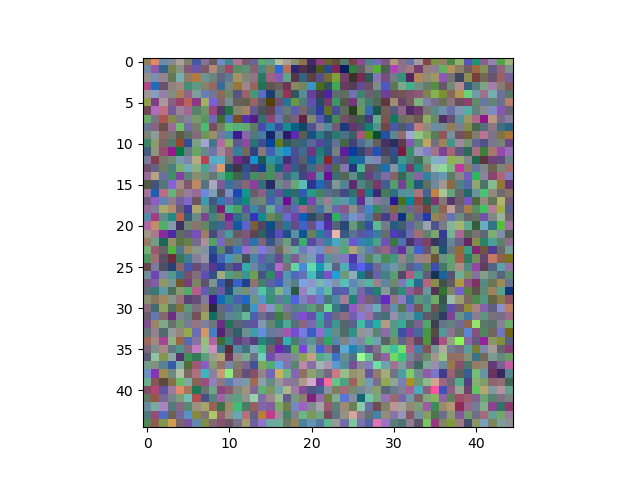

In [107]:
fig, ax = plt.subplots()
ax.imshow(trivial_model_weights[15])

In [106]:
id_to_label_dict[15]

'Avocado ripe'